In [2]:
import rishi_utils as ru
from rdkit import Chem
import fall20_mse_8803 as retro
import importlib
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
importlib.reload(retro)
importlib.reload(ru)
import numpy as np
import pickle
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


In [ ]:
Chem.MolFromSmiles('Cc1sc2c(-c3sc(-c4cc5c(s4)-c4sc(-c6sc(-c7sc(-c8scc9c8OCCO9)c8sc(C)c(F)c78)c7c6OCCO7)cc4C5(C)C)c4c3OCCO4)scc2c1F')

# Test is_symmetric2

In [ ]:
Chem.Atom.GetProp

In [ ]:
m.GetAtoms()[0].GetPropsAsDict()

In [ ]:
m.GetAtoms()[0].GetProp('_GasteigerCharge')

In [ ]:
m = Chem.MolFromSmiles('C1=C(C=CC2=C1C3C2CCC4C(CC3)CC5C(C4)C=CC(=C5)Br)Br')
m

In [ ]:
retro.is_symmetric2(m,'Br')

In [ ]:
retro.is_symmetric2('C=C','C')

In [ ]:
m2 = Chem.MolFromSmiles('C(C(CCCC1=CC=CC(=C1)Br)C)C2=CC(=CC=C2)Br')
m2

In [ ]:
retro.is_symmetric2(m2,'Br')

In [ ]:
retro.is_symmetric2(m2,'Br')

# ox_depolymerize scratch

In [ ]:
mol = Chem.MolFromSmiles('*c1ccc(*)cc1')
mol

In [1]:
mol.GetAtoms()[2].GetBonds()[0].GetBondTypeAsDouble()

NameError: name 'mol' is not defined

In [ ]:
lp = ru.LinearPol(mol)
if retro.is_symmetric2(lp.mol,'*'):
    bonds = lp.mol.GetAtoms()[max(lp.connector_inds)].GetBonds()
    bond_types = np.array([b.GetBondTypeAsDouble() for b in bonds])
    if any(bond_types > 1):
        em = Chem.EditableMol(lp.mol)
        em.RemoveAtom(max(lp.star_inds))
        em.RemoveAtom(min(lp.star_inds))
        try:
            new_mol = em.GetMol()
            Chem.SanitizeMol(new_mol)
            #return new_mol
        except:
            print(None)
            #return None
    else:
        print(None)
        #return None
else:
    print(None)
    #return None

In [ ]:
Chem.SanitizeMol(new_mol)

In [ ]:
mol.GetBonds()[6].GetBondTypeAsDouble()

In [ ]:
mol.GetBonds()[6].GetBondType()

# Test ox_depolymerize

In [ ]:
mol = Chem.MolFromSmiles('*c1ccc(*)cc1')
mol

In [ ]:
retro.ox_depolymerize(mol)

In [ ]:
mol = Chem.MolFromSmiles('*C1CCC(*)CC1')
mol

In [ ]:
retro.ox_depolymerize(mol) #should return nothing. No double bonds

In [ ]:
mol3 = Chem.MolFromSmiles('*Cc1ccc(*)cc1')
mol3

In [ ]:
retro.ox_depolymerize(mol3) #should return nothing. Not symmetric

In [ ]:
mol4 = Chem.MolFromSmiles('*Cc1ccc(C*)cc1')
mol4

In [ ]:
retro.ox_depolymerize(mol4) #should return nothing. Connector atoms do not have pi electrons

In [ ]:
mol5 = Chem.MolFromSmiles('*c1ccc(*)[nH]1')
mol5

In [ ]:
retro.ox_depolymerize(mol5) #should return something

In [ ]:
mol6 = Chem.MolFromSmiles('*c1[nH]c(*)c2OCCCOc12')
mol6

In [ ]:
retro.ox_depolymerize(mol6) #shoudld return something

# Look thru G2G success polymers

In [ ]:
success = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/new_polymers_12_43PM_on_June_23_2020_sortedObjective.csv')
success.head()

len(success)

smiles_ls = success['SMILES'].tolist()
inds = [x for x in smiles_ls if retro.ox_depolymerize(x) != None]
inds

len(inds)

# Look thru relaxed G2G polymers 

In [ ]:
df = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/results_List/uniqueCanPolyAndProps.csv')
df.head()

df_med = df[(df['bg']>5.5)&(df['cib']>2.5)&(df['tg']>400)].drop_duplicates()
smiles_ls = df_med['smiles'].tolist()

In [ ]:
smiles_ls[0:5]

In [ ]:
inds = [x for x in smiles_ls if retro.ox_depolymerize(x) != None]
inds

len(inds)

In [ ]:
Chem.MolFromSmiles(inds[0])

In [ ]:
retro.ox_depolymerize(inds[0])

# Check symmetry

In [ ]:
inds = []
for x in smiles_ls:
    lp = ru.LinearPol(x)
    if len(set(lp.connector_inds)) == 2:
        m=lp.delStarMol()
        if retro.is_symmetric2(m,group=lp.delStarMolInds):
            inds += [x]

In [ ]:
len(inds)

In [ ]:
Chem.MolFromSmiles(inds[0])

In [ ]:
Chem.MolFromSmiles(inds[1])

In [ ]:
Chem.MolFromSmiles(inds[2])

In [ ]:
Chem.MolFromSmiles(inds[3])

In [ ]:
Chem.MolFromSmiles(inds[4])

In [ ]:
Chem.MolFromSmiles(inds[5])

In [ ]:
Chem.MolFromSmiles(inds[6])

In [ ]:
Chem.MolFromSmiles(inds[7])

In [ ]:
Chem.MolFromSmiles(inds[8])

In [ ]:
Chem.MolFromSmiles(inds[9])

In [ ]:
Chem.MolFromSmiles(inds[10])

In [ ]:
Chem.MolFromSmiles(inds[11])

In [ ]:
Chem.MolFromSmiles(inds[12])

In [ ]:
Chem.MolFromSmiles(inds[13])

In [ ]:
Chem.MolFromSmiles(inds[14])

In [ ]:
Chem.MolFromSmiles(inds[15])

In [ ]:
Chem.MolFromSmiles(inds[16])

In [ ]:
Chem.MolFromSmiles(inds[17])

In [ ]:
Chem.MolFromSmiles(inds[18])

In [ ]:
Chem.MolFromSmiles(inds[19])

In [ ]:
Chem.MolFromSmiles(inds[20])

In [ ]:
Chem.MolFromSmiles(inds[21])

In [ ]:
Chem.MolFromSmiles(inds[22])

In [ ]:
Chem.MolFromSmiles(inds[23])

In [ ]:
Chem.MolFromSmiles(inds[24])

In [ ]:
Chem.MolFromSmiles(inds[25])

In [ ]:
Chem.MolFromSmiles(inds[26])

In [ ]:
Chem.MolFromSmiles(inds[27])

In [ ]:
Chem.MolFromSmiles(inds[28])

In [ ]:
Chem.MolFromSmiles(inds[29])

In [ ]:
Chem.MolFromSmiles(inds[40])

In [ ]:
Chem.MolFromSmiles(inds[47])

In [ ]:
Chem.MolFromSmiles(inds[50])

# Look for resonance

In [ ]:
mol = Chem.MolFromSmiles('Oc1[c][c-]c(O)cc1')
mol

In [ ]:
Chem.AddHs(mol)

In [ ]:
a=Chem.ResonanceMolSupplier(mol)

In [ ]:
Chem.AddHs(a[0])

In [ ]:
Chem.AddHs(a[1])

In [ ]:
Chem.AddHs(a[2])

# Create function for drawing depolymerizations

In [ ]:
p_mol = '*CC*'#polymer mol
dp_func = retro.frp_depolymerize #depolymerization function
if type(p_mol) == str:
    p_mol = Chem.MolFromSmiles('*CC*')
monomer = dp_func(p_mol)
label_dict = {
    retro.frp_depolymerize: 'Radical/Ionic Polymerization'
}
Chem.Draw.MolsToGridImage((monomer,p_mol),legends=['#1: %s' %(label_dict[dp_func]),'#2: Final'])

# Test function for drawing depolymerizations

In [ ]:
importlib.reload(retro)
retro.drawRxn(p_mol,retro.frp_depolymerize)

# Step-growth polymerizations

In [ ]:
#OH-Cl
polymer_linkage = Chem.MolFromSmarts('*OC(=O)O')
polymer_linkage

In [ ]:
polymer = Chem.MolFromSmiles('*Oc2ccc(C(C)(C)c1ccc(OC(*)=O)cc1)cc2')
polymer

In [ ]:
lp = ru.LinearPol(polymer)
pm = lp.PeriodicMol()
pm

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
matches=pm.GetSubstructMatches(polymer_linkage)
matches

In [ ]:
# *OC(=O)O
#i_left_star,i_o_right,i_c,i_dbl0,i_o_left,i_right_star = matches[0]
new_mols = None
match_pairs = list(itertools.combinations(matches, 2))#implement
#for match_pair in matches:
match_pair = matches #needs to be commented out
ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left = match_pair[0]
bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(ai_o_left,ai_c)
em.RemoveBond(bi_o_left,bi_c)
i_cl1 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
i_cl2 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
em.AddBond(ai_c,i_cl1,Chem.BondType.SINGLE)
em.AddBond(bi_c,i_cl2,Chem.BondType.SINGLE)
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [ ]:
frag_ids = Chem.GetMolFrags(new_mol, asMols=False)
frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
frag_ids

In [ ]:
cl_ind = [i for i,x in enumerate(frag_ids) if i_dbl0 in x][0]
if cl_ind == 0:
    oh_ind = 1
else:
    oh_ind = 0
oh_mol = frag_mols[oh_ind]
cl_mol = frag_mols[cl_ind]

In [ ]:
cl_mol

In [ ]:
if retro.is_symmetric2(cl_mol,'Cl') and retro.is_symmetric2(oh_mol,Chem.MolFromSmarts('[OH]')): #symmetric function checks to make sure there are only 2 matches
    print('new_mol')
else:
    None

# Edit sg_depolymerize so two monomer sets are created with swapped functional groups

In [ ]:
from rdkit import Chem

In [ ]:
import time
start = time.time()
Chem.MolFromSmiles('CCCl').HasSubstructMatch(Chem.AtomFromSmiles('Cl'))
print(time.time()-start)


In [ ]:
import time
start = time.time()
'Cl' in Chem.MolToSmiles(Chem.AtomFromSmiles('CCCl'))
print(time.time()-start)

In [ ]:
def oh_cl_edit(pm,match_pair):
    '''
    Take in an editable mol and match_pair and perform the bond breakage to create one monomer w/ OH and another monomer w/ Cl
    '''
    new_mols = []
    cl_mols = []
    oh_mols = []
    
    ### make the first monomer set ###
    em = Chem.EditableMol(pm)
    ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left = match_pair[0]
    bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left = match_pair[1]
    em.RemoveBond(ai_o_left,ai_c)
    em.RemoveBond(bi_o_left,bi_c)
    i_cl1 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
    i_cl2 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
    em.AddBond(ai_c,i_cl1,Chem.BondType.SINGLE)
    em.AddBond(bi_c,i_cl2,Chem.BondType.SINGLE)
    new_mol1=em.GetMol()
    Chem.SanitizeMol(new_mol1)

    ### make the second monomer set ###
    em2 = Chem.EditableMol(pm)
    em2.RemoveBond(ai_o_right,ai_r)
    em2.RemoveBond(bi_o_right,bi_r)
    i_cl1 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
    i_cl2 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
    em2.AddBond(ai_r,i_cl1,Chem.BondType.SINGLE)
    em2.AddBond(bi_r,i_cl2,Chem.BondType.SINGLE)
    new_mol2 = em2.GetMol()
    Chem.SanitizeMol(new_mol2)   

    for new_mol in (new_mol1,new_mol2):
        frag_ids = Chem.GetMolFrags(new_mol, asMols=False)
        if len(frag_ids) == 2:
            frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
            if frag_mols[0].HasSubstructMatch(Chem.MolFromSmiles('Cl')):
                cl_ind = 0
                oh_ind = 1
            else:
                cl_ind = 1
                oh_ind = 0
            oh_mol = frag_mols[oh_ind]
            cl_mol = frag_mols[cl_ind]
        new_mols.append(new_mol)
        cl_mols.append(cl_mol)
        oh_mols.append(oh_mol)
    return list(zip(new_mols, cl_mols, oh_mols))

In [ ]:
rxn_info = retro.sg_rxns['*OC(=O)O'][0]
rxn_info

In [ ]:
ru.mol_with_atom_index(ru.LinearPol(polymer).PeriodicMol())

In [ ]:
match_pair = matches
match_pair

In [ ]:
new_mols = []
cl_mols = []
oh_mols = []

### make the first monomer set ###
em = Chem.EditableMol(pm)
ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left = match_pair[0]
print(ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left)
bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left = match_pair[1]
print(bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left)
em.RemoveBond(ai_o_left,ai_c)
em.RemoveBond(bi_o_left,bi_c)
i_cl1 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
i_cl2 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
em.AddBond(ai_c,i_cl1,Chem.BondType.SINGLE)
em.AddBond(bi_c,i_cl2,Chem.BondType.SINGLE)
new_mol1=em.GetMol()
Chem.SanitizeMol(new_mol1)

### make the second monomer set ###
em2 = Chem.EditableMol(pm)
em2.RemoveBond(ai_o_right,ai_r)
em2.RemoveBond(bi_o_right,bi_r)
i_cl1 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
i_cl2 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
em2.AddBond(ai_r,i_cl1,Chem.BondType.SINGLE)
em2.AddBond(bi_r,i_cl2,Chem.BondType.SINGLE)
new_mol2 = em2.GetMol()
Chem.SanitizeMol(new_mol2)
new_mol2

In [ ]:
importlib.reload(retro)
out=retro.sg_depolymerize(polymer,polymer_linkage,retro.sg_rxns[Chem.MolToSmiles(polymer_linkage)][0])
out[0]

In [ ]:
out[1]

# Try sg_depolymerize on relaxed G2G

In [ ]:
importlib.reload(retro)
polymer_linkage = '*OC(=O)O'
inds = [x for x in smiles_ls if retro.sg_depolymerize(x,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0]) != None]
inds

len(inds)

In [ ]:
len(inds)

In [ ]:
retro.sg_depolymerize(inds[0],Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.sg_depolymerize(inds[1],Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])

In [ ]:
importlib.reload(retro)
retro.drawRxn(inds[0],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.drawRxn(inds[1],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.drawRxn(inds[2],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.drawRxn(inds[4],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.drawRxn(inds[19],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[0]]

In [ ]:
out=retro.sg_depolymerize(inds[0],Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])
Chem.MolToSmiles(out)

# OH-OH reaction

In [ ]:
mol = Chem.MolFromSmiles('[*]Oc1ccc(C(C)(C)c2ccc(OC(=O)c3ccc(C([*])=O)cc3)cc2)cc1')
mol

In [ ]:
lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
pm

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
polymer_linkage = Chem.MolFromSmarts('*C(=O)O*')
polymer_linkage

In [ ]:
matches = pm.GetSubstructMatches(polymer_linkage)
matches

In [ ]:
new_mols = None
import itertools
match_pairs = list(itertools.combinations(matches, 2))#implement
#for match_pair in matches:
match_pair = matches #needs to be commented out
ai_r1,ai_c,ai_o_dbl,ai_o,ai_r2 = match_pair[0]
bi_r1,bi_c,bi_o_dbl,bi_o,bi_r2 = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(ai_o,ai_r2)
em.RemoveBond(bi_o,bi_r2)
i_o1 = em.AddAtom(Chem.AtomFromSmiles('O'))
i_o2 = em.AddAtom(Chem.AtomFromSmiles('O'))
em.AddBond(ai_r2,i_o1,Chem.BondType.SINGLE)
em.AddBond(bi_r2,i_o2,Chem.BondType.SINGLE)
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [ ]:
#frag_ids = Chem.GetMolFrags(new_mol, asMols=False)
if len(frag_ids) == 2:
    frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
    oh_mol1 = frag_mols[0]
    oh_mol2 = frag_mols[1]
    #return new_mol, cl_mol, oh_mol
else:
    #return None,None,None

In [ ]:
retro.is_symmetric2(oh_mol2,Chem.MolFromSmarts('[OH]'))

In [ ]:
oh_mol2

In [ ]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
retro.sg_depolymerize(mol,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])

In [ ]:
retro.is_symmetric2(Chem.MolFromSmiles('c1([OH:16])[cH:1][cH:2][c:3]([C:4]([CH3:5])([CH3:6])[c:7]2[cH:8][cH:9][c:10]([OH:15])[cH:11][cH:12]2)[cH:13][cH:14]1'),Chem.MolFromSmiles('[OH]'))

In [ ]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
retro.drawRxn(mol,extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

# Try on relaexed G2G

In [ ]:
df = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/results_List/uniqueCanPolyAndProps.csv')
df.head()

df_med = df[(df['bg']>5.5)&(df['cib']>2.5)&(df['tg']>400)].drop_duplicates()
smiles_ls = df_med['smiles'].tolist()

In [ ]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
inds = [x for x in smiles_ls if retro.sg_depolymerize(x,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0]) != None]
inds

In [ ]:
len(inds)

In [ ]:
for i,x in enumerate(inds):
    print(i,Chem.MolFromSmiles(x).GetNumAtoms())

In [ ]:
inds[22]

In [ ]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[22],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[0]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[1],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[1]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[2],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[2]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[3],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[3]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[4],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[4]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[5],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[5]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[6],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[6]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[7],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[7]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[8],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[8]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[9],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[9]]

In [ ]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[10],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [ ]:
df_med[df_med['smiles']==inds[10]]

In [ ]:
for x in []:
    print(x)

In [ ]:
import itertools

In [ ]:
list(itertools.combinations([1,2],2))

# Test lookup w/ sg on G2G-relaxed polymers

In [3]:
df = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/results_List/uniqueCanPolyAndProps.csv')
df.head()

df_med = df[(df['bg']>5.5)&(df['cib']>2.5)&(df['tg']>400)].drop_duplicates()
smiles_ls = df_med['smiles'].tolist()

In [4]:
with open('/home/rgur/py_scripts/g2g_depolymerizable_05_31PM_on_January_09_2021.pkl','rb') as f:
    smiles_ls = pickle.load(f)
#smiles_ls = list(smiles_ls)[0:5]

In [5]:
len(smiles_ls)

2132

In [6]:
importlib.reload(retro)
rxns = retro.retrosynthesize(smiles_ls)

, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [20:10:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 284 in file /home/conda/feedstock_root/build_artifacts/rdkit_1540561308834/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [20:10:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 284 in file /home/conda/feedstock_root/build_artifacts/rdkit_1540561308834/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [20:10:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 284 in fil

In [7]:
len(rxns)

2509

In [8]:
with open('/data/rgur/retrosynthesis/molecule_lookup/mol_set.pkl','rb') as f:
    mol_set = pickle.load(f)

In [9]:
with open('/data/rgur/retrosynthesis/polymer_lookup/polymer_lookup_dict.pkl','rb') as f:
    pol_dict = pickle.load(f)

In [10]:
importlib.reload(retro)
importlib.reload(ru)
#rxns = [retro.ReactionPath(x.reaction_step_arr) for x in rxns]
for x in rxns:
    x.SearchReactants(mol_set)
    x.SyntheticScore()
    x.SearchPolymer(pol_dict)
    x.SyntheticClass()

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
RDKit ERROR: [20:11:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 284 in file /home/conda/feedstock_root/build_artifacts/rdkit_1540561308834/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [20:11:35] 
RDKit ERROR: 
RDKit ERROR: ***

In [11]:
rxns_srt = sorted(rxns,key=lambda x: (x.syn_class,x.lp_syn_score))
#exists_mols = list(set([x.can_smiles for x in filter(lambda x: x.lp_exists, rxns)]))

In [22]:
ok_cans = set()
exists_mols = []
for x in rxns_srt[0:36]:
    if x.can_smiles in ok_cans:
        pass
    else:
       ok_cans.add(x.can_smiles)
       exists_mols.append(x) 

In [23]:
len(exists_mols)

6

In [13]:
# with open('%s.pkl' %ru.add_timestamp('g2g_depolymerizable_'),'wb') as f:
#     pickle.dump(set([x.product_smiles for x in rxns_srt]),f)

In [32]:
print(len(list(filter(lambda x: x.syn_class==2,rxns_srt))))

11


[*]CC1CCCC(CC(=O)N[*])C1
Tg 5972    429.596614
Name: tg, dtype: float64
Bg 5972    6.111001
Name: bg, dtype: float64
CIB 5972    3.038328
Name: cib, dtype: float64


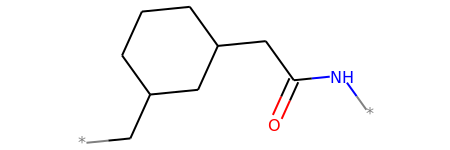

In [28]:
print(exists_mols[0].can_smiles)
print('Tg', df_med[df_med['smiles']==exists_mols[0].lp_smiles]['tg'])
print('Bg', df_med[df_med['smiles']==exists_mols[0].lp_smiles]['bg'])
print('CIB', df_med[df_med['smiles']==exists_mols[0].lp_smiles]['cib'])
Chem.MolFromSmiles(exists_mols[0].can_smiles)

[*]OC1C(C)(C)C(OC([*])=O)C1(C)C
Tg 38142    433.359911
Name: tg, dtype: float64
Bg 38142    6.490885
Name: bg, dtype: float64
CIB 38142    3.425589
Name: cib, dtype: float64


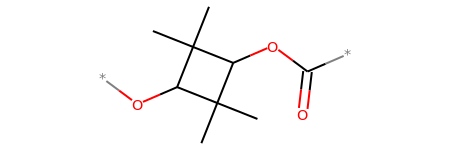

In [30]:
i = 1
print(exists_mols[i].can_smiles)
print('Tg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['tg'])
print('Bg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['bg'])
print('CIB', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['cib'])
Chem.MolFromSmiles(exists_mols[i].can_smiles)

[*]C(=O)NC1CC1NC(=O)N1CCN([*])CC1
Tg 4362    435.115636
Name: tg, dtype: float64
Bg 4362    5.857446
Name: bg, dtype: float64
CIB 4362    3.188852
Name: cib, dtype: float64


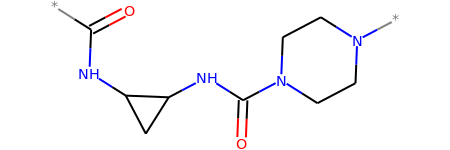

In [31]:
i = 2
print(exists_mols[i].can_smiles)
print('Tg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['tg'])
print('Bg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['bg'])
print('CIB', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['cib'])
Chem.MolFromSmiles(exists_mols[i].can_smiles)

[*]OC(=O)OC1CC2CC([*])CC(C1)O2
Tg 7327    464.205761
Name: tg, dtype: float64
Bg 7327    6.22202
Name: bg, dtype: float64
CIB 7327    3.455629
Name: cib, dtype: float64


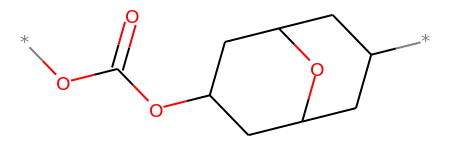

In [32]:
i = 3
print(exists_mols[i].can_smiles)
print('Tg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['tg'])
print('Bg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['bg'])
print('CIB', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['cib'])
Chem.MolFromSmiles(exists_mols[i].can_smiles)

[*]NC(C)C(C)C([*])=O
Tg 29640    400.344228
Name: tg, dtype: float64
Bg 29640    5.794208
Name: bg, dtype: float64
CIB 29640    3.091632
Name: cib, dtype: float64


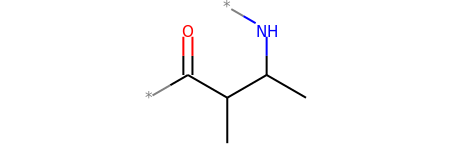

In [33]:
i = 4
print(exists_mols[i].can_smiles)
print('Tg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['tg'])
print('Bg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['bg'])
print('CIB', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['cib'])
Chem.MolFromSmiles(exists_mols[i].can_smiles)

[*]OC(=O)NC1CCC(CC2CCC(NC(=O)OC3CC4CC([*])CC(C3)O4)CC2)CC1
Tg 6774    478.856362
Name: tg, dtype: float64
Bg 6774    5.89003
Name: bg, dtype: float64
CIB 6774    3.348834
Name: cib, dtype: float64


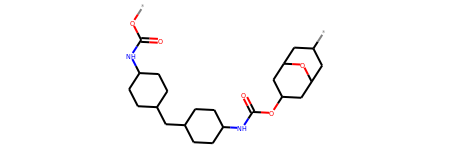

In [34]:
i = 5
print(exists_mols[i].can_smiles)
print('Tg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['tg'])
print('Bg', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['bg'])
print('CIB', df_med[df_med['smiles']==exists_mols[i].lp_smiles]['cib'])
Chem.MolFromSmiles(exists_mols[i].can_smiles)

['CC12CC3CC(C)(C)C3C(=N1)OC2=O']
[*]CC1CC(C)(C)C1C1=NC([*])(C)C(=O)O1
Bg 38885    6.266251
Name: bg, dtype: float64
Tg 38885    464.195135
Name: tg, dtype: float64
CIB 38885    2.957821
Name: cib, dtype: float64


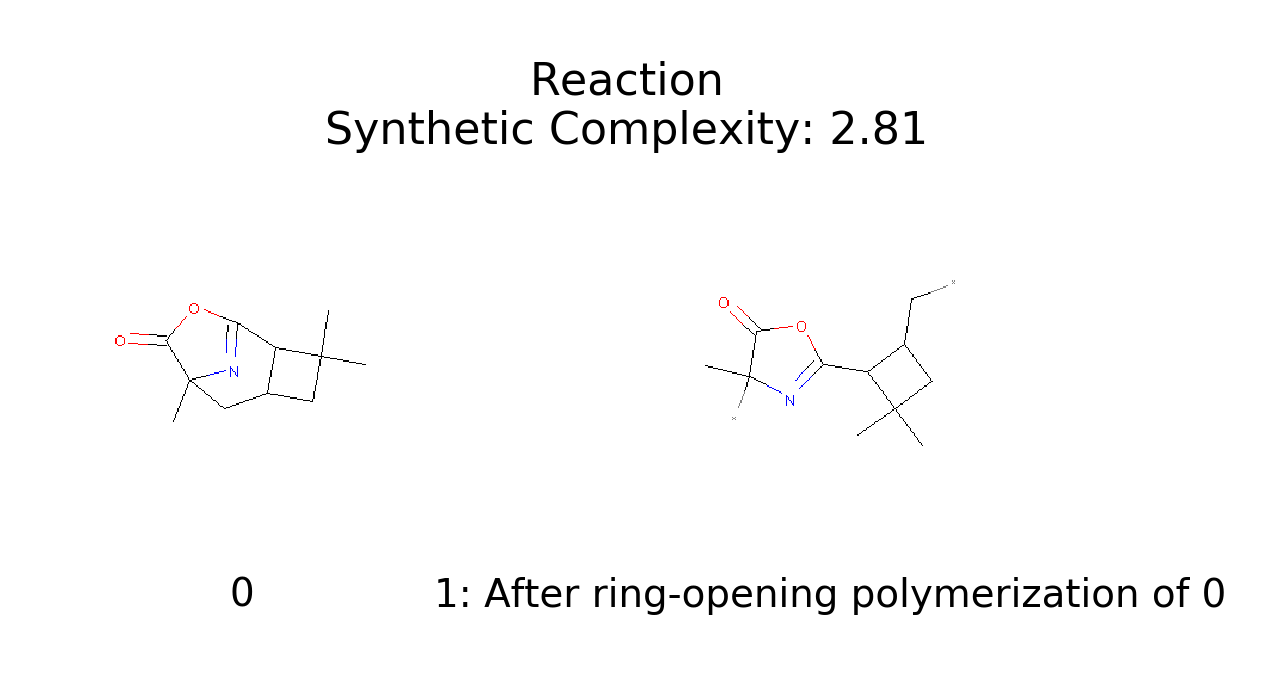

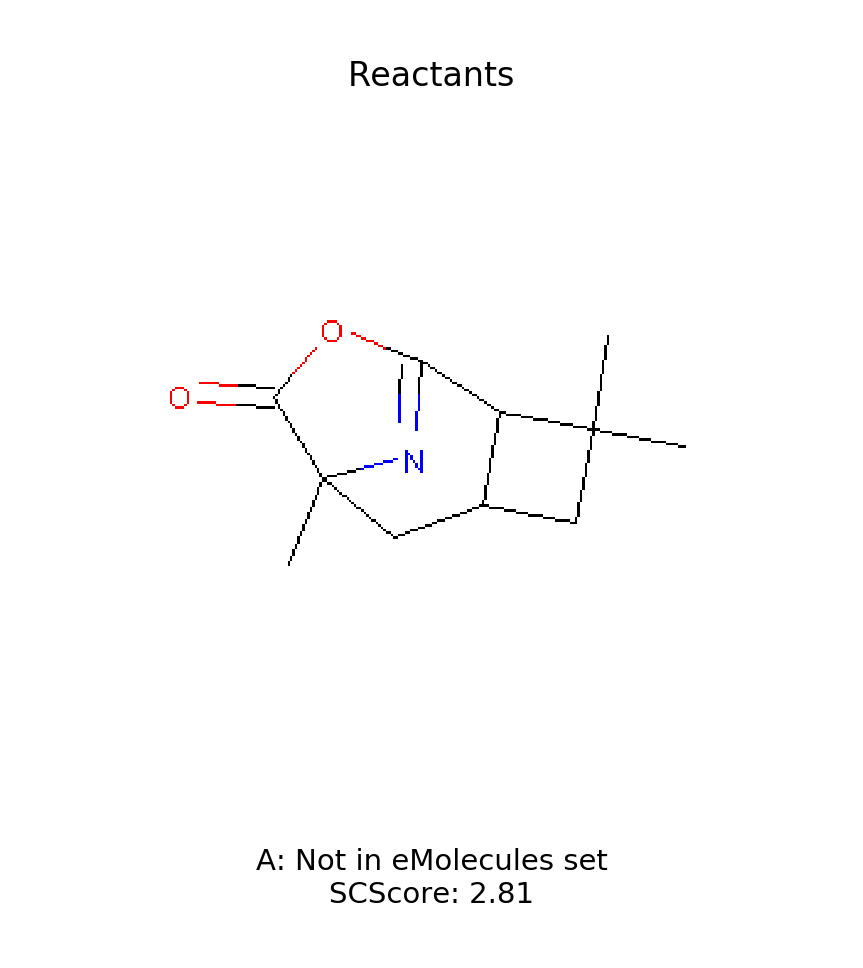

In [93]:
importlib.reload(ru)
i=181
print(rxns_srt[i].reaction_step_arr[0].reactant_frag_smiles)
print(rxns_srt[i].lp_smiles)
print('Bg', df_med[df_med['smiles']==rxns_srt[i].lp_smiles]['bg'])
print('Tg', df_med[df_med['smiles']==rxns_srt[i].lp_smiles]['tg'])
print('CIB', df_med[df_med['smiles']==rxns_srt[i].lp_smiles]['cib'])
rxns_srt[i].DrawStep(size=(2,1))
rxns_srt[i].DrawCatalog()

In [113]:
frp = [x for x in rxns_srt if 'frp' in x.reaction_step_arr[0].rxn_fn]

In [114]:
len(frp)

11

['C=CC1CC(CCC)C2C3CCC(C3)C12']
[*]CC([*])C1CC(CCC)C2C3CCC(C3)C12
Bg 39788    5.778485
Name: bg, dtype: float64
Tg 39788    439.369544
Name: tg, dtype: float64
CIB 39788    3.43198
Name: cib, dtype: float64


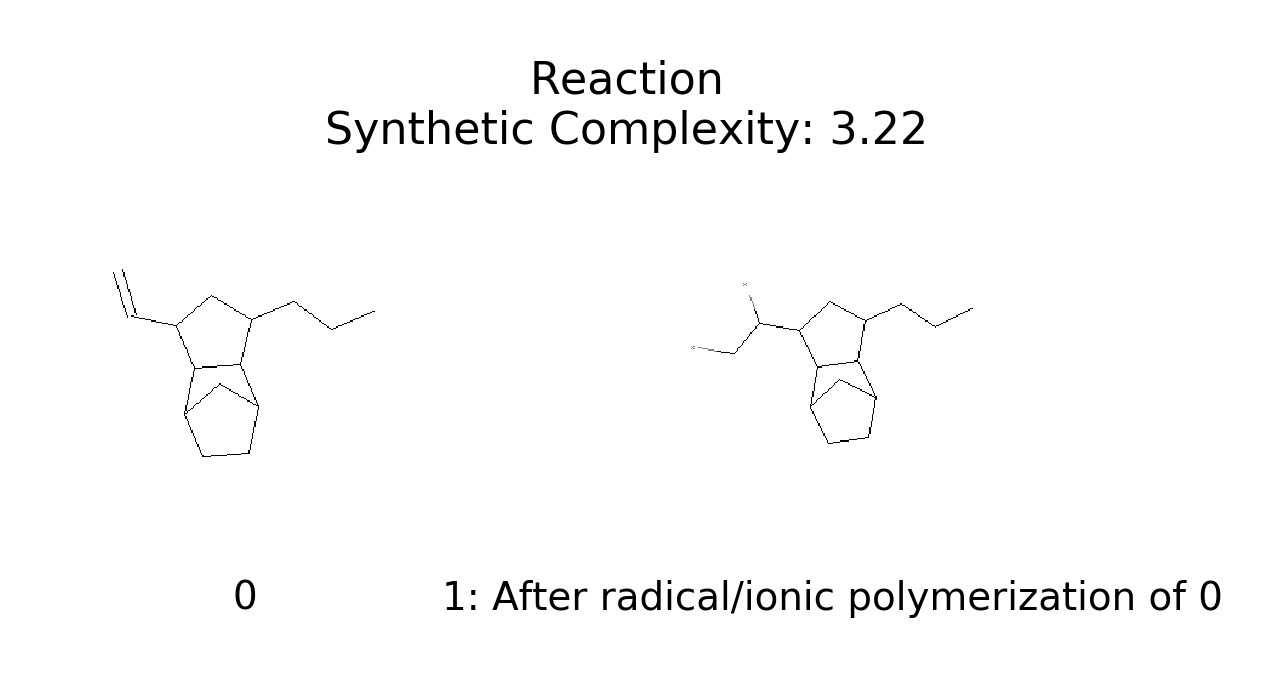

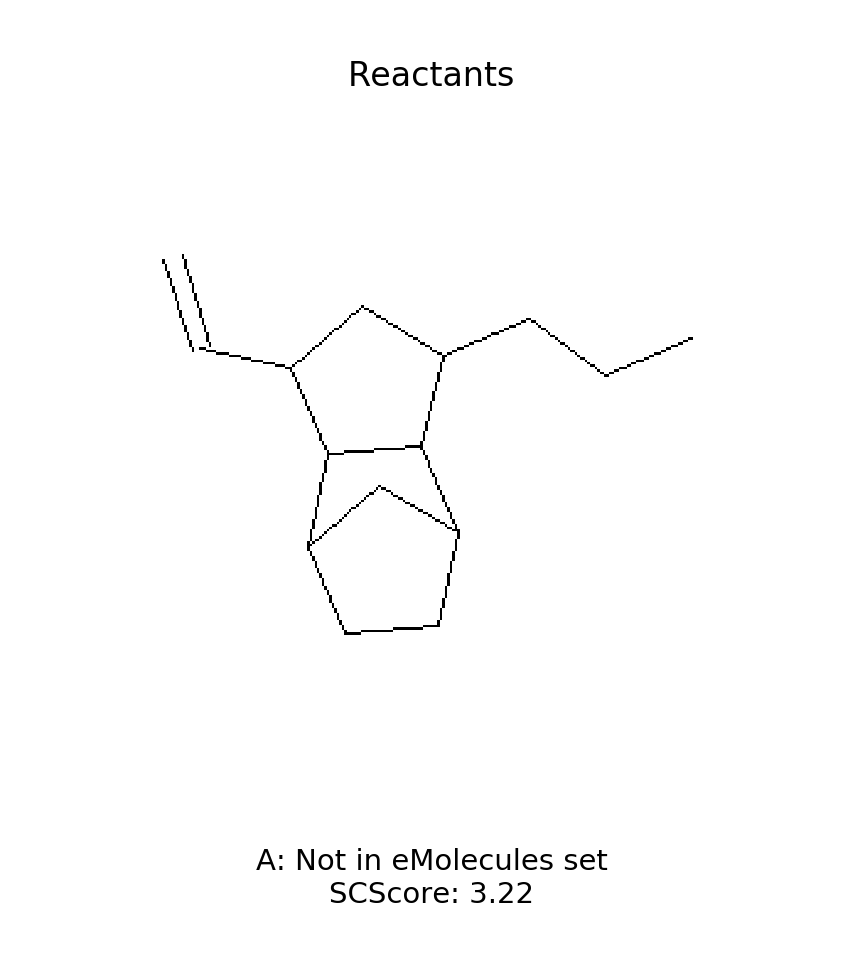

In [110]:
i=2
print(frp[i].reaction_step_arr[0].reactant_frag_smiles)
print(frp[i].lp_smiles)
print('Bg', df_med[df_med['smiles']==frp[i].lp_smiles]['bg'])
print('Tg', df_med[df_med['smiles']==frp[i].lp_smiles]['tg'])
print('CIB', df_med[df_med['smiles']==frp[i].lp_smiles]['cib'])
frp[i].DrawStep(size=(2,1))
frp[i].DrawCatalog()

['NC1CCC(=O)NC1']
Tg 17062    408.415436
Name: tg, dtype: float64
Bg 17062    5.737339
Name: bg, dtype: float64
CIB 17062    3.057113
Name: cib, dtype: float64


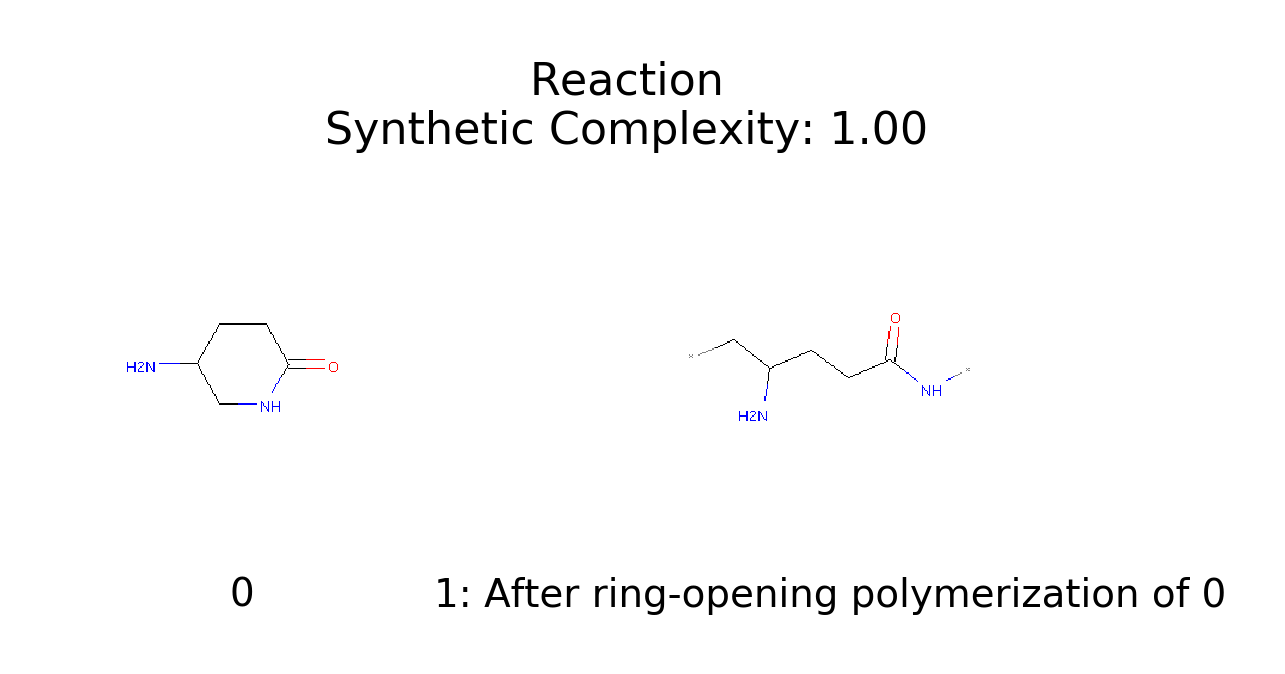

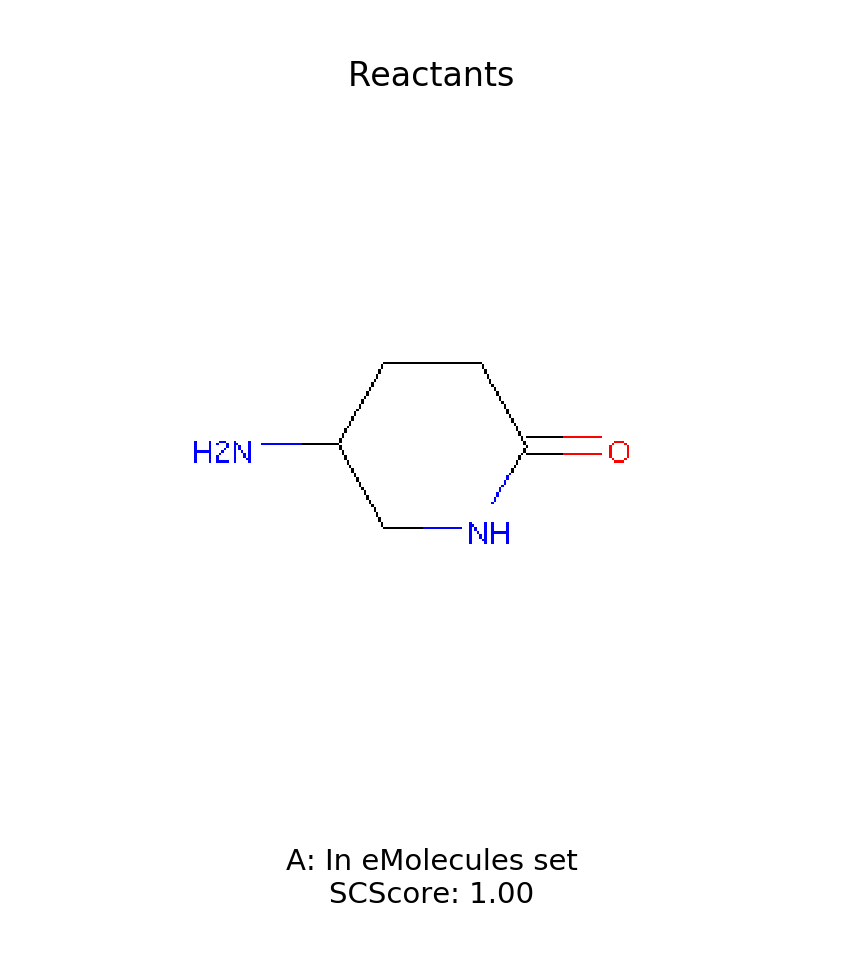

In [31]:
importlib.reload(ru)
i=38
print(rxns_srt[i].reaction_step_arr[0].reactant_frag_smiles)
print('Tg', df_med[df_med['smiles']==rxns_srt[i].lp_smiles]['tg'])
print('Bg', df_med[df_med['smiles']==rxns_srt[i].lp_smiles]['bg'])
print('CIB', df_med[df_med['smiles']==rxns_srt[i].lp_smiles]['cib'])
rxns_srt[i].DrawStep(size=(2,1))
rxns_srt[i].DrawCatalog()

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
False


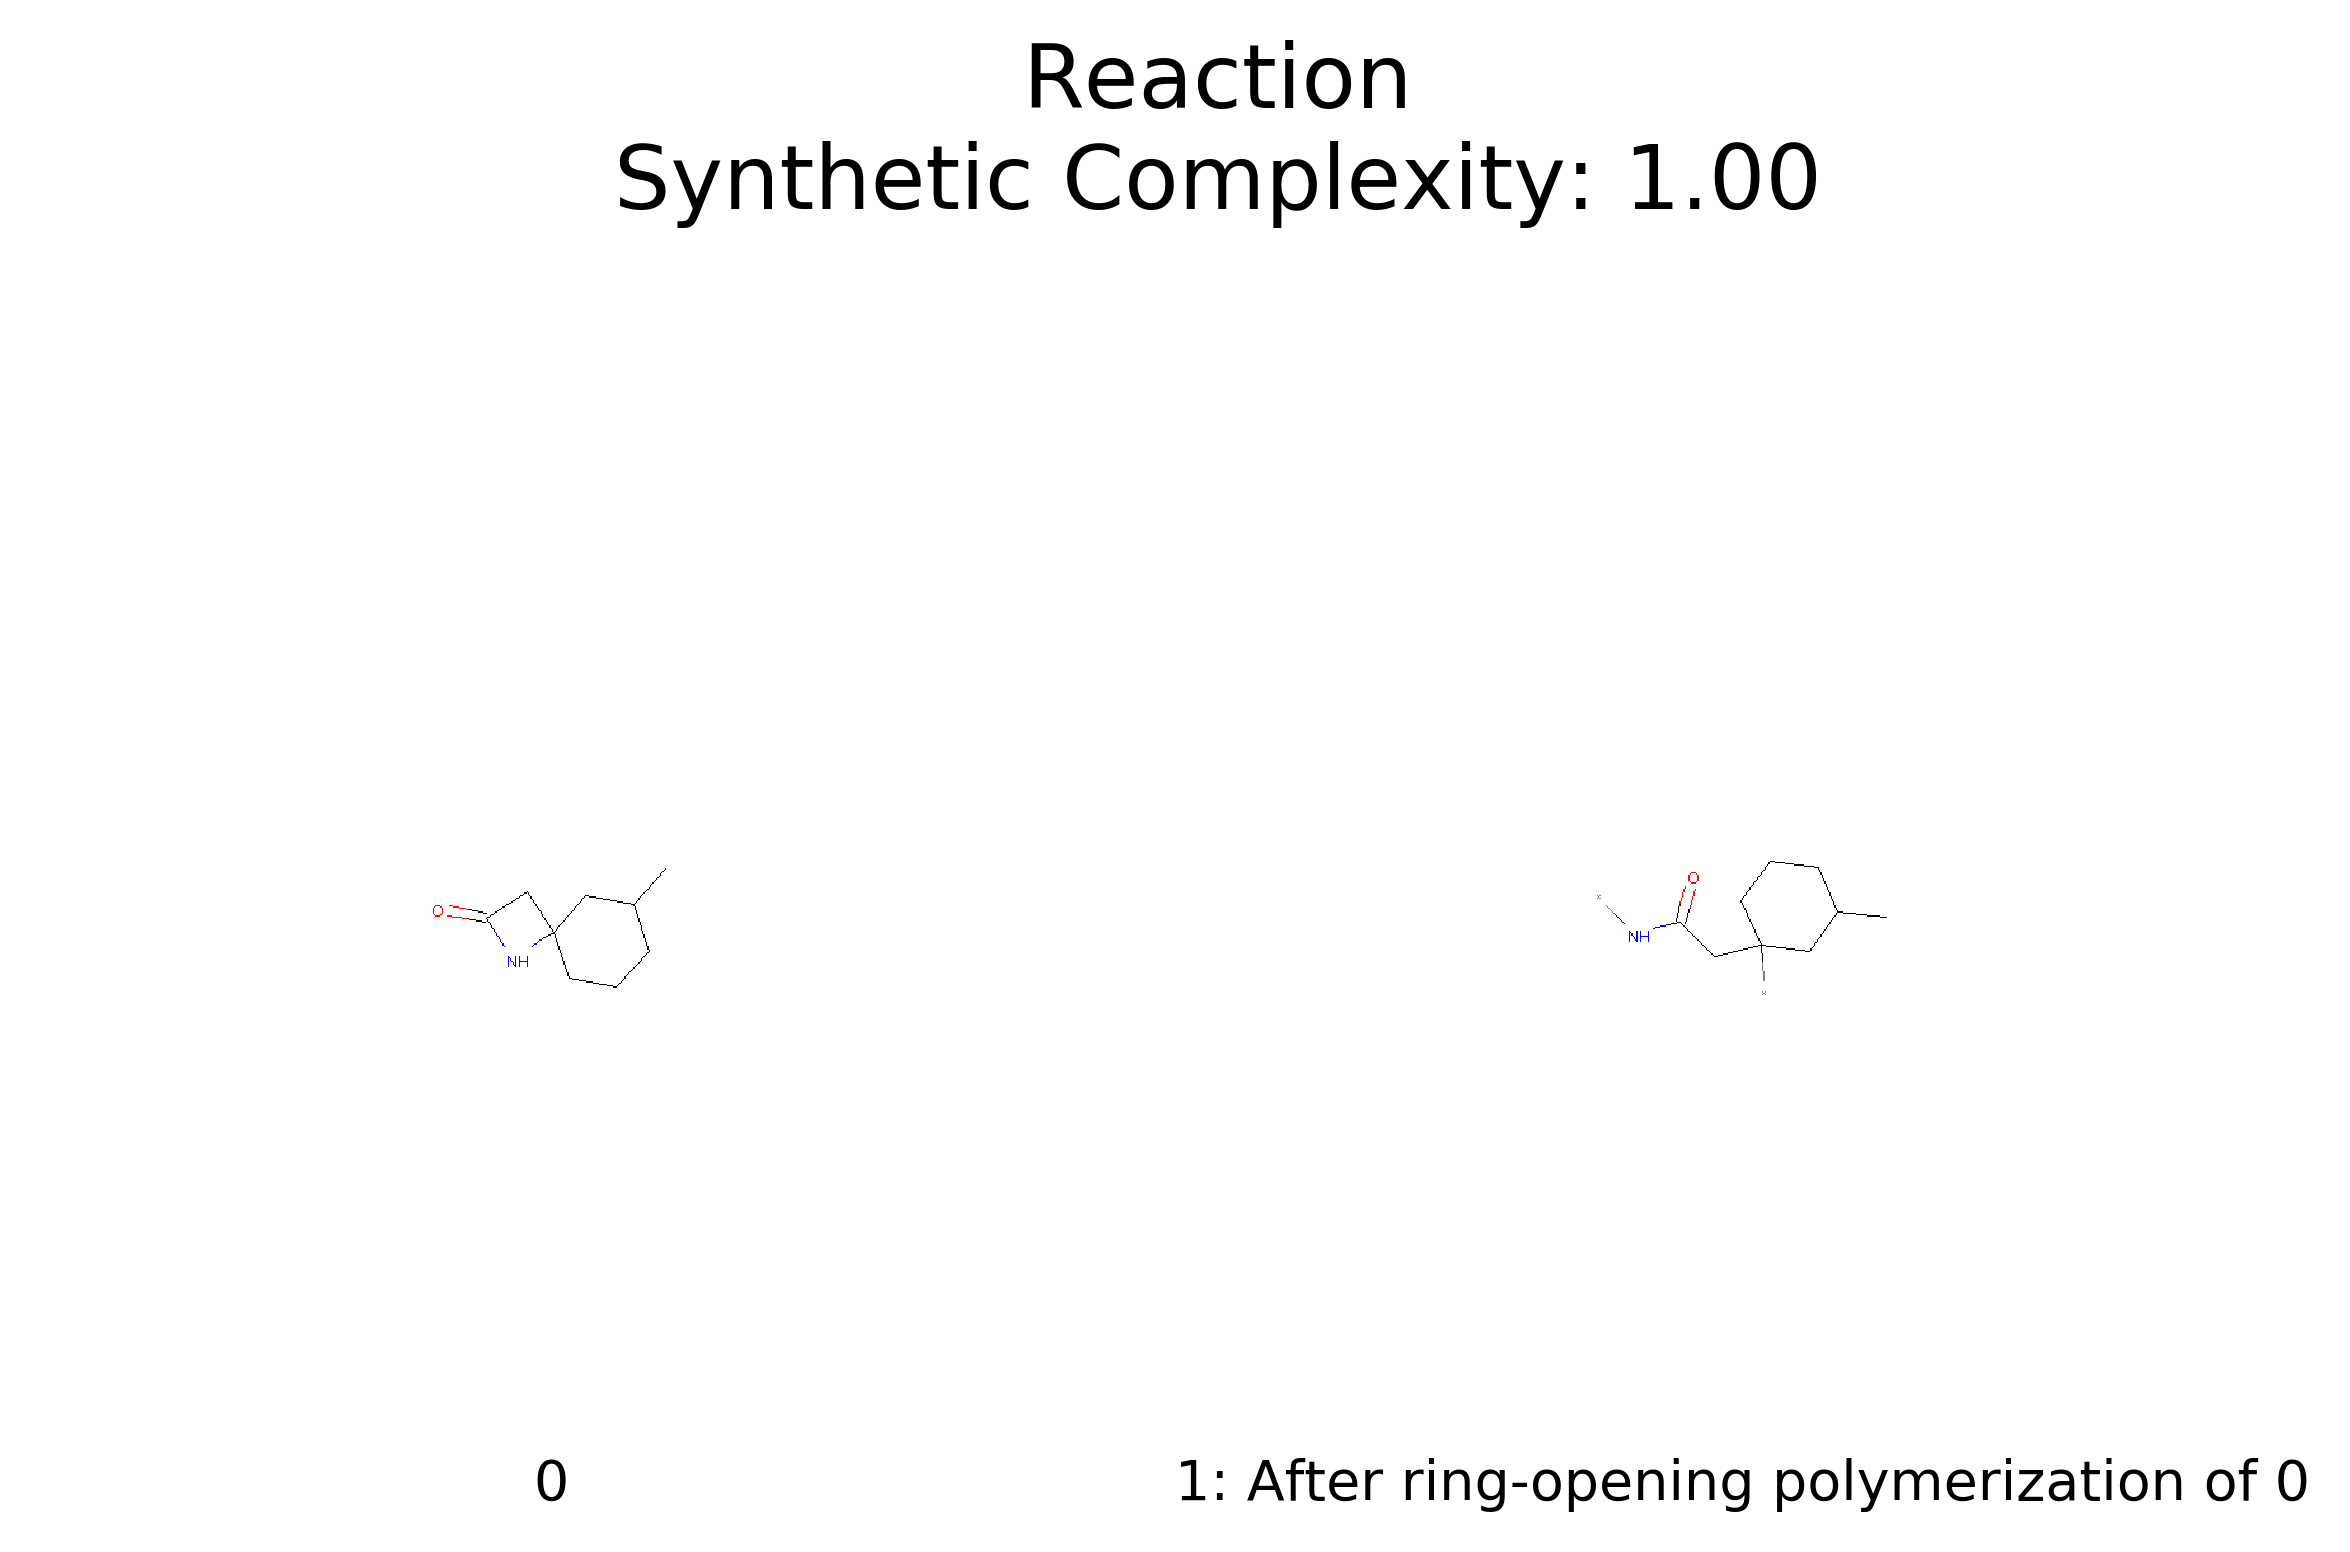

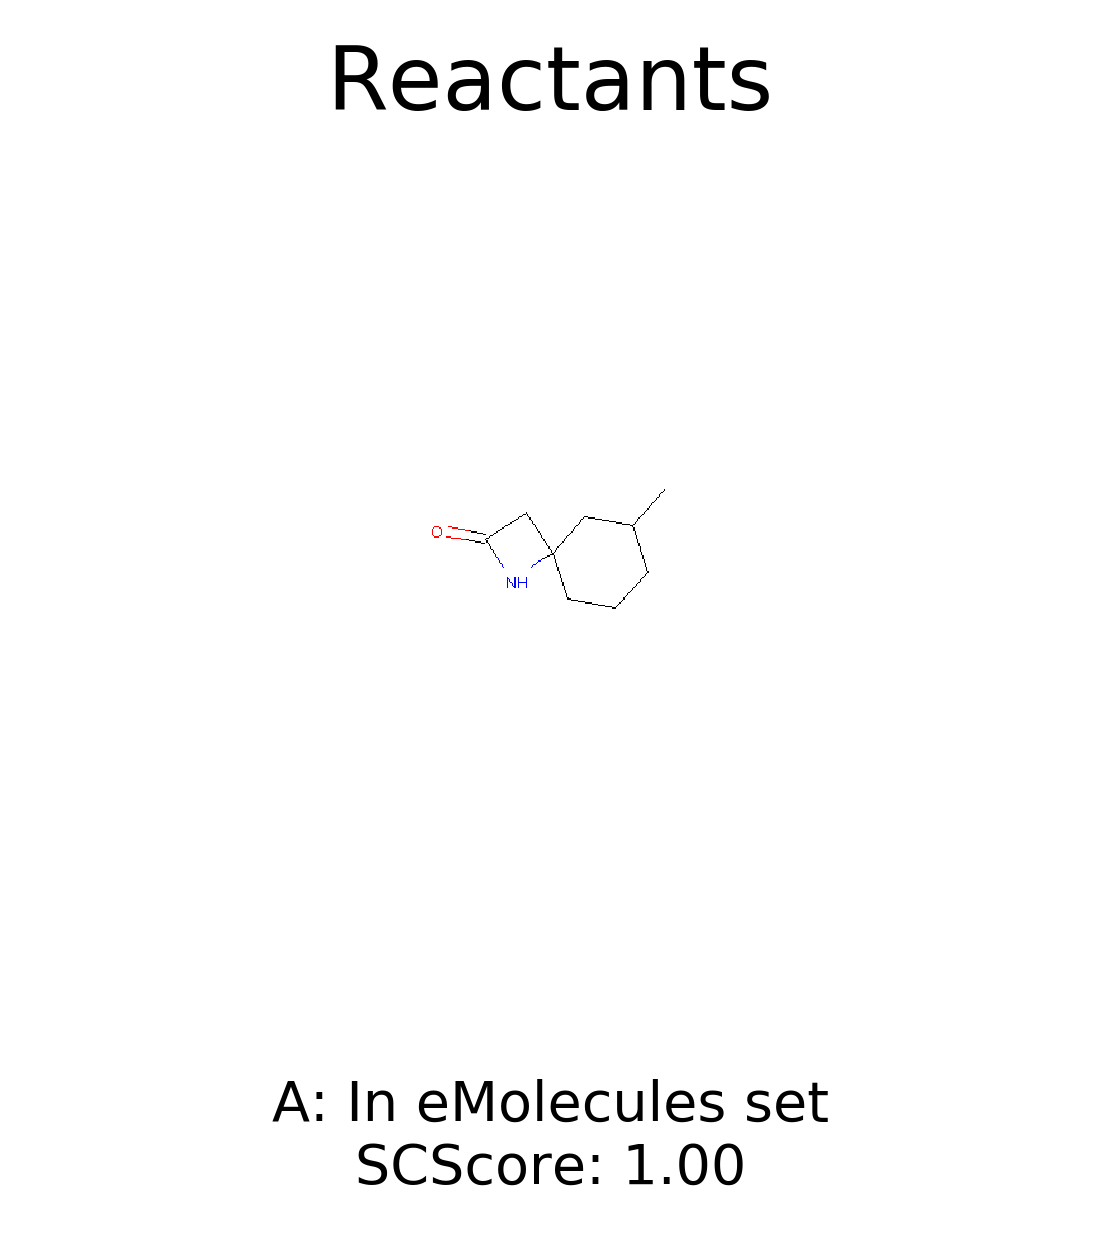

In [42]:
importlib.reload(retro)
i=2
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

True


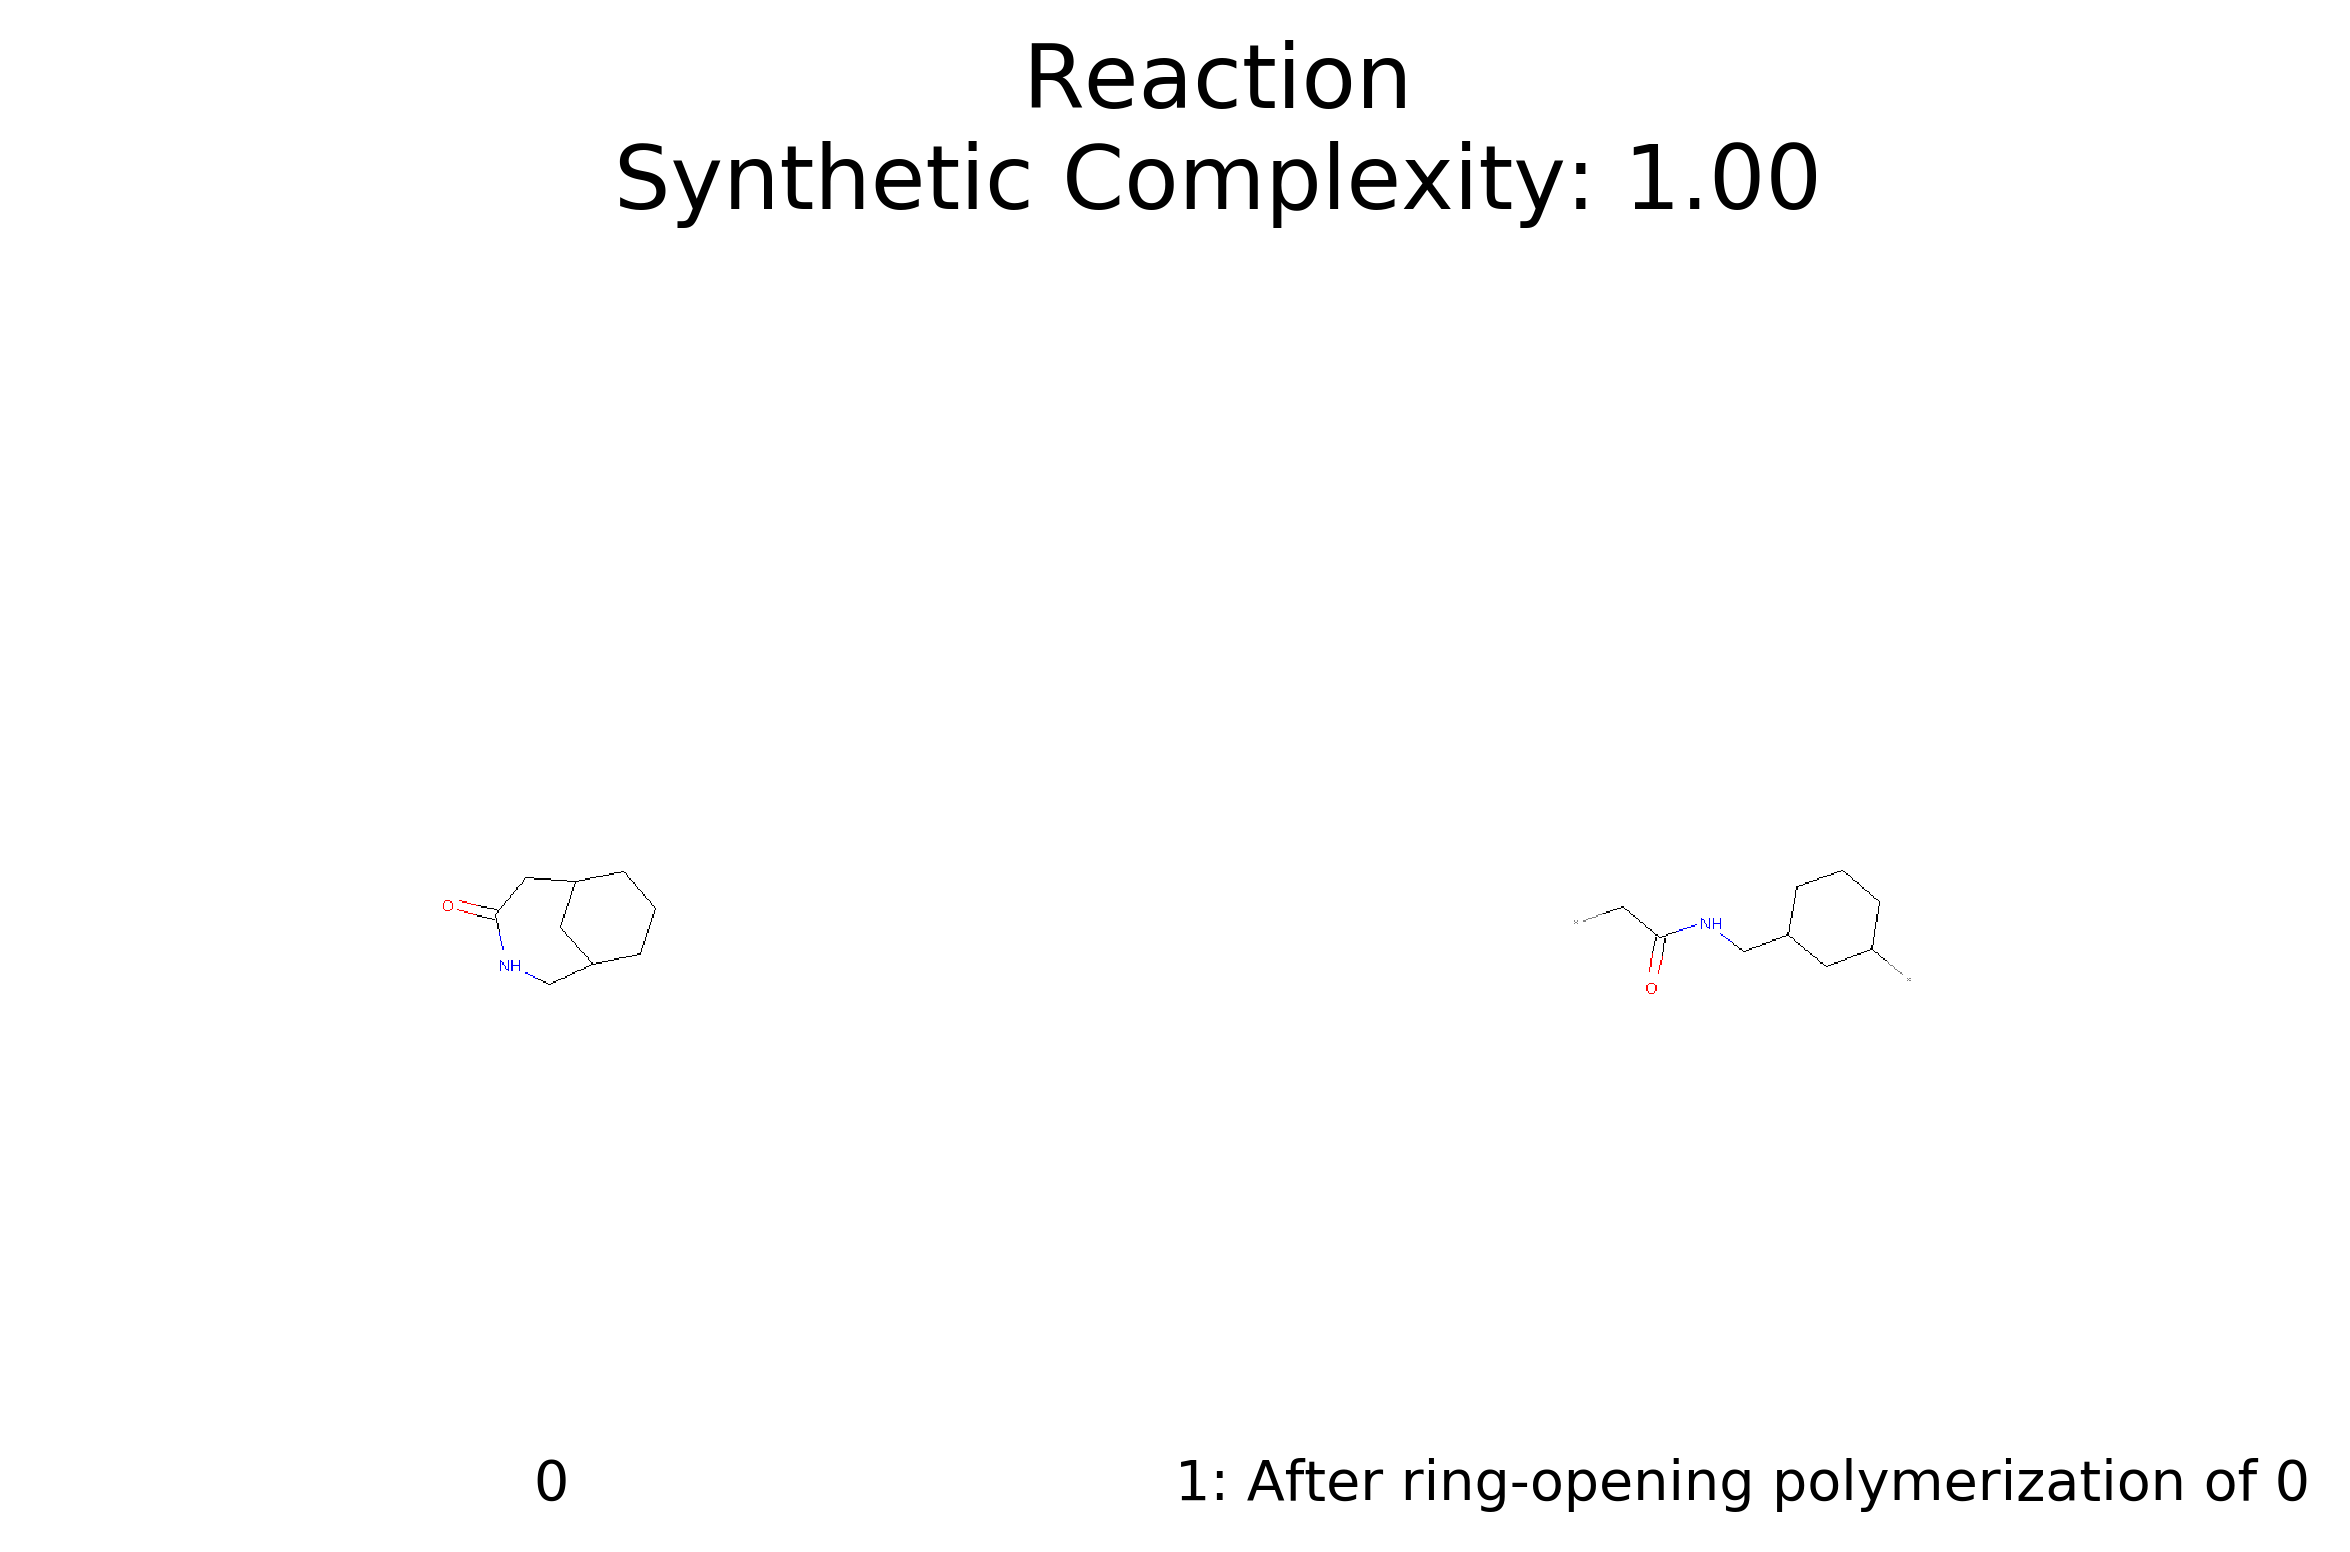

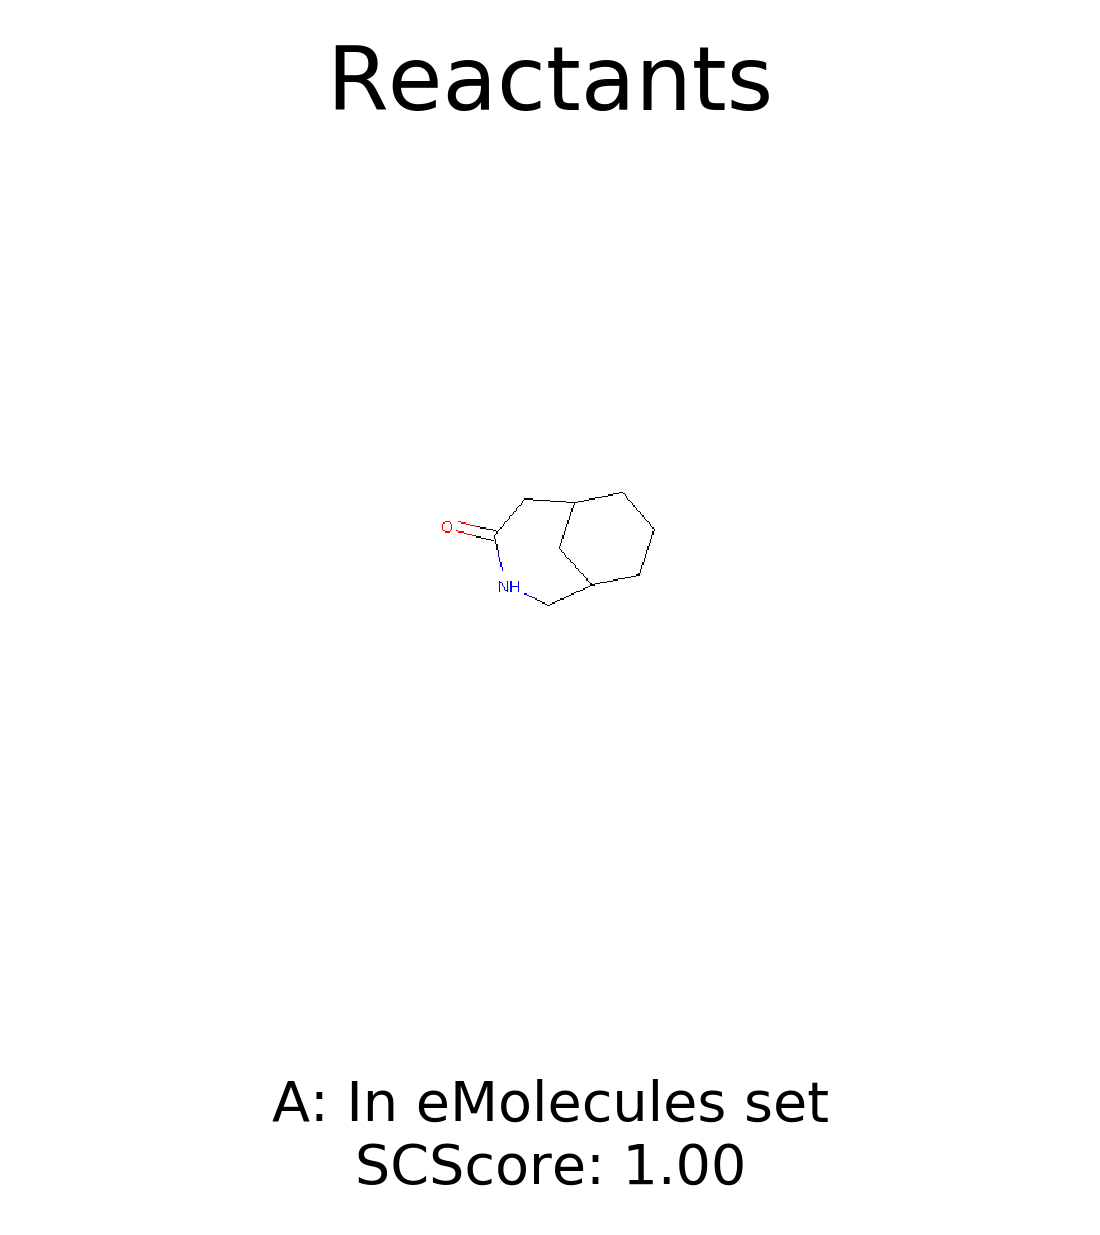

In [43]:
i=3
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

False


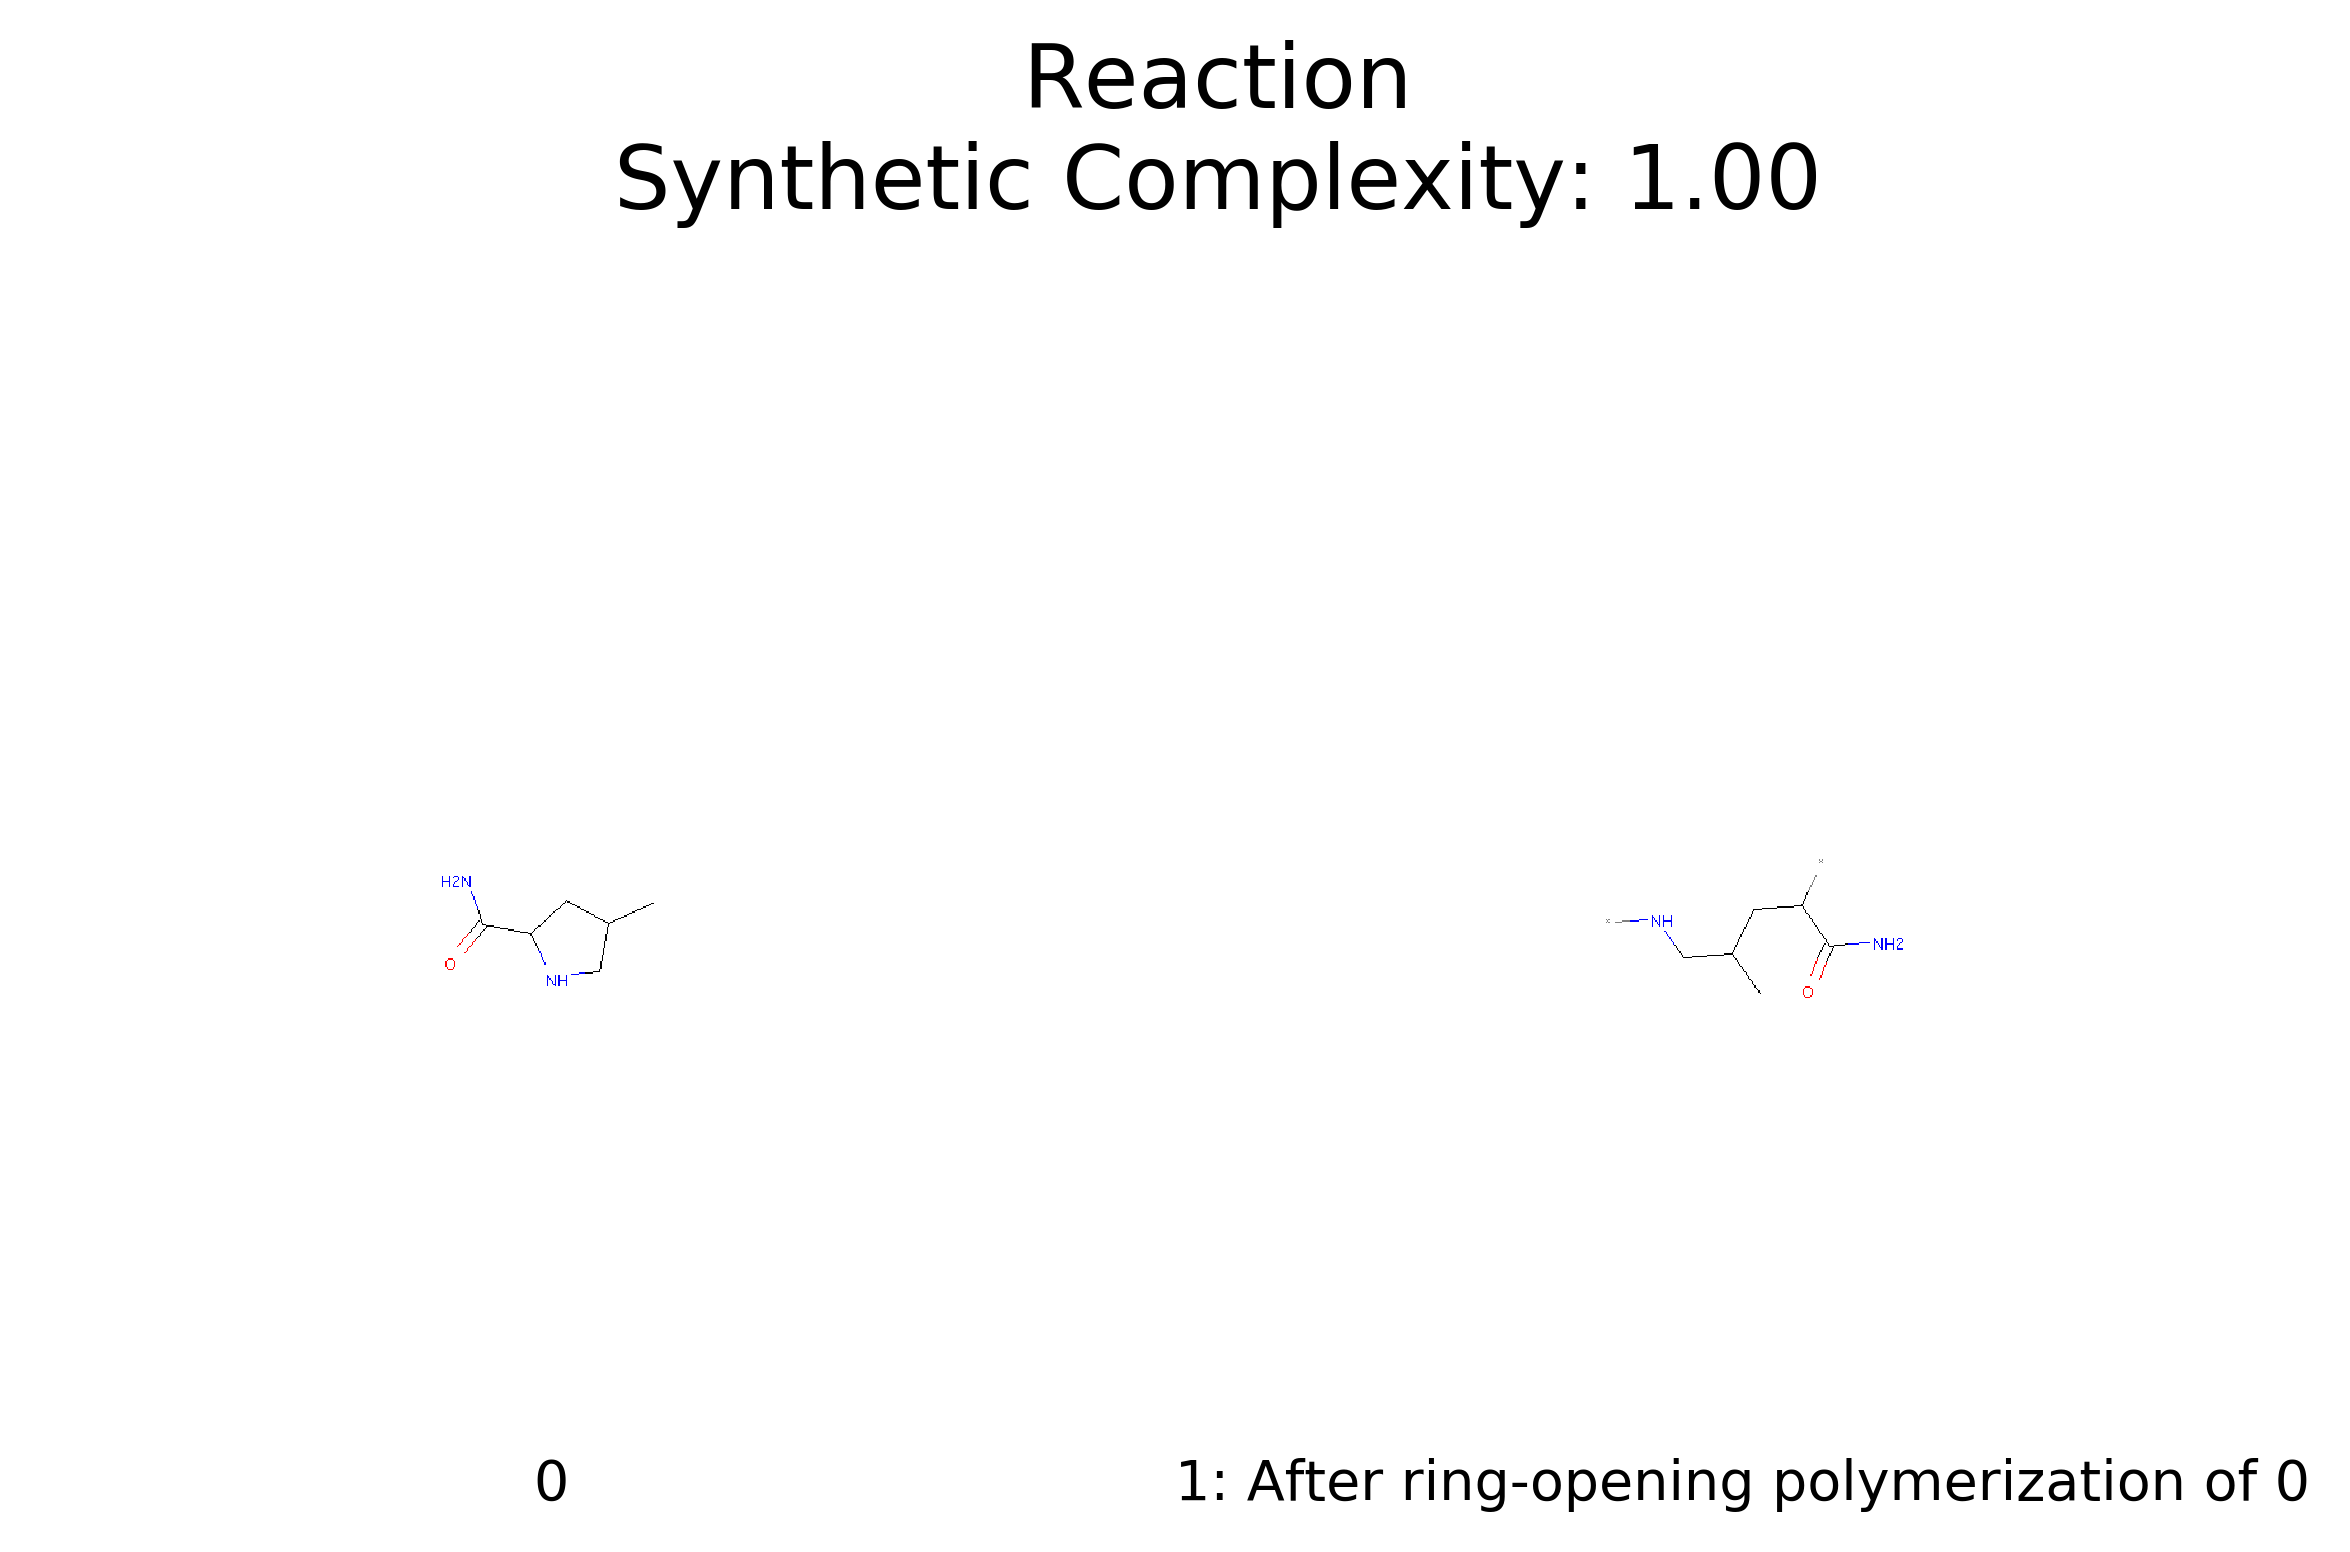

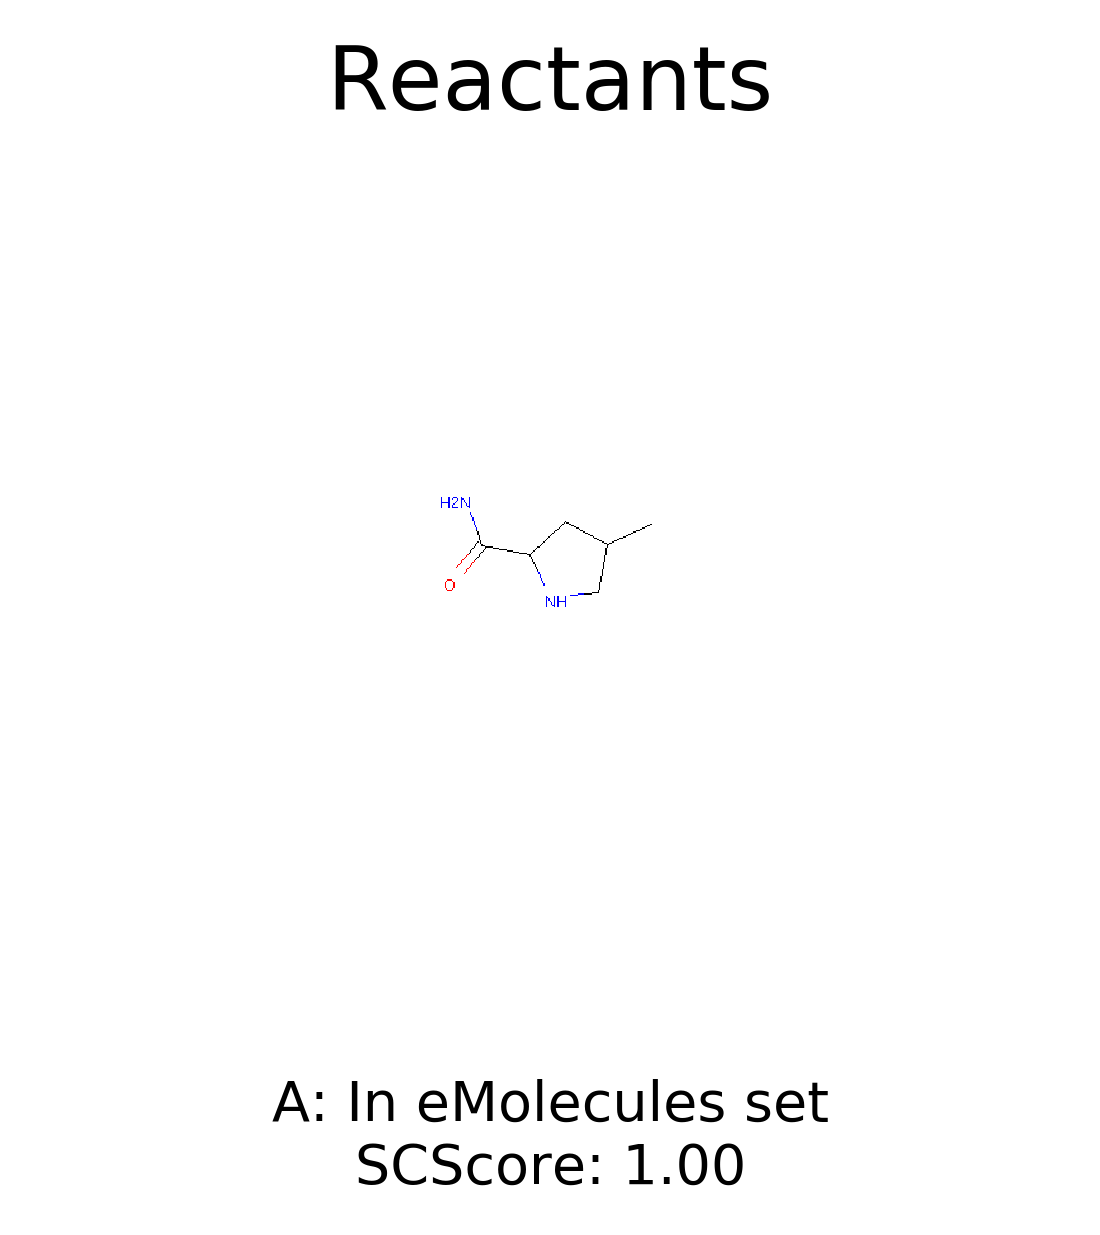

In [44]:
i=4
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

False


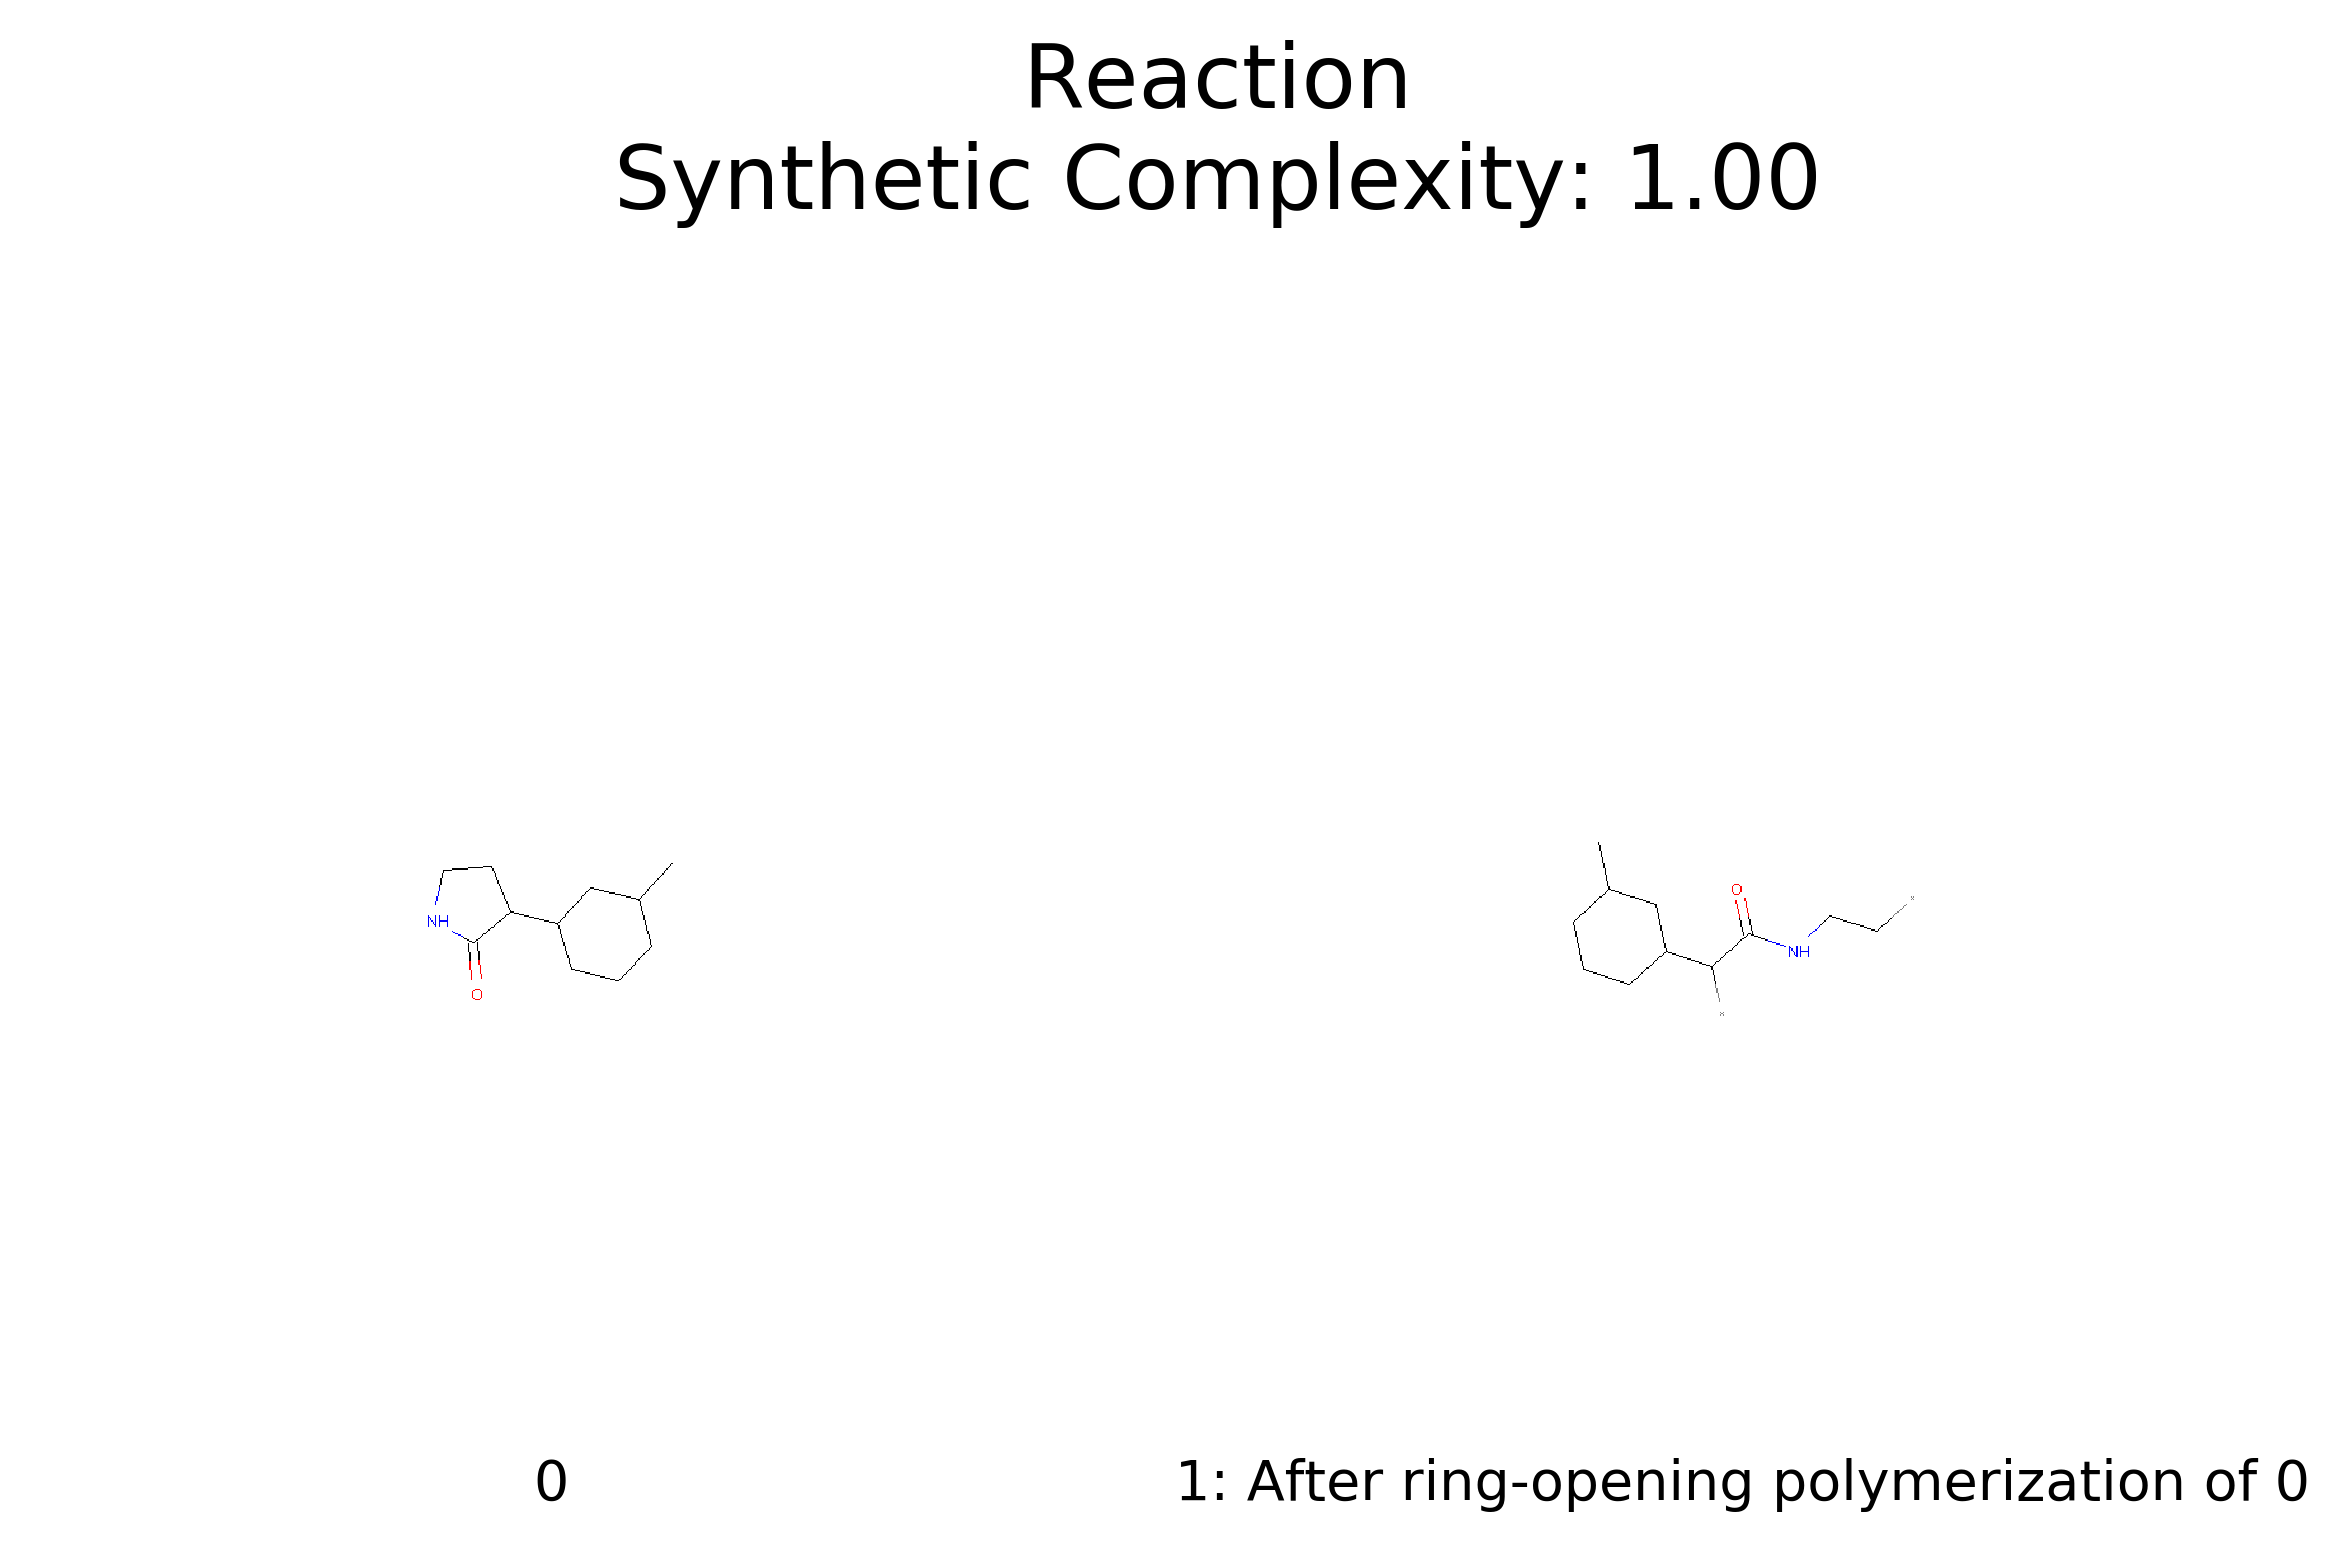

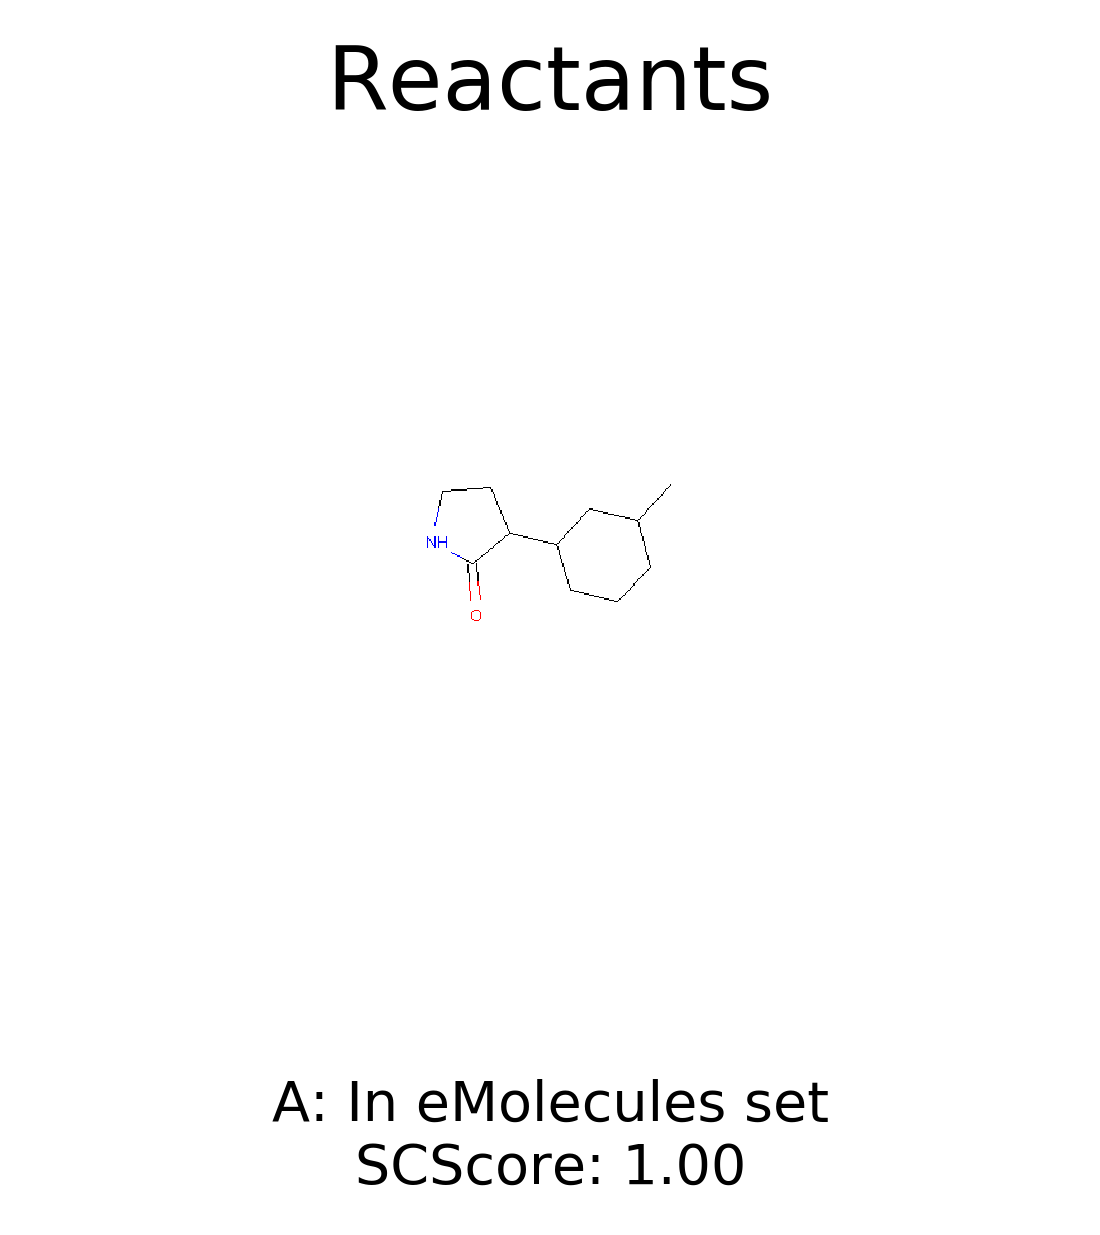

In [45]:
i=5
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

False


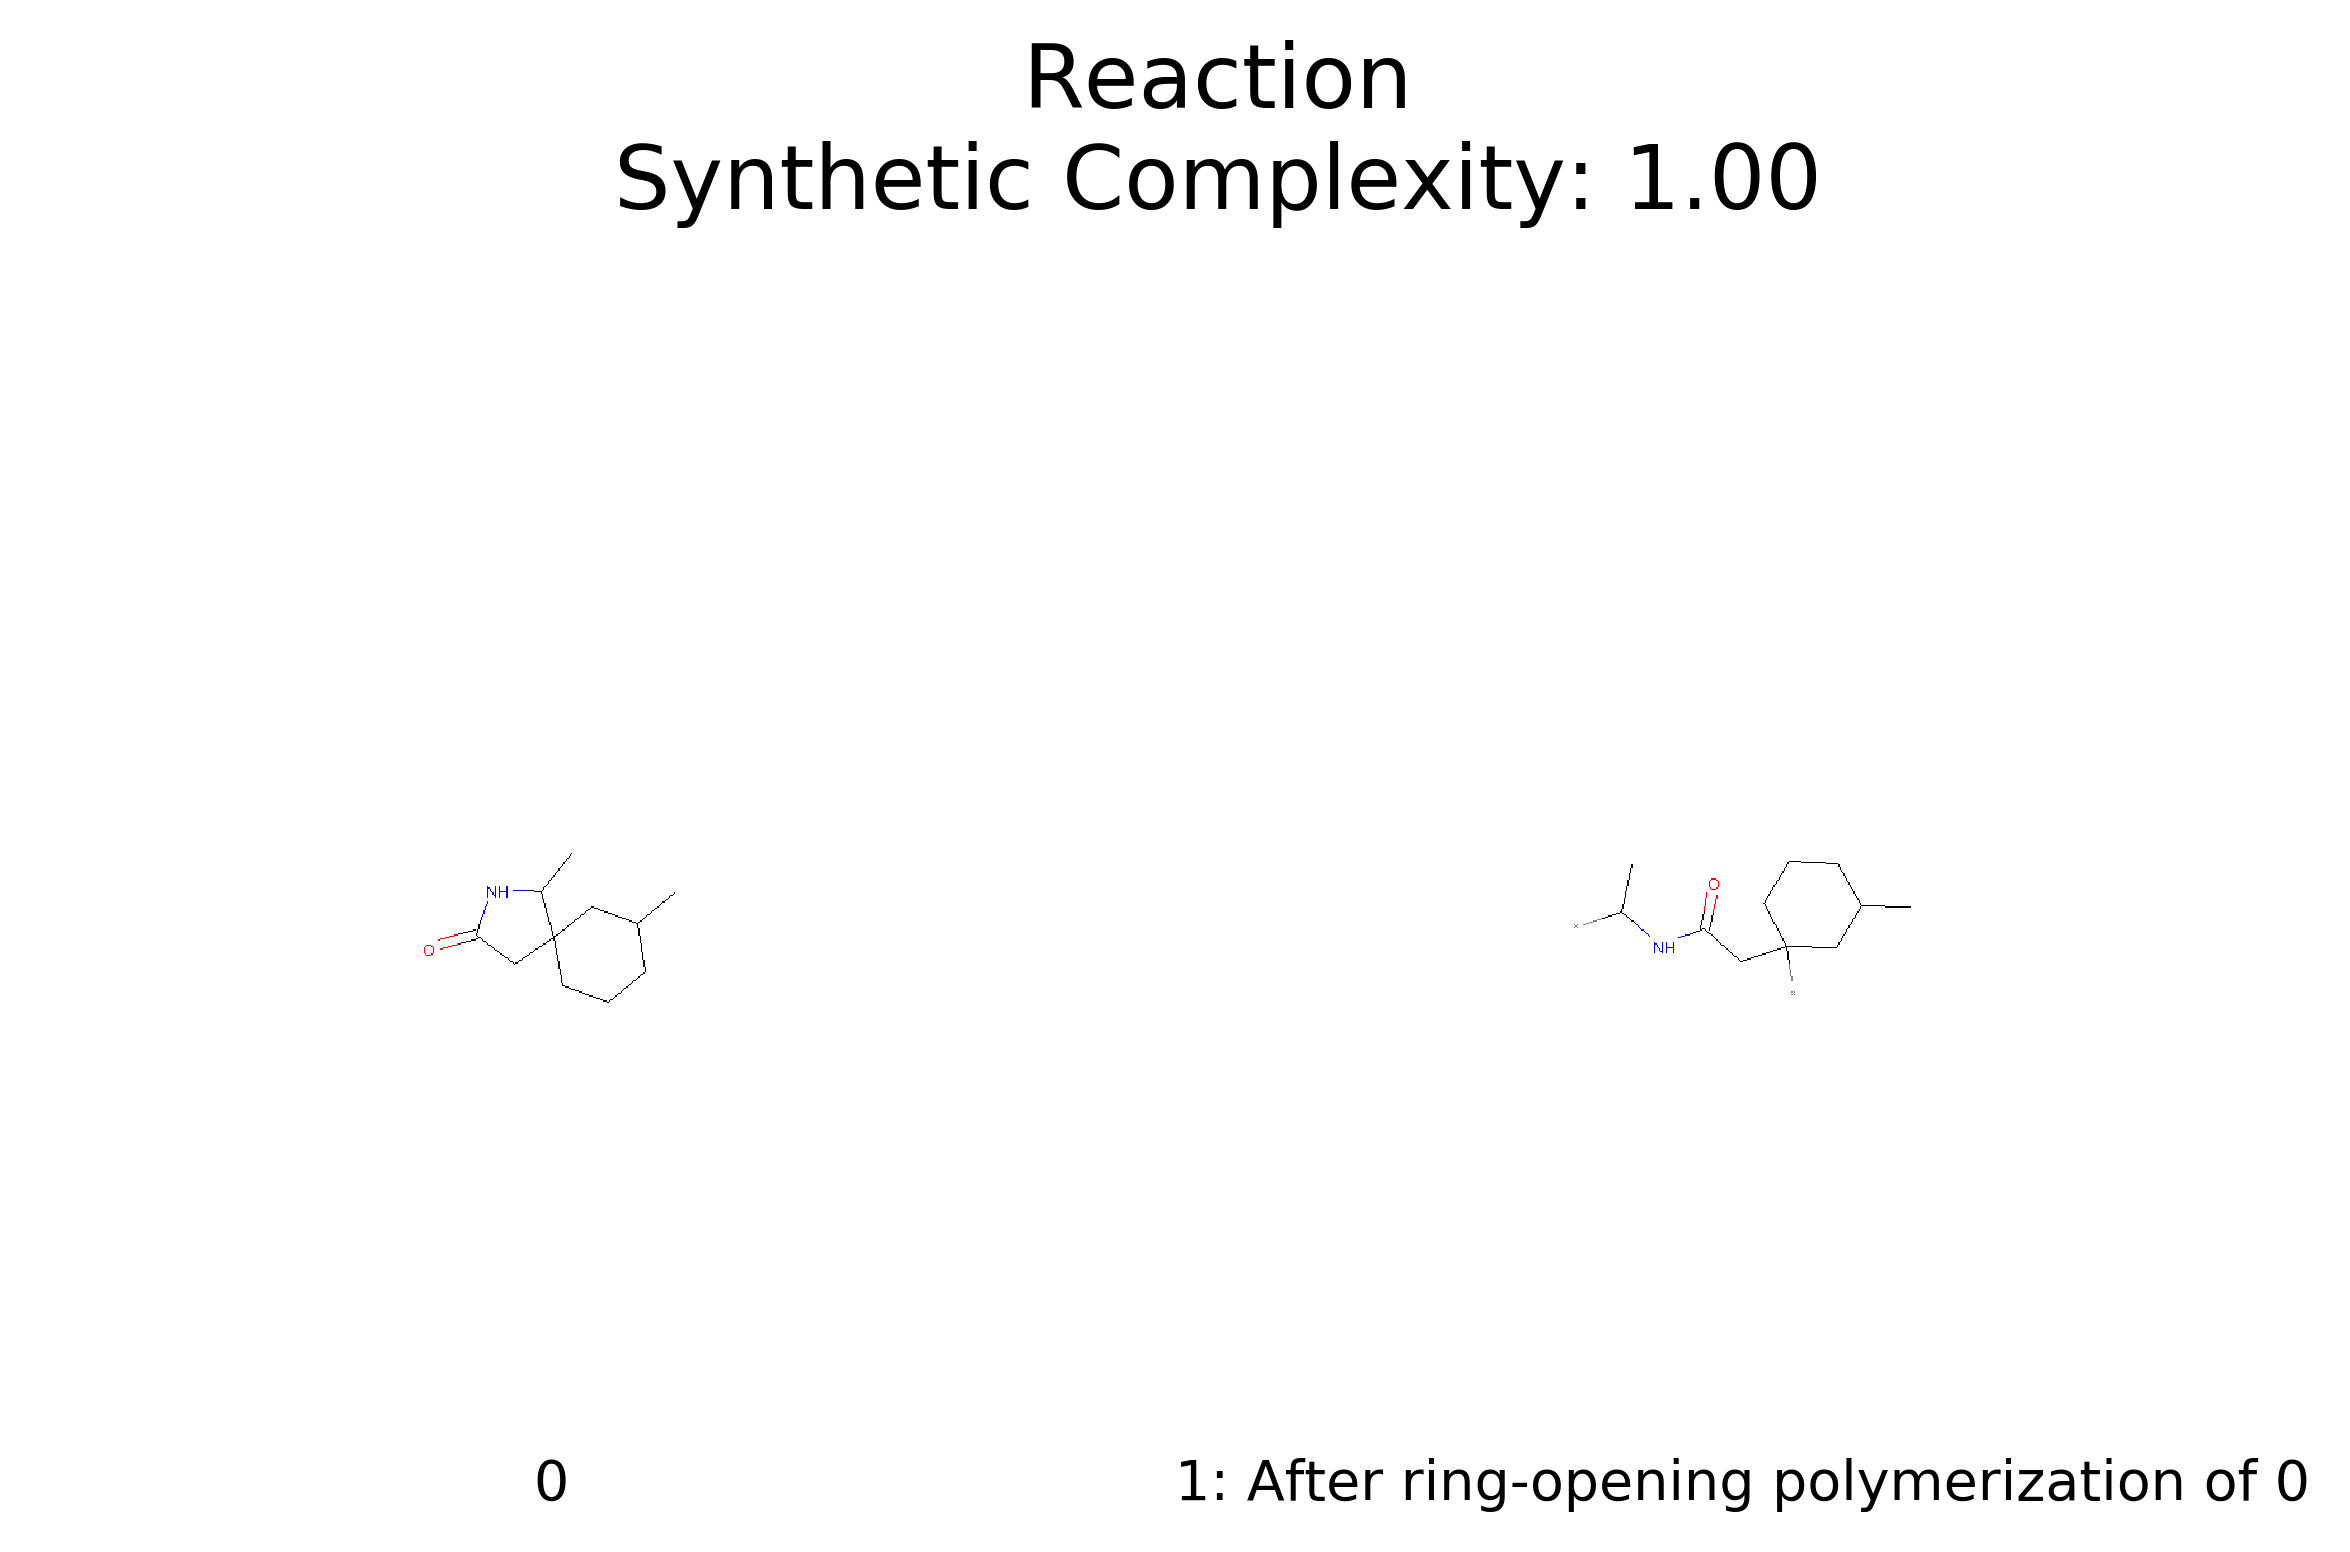

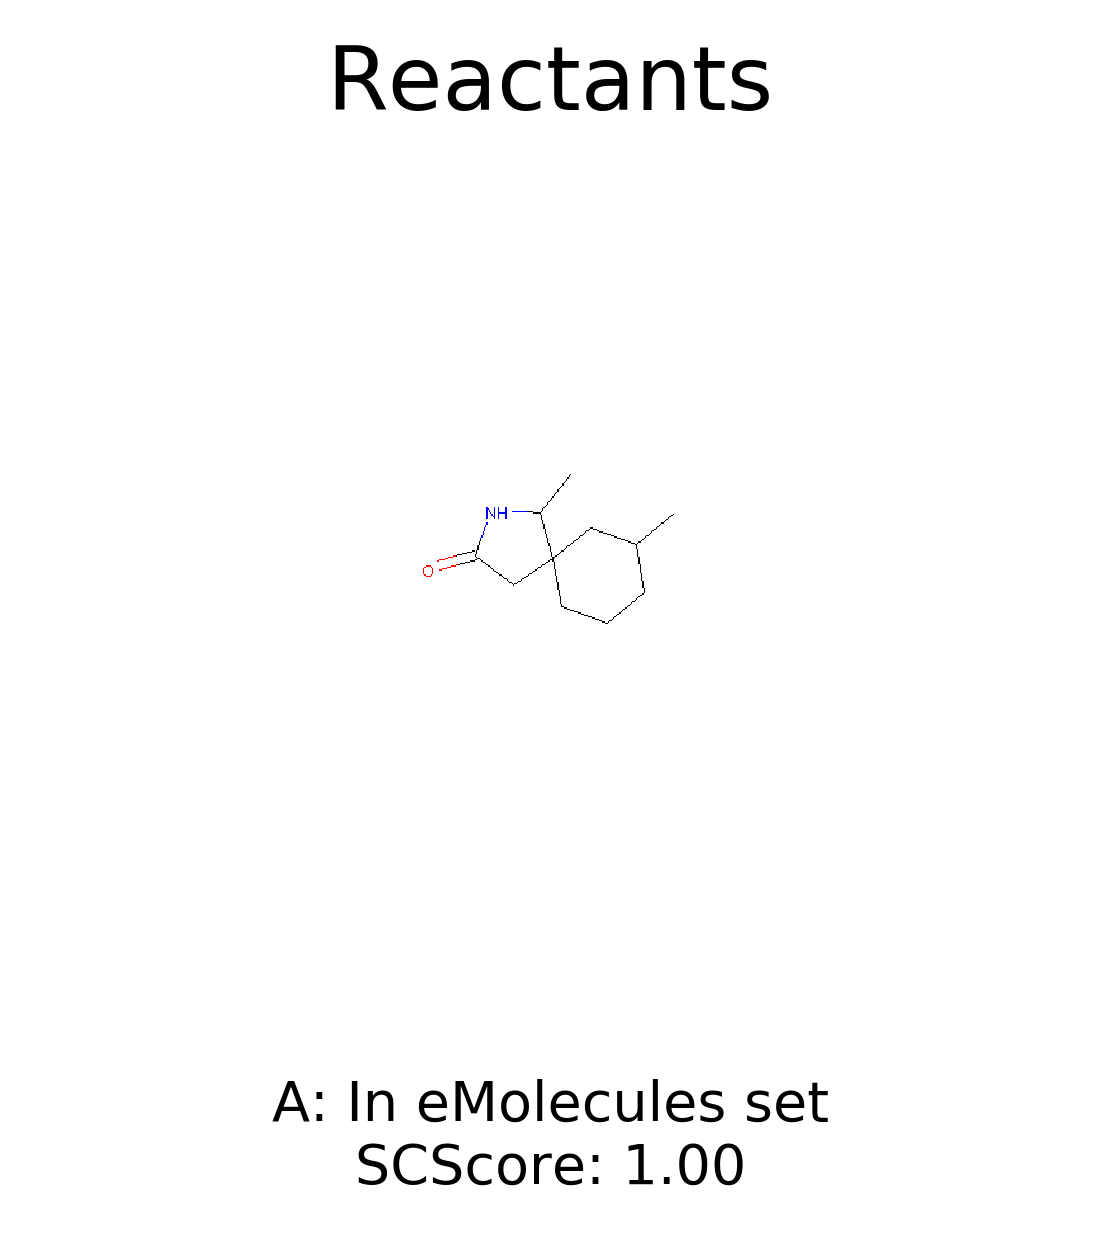

In [46]:
i=6
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

False


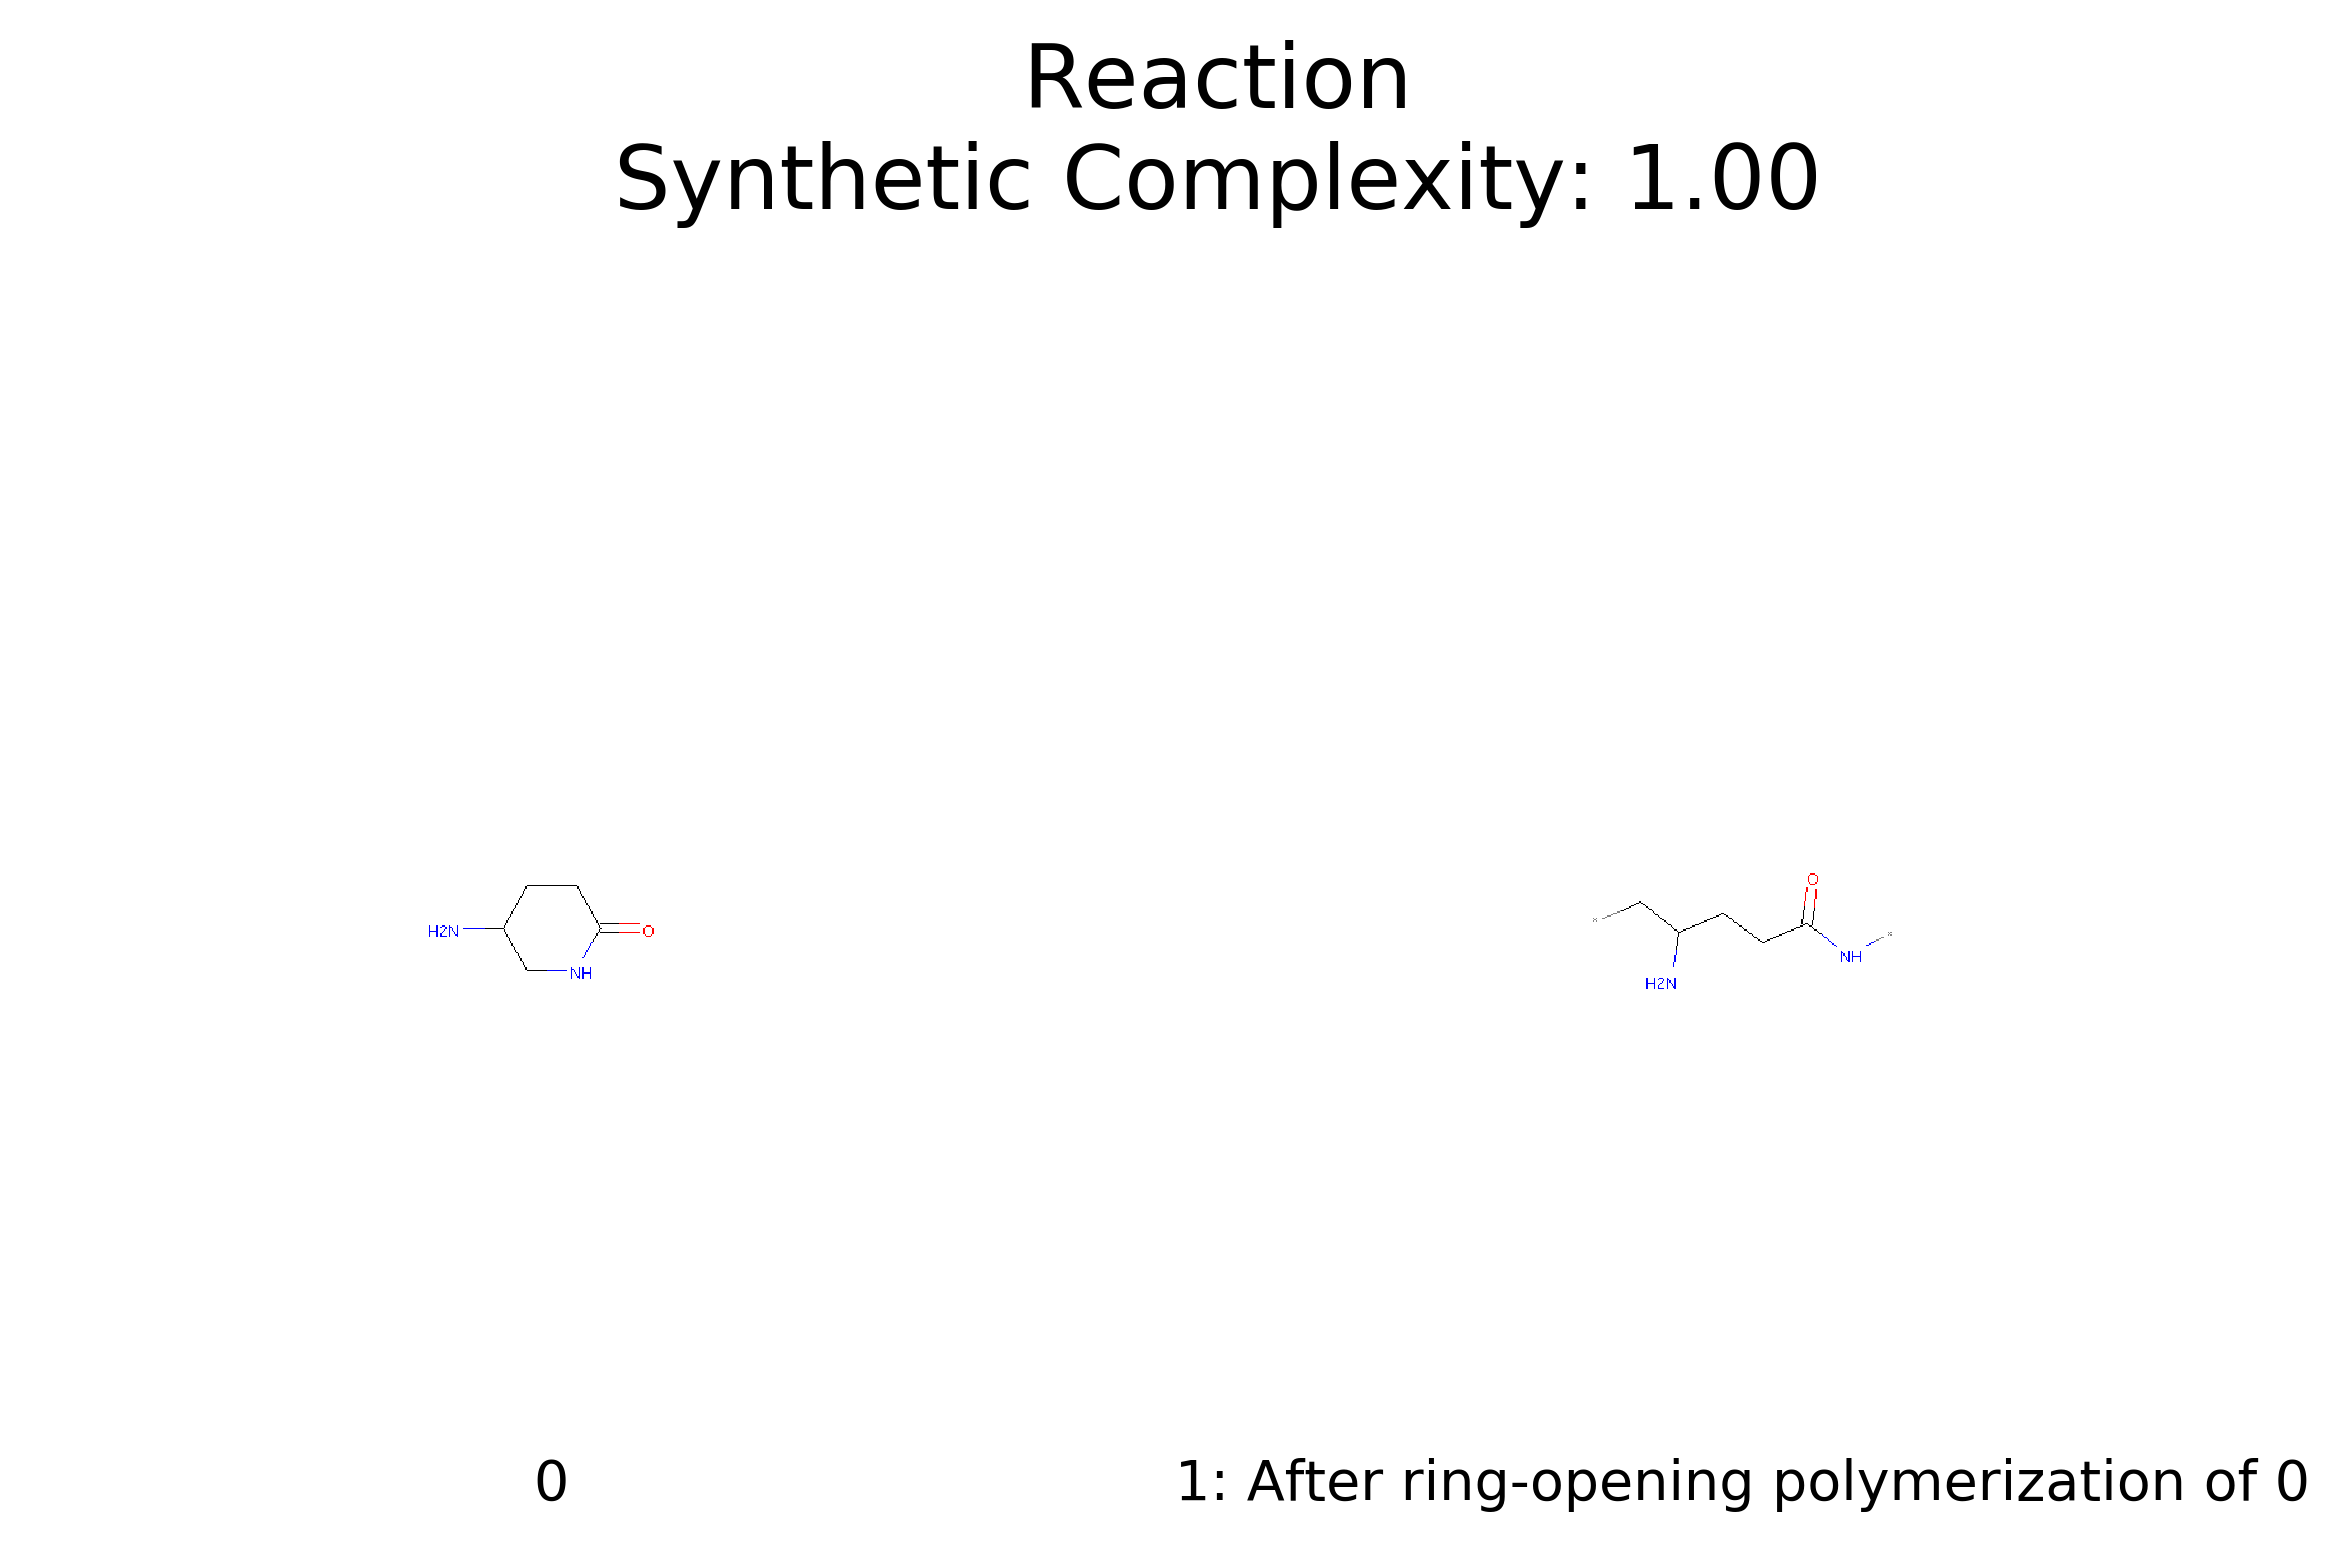

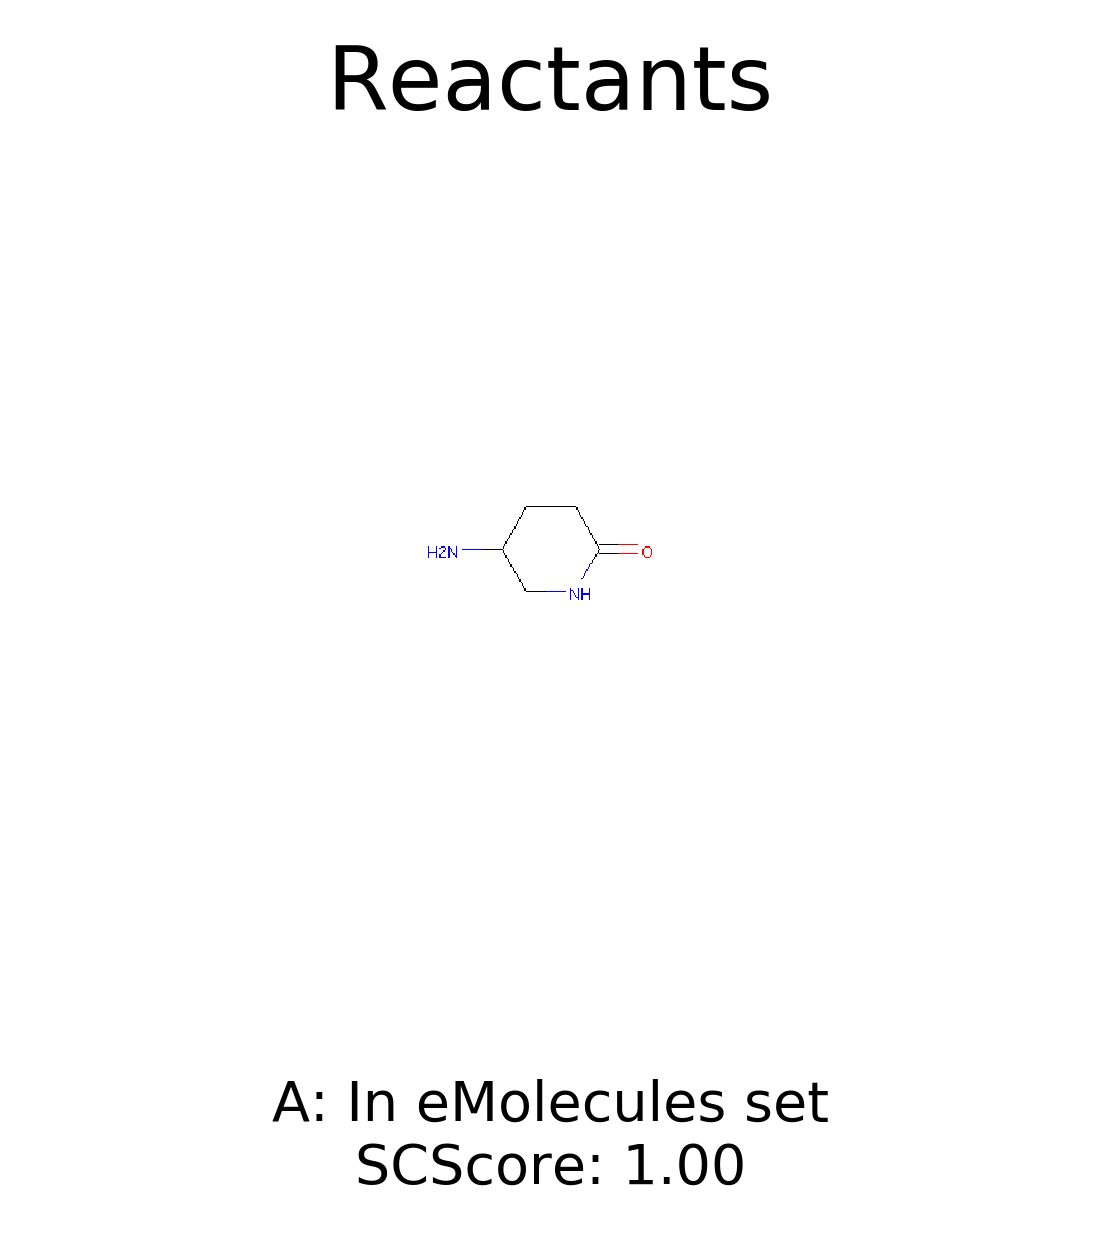

In [47]:
i=7
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

False


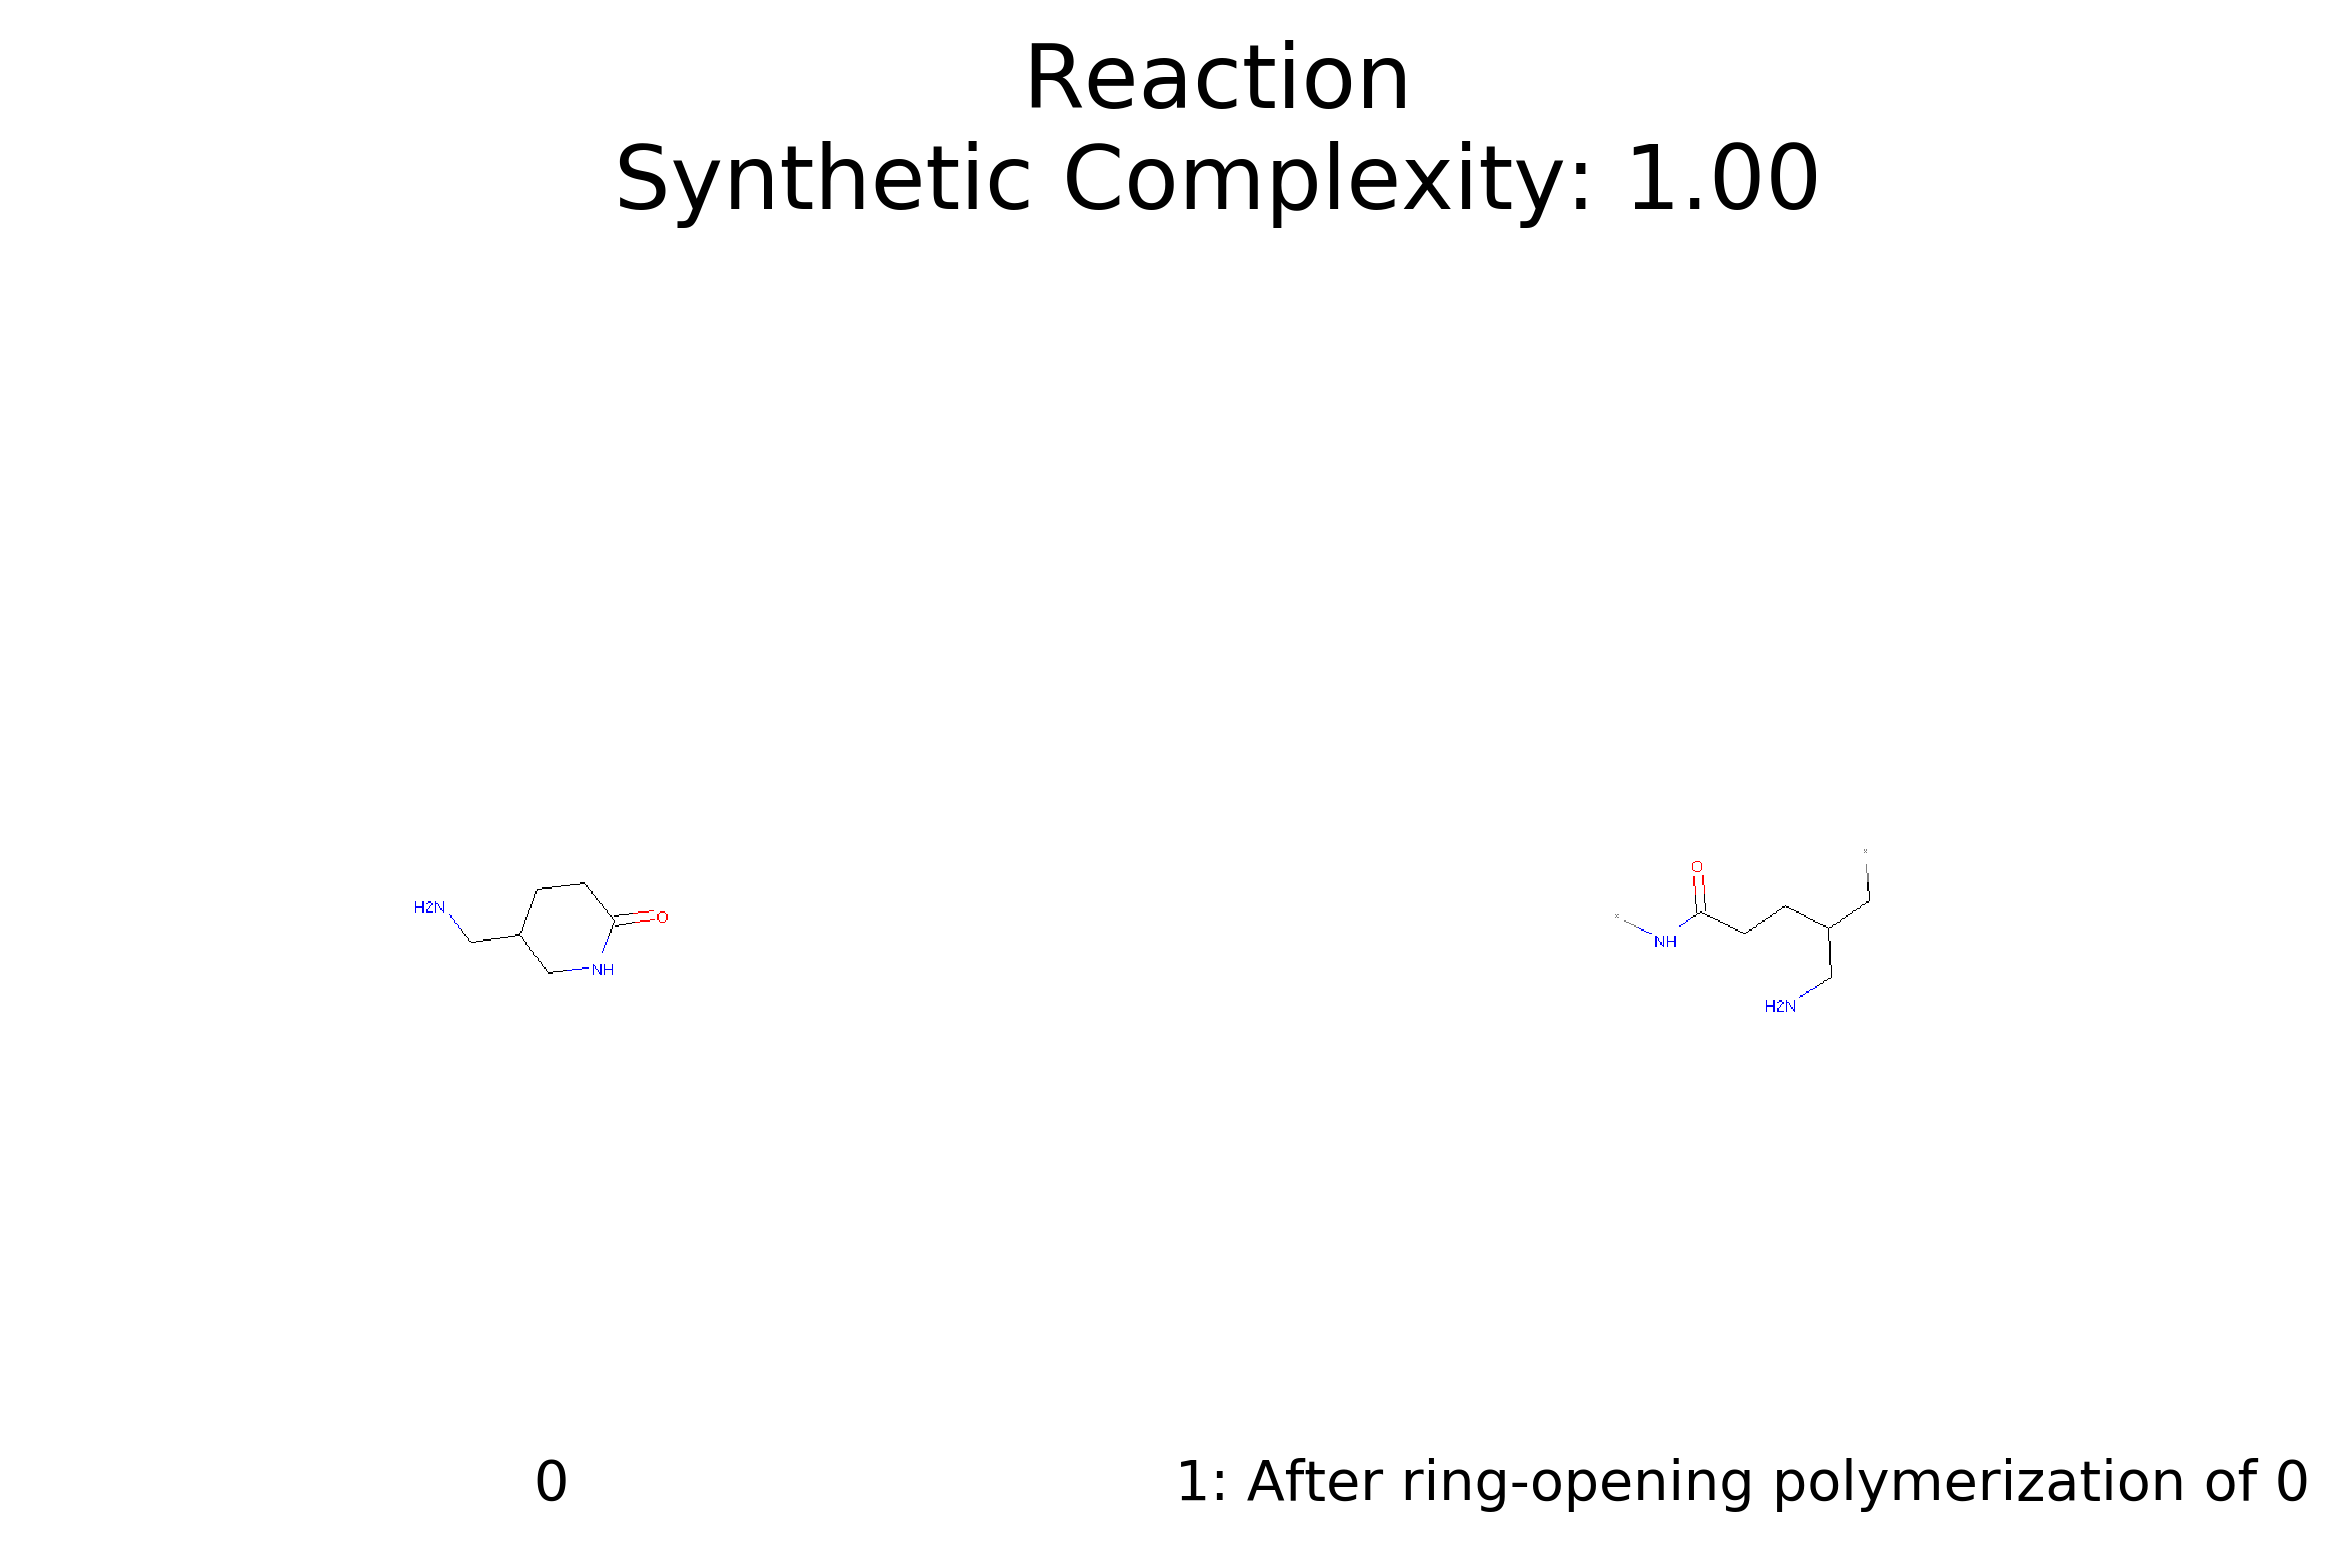

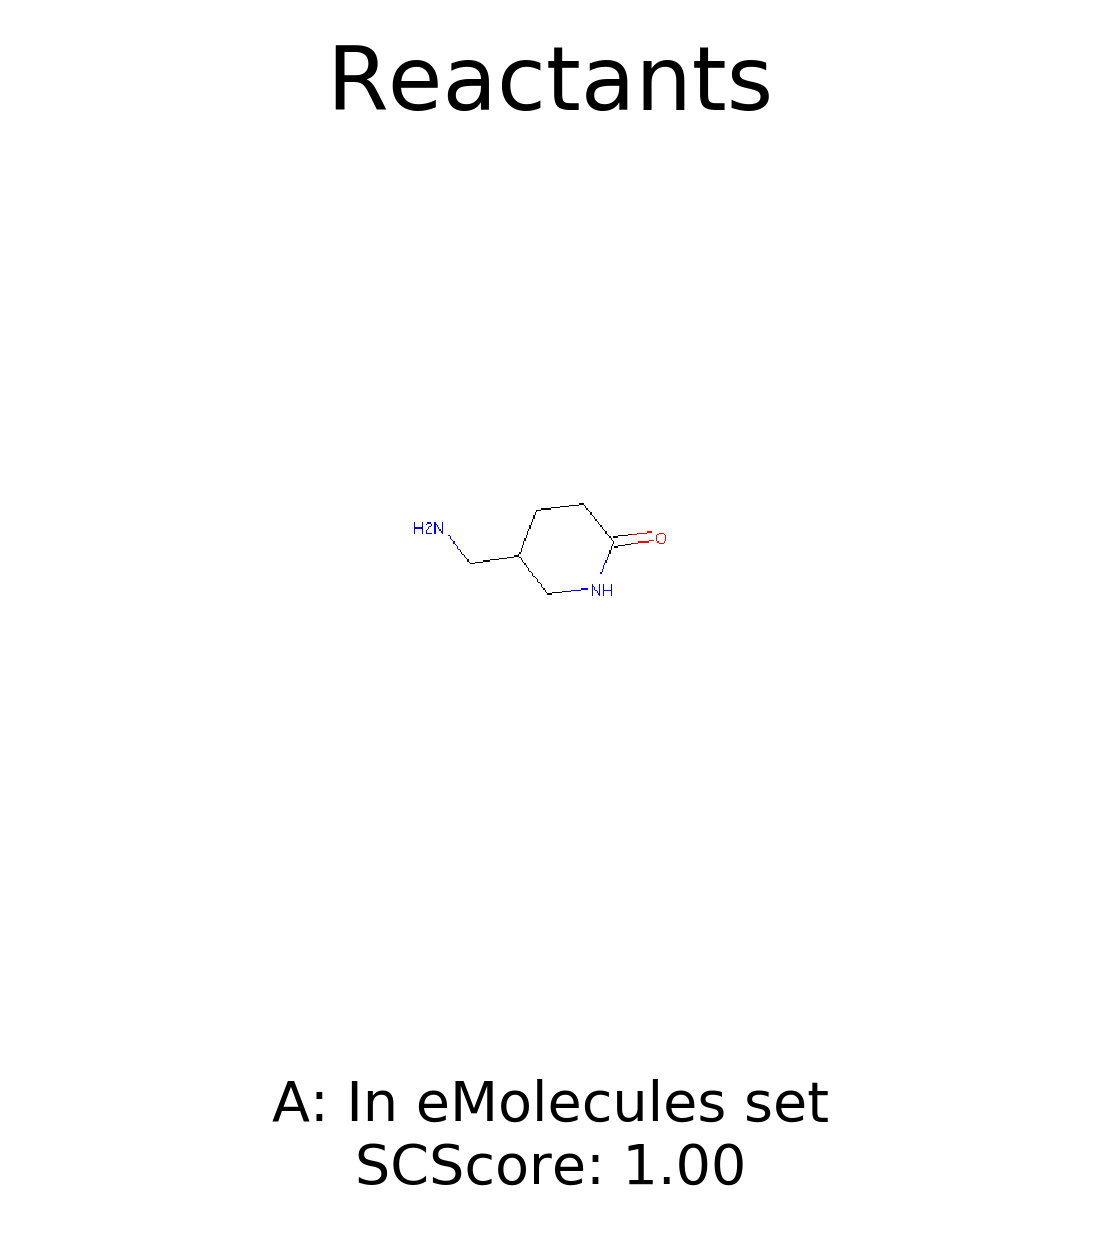

In [48]:
i=8
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

False


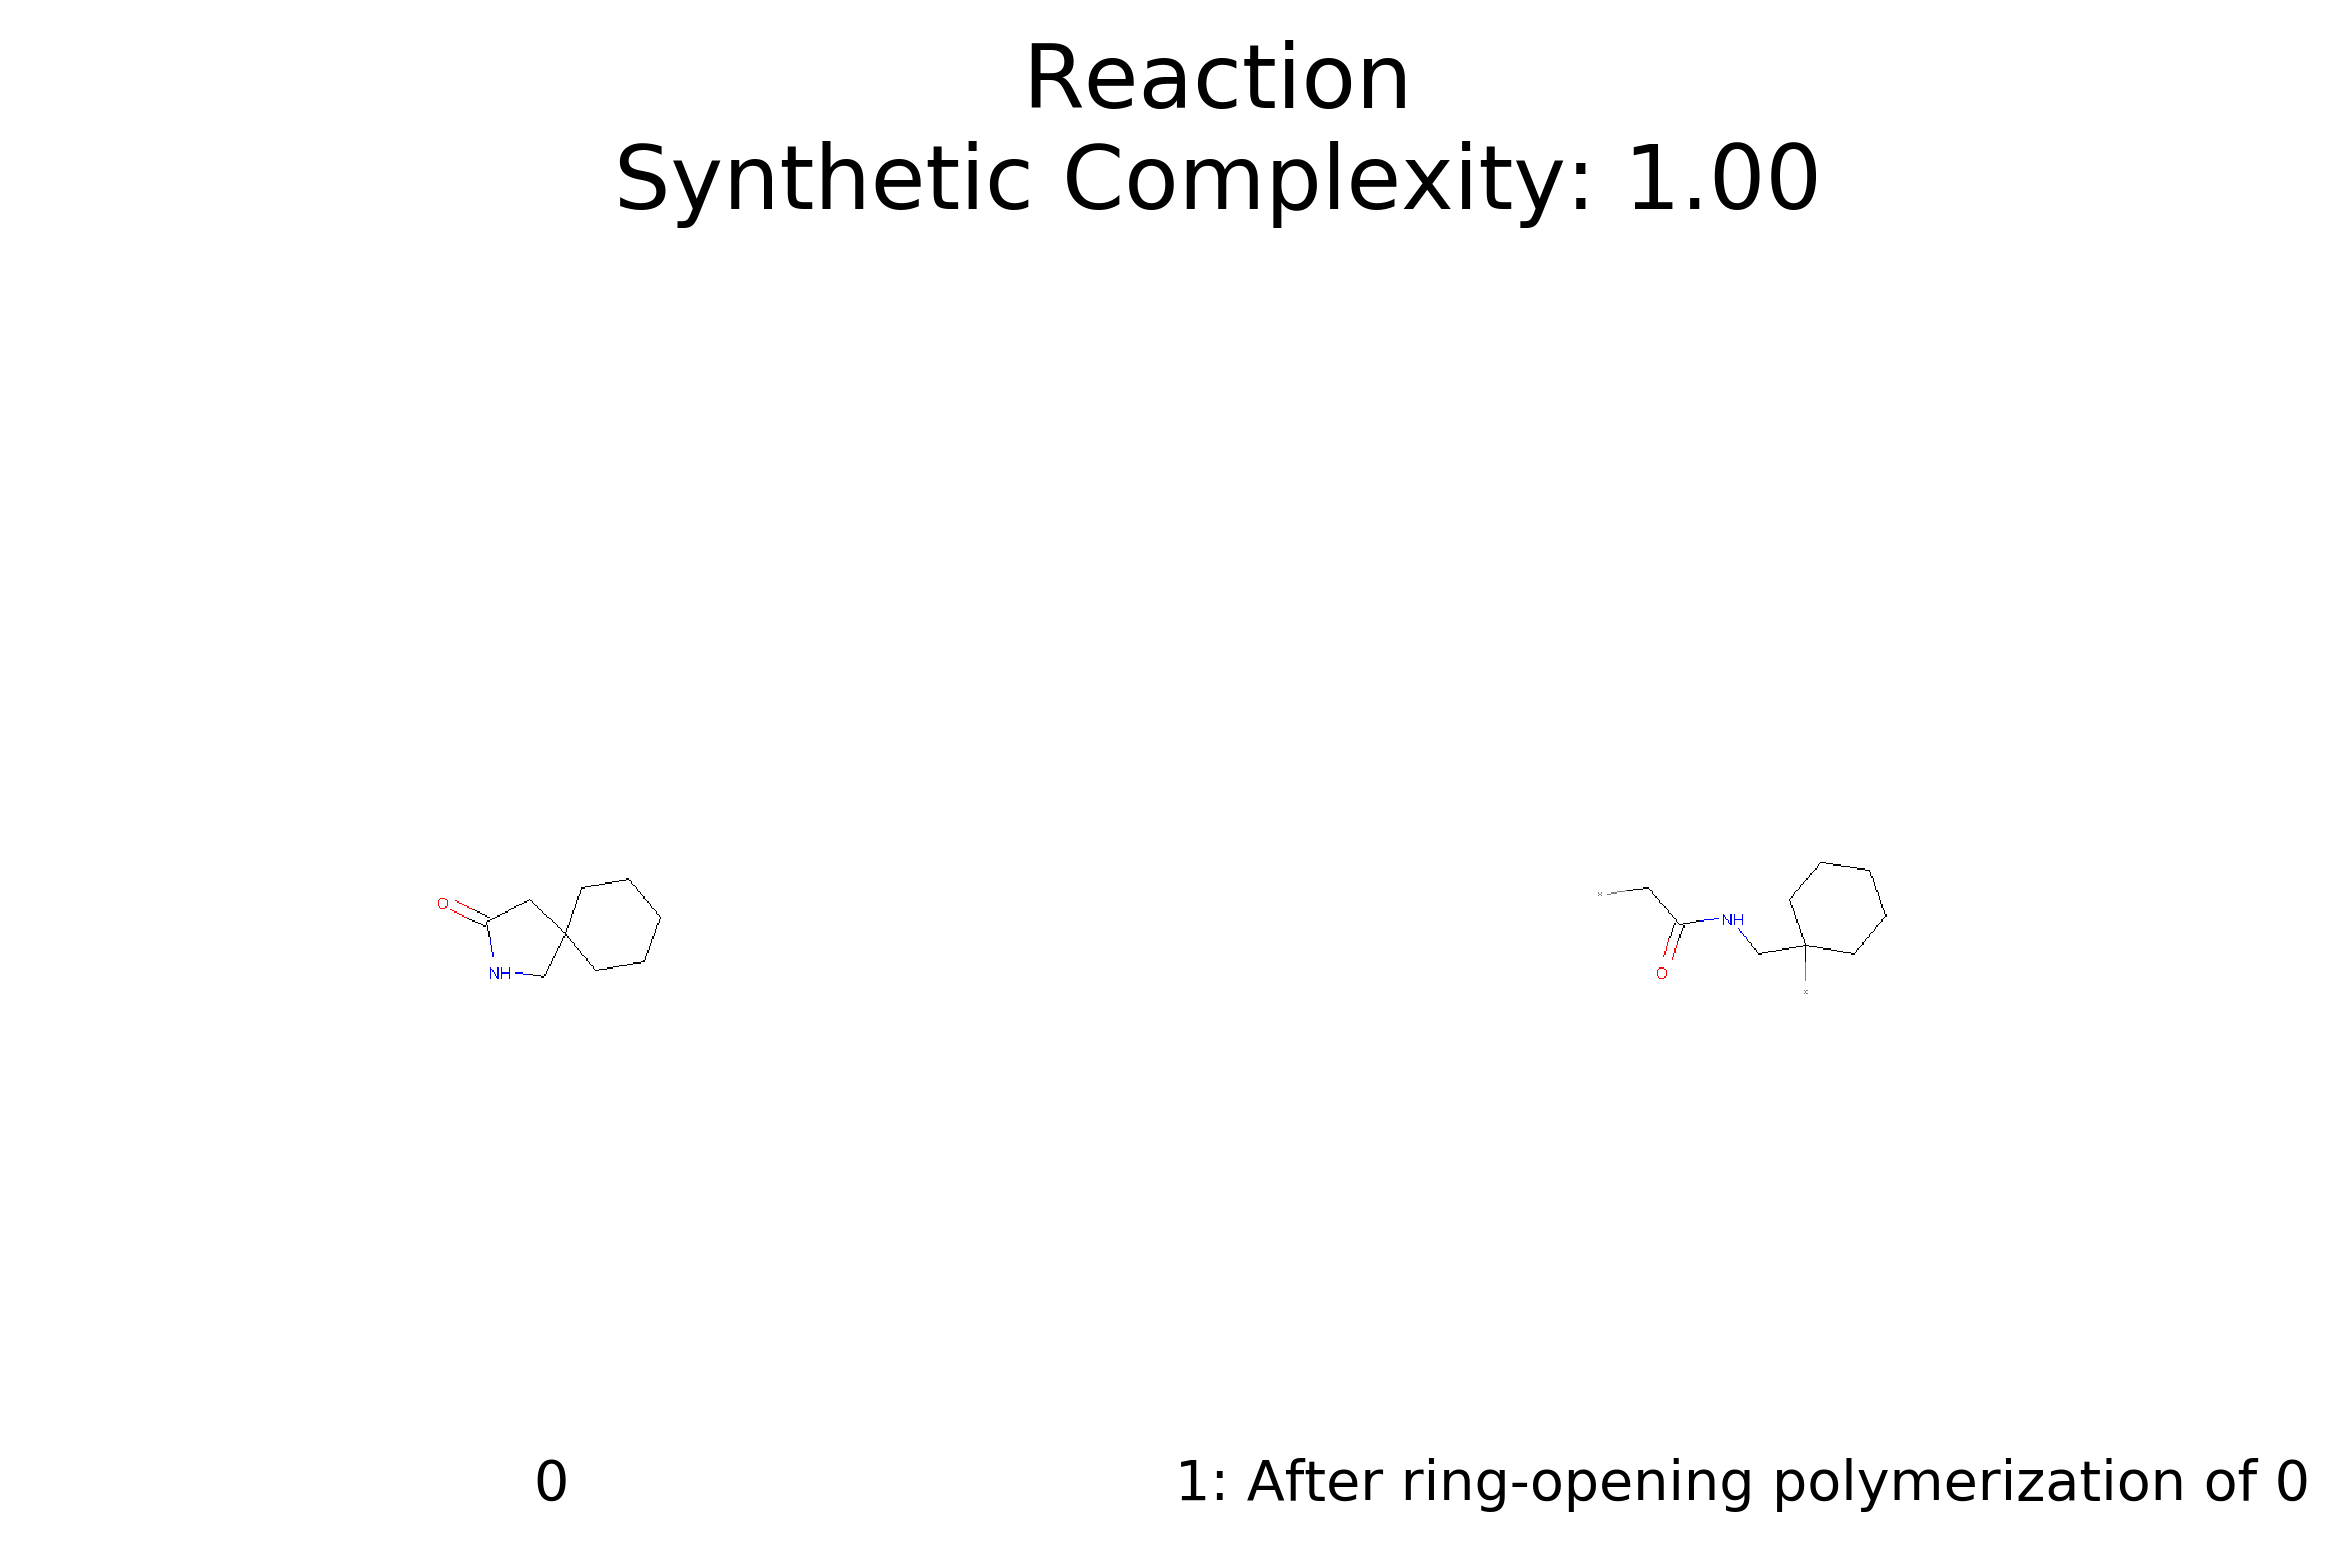

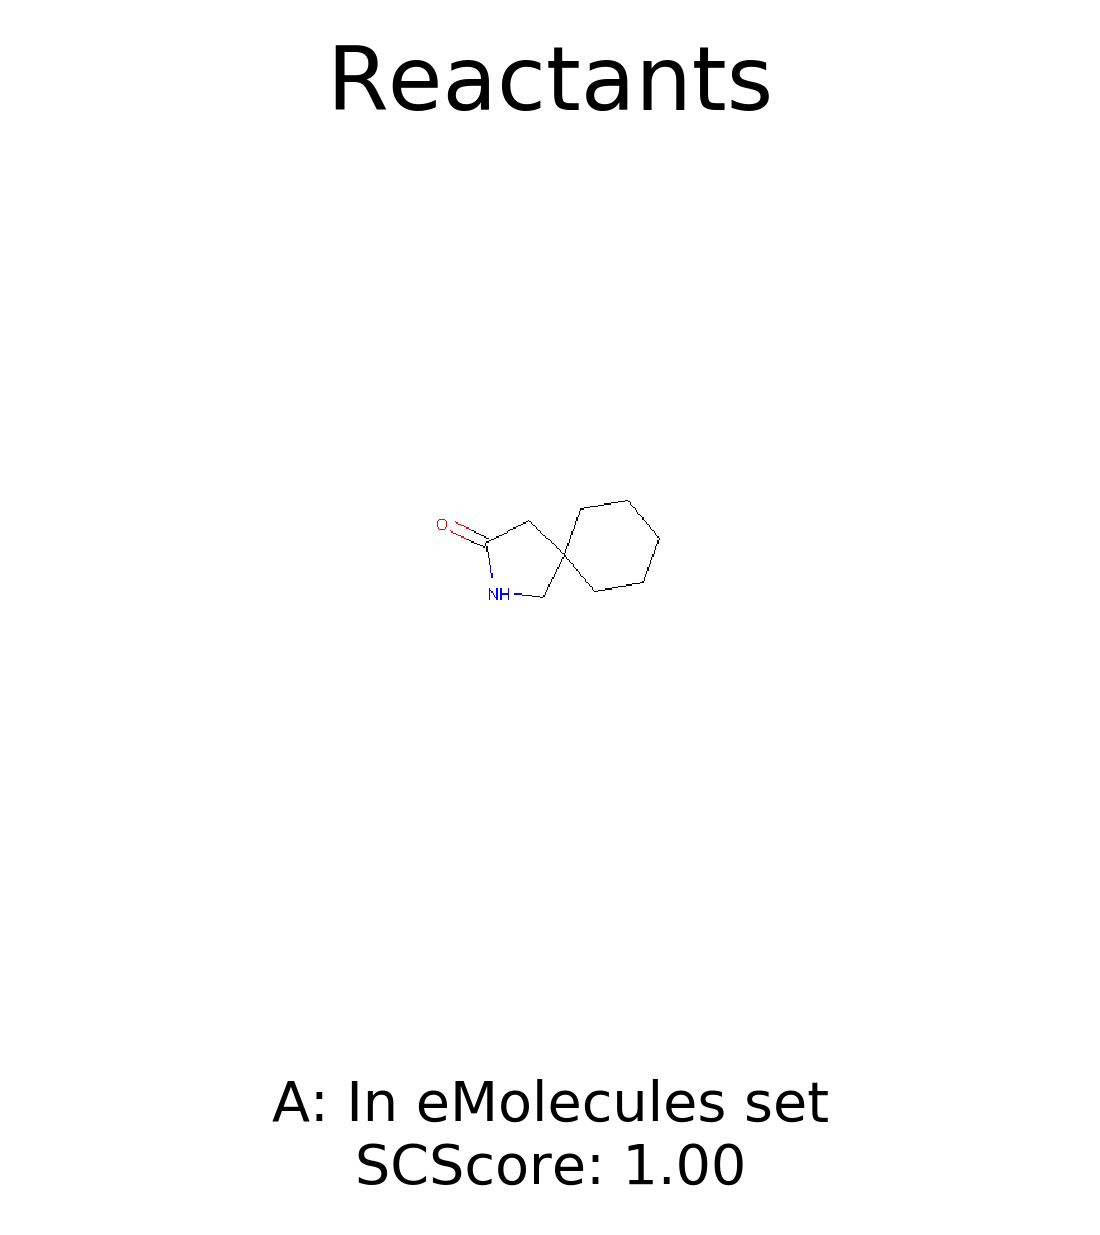

In [49]:
i=9
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

False


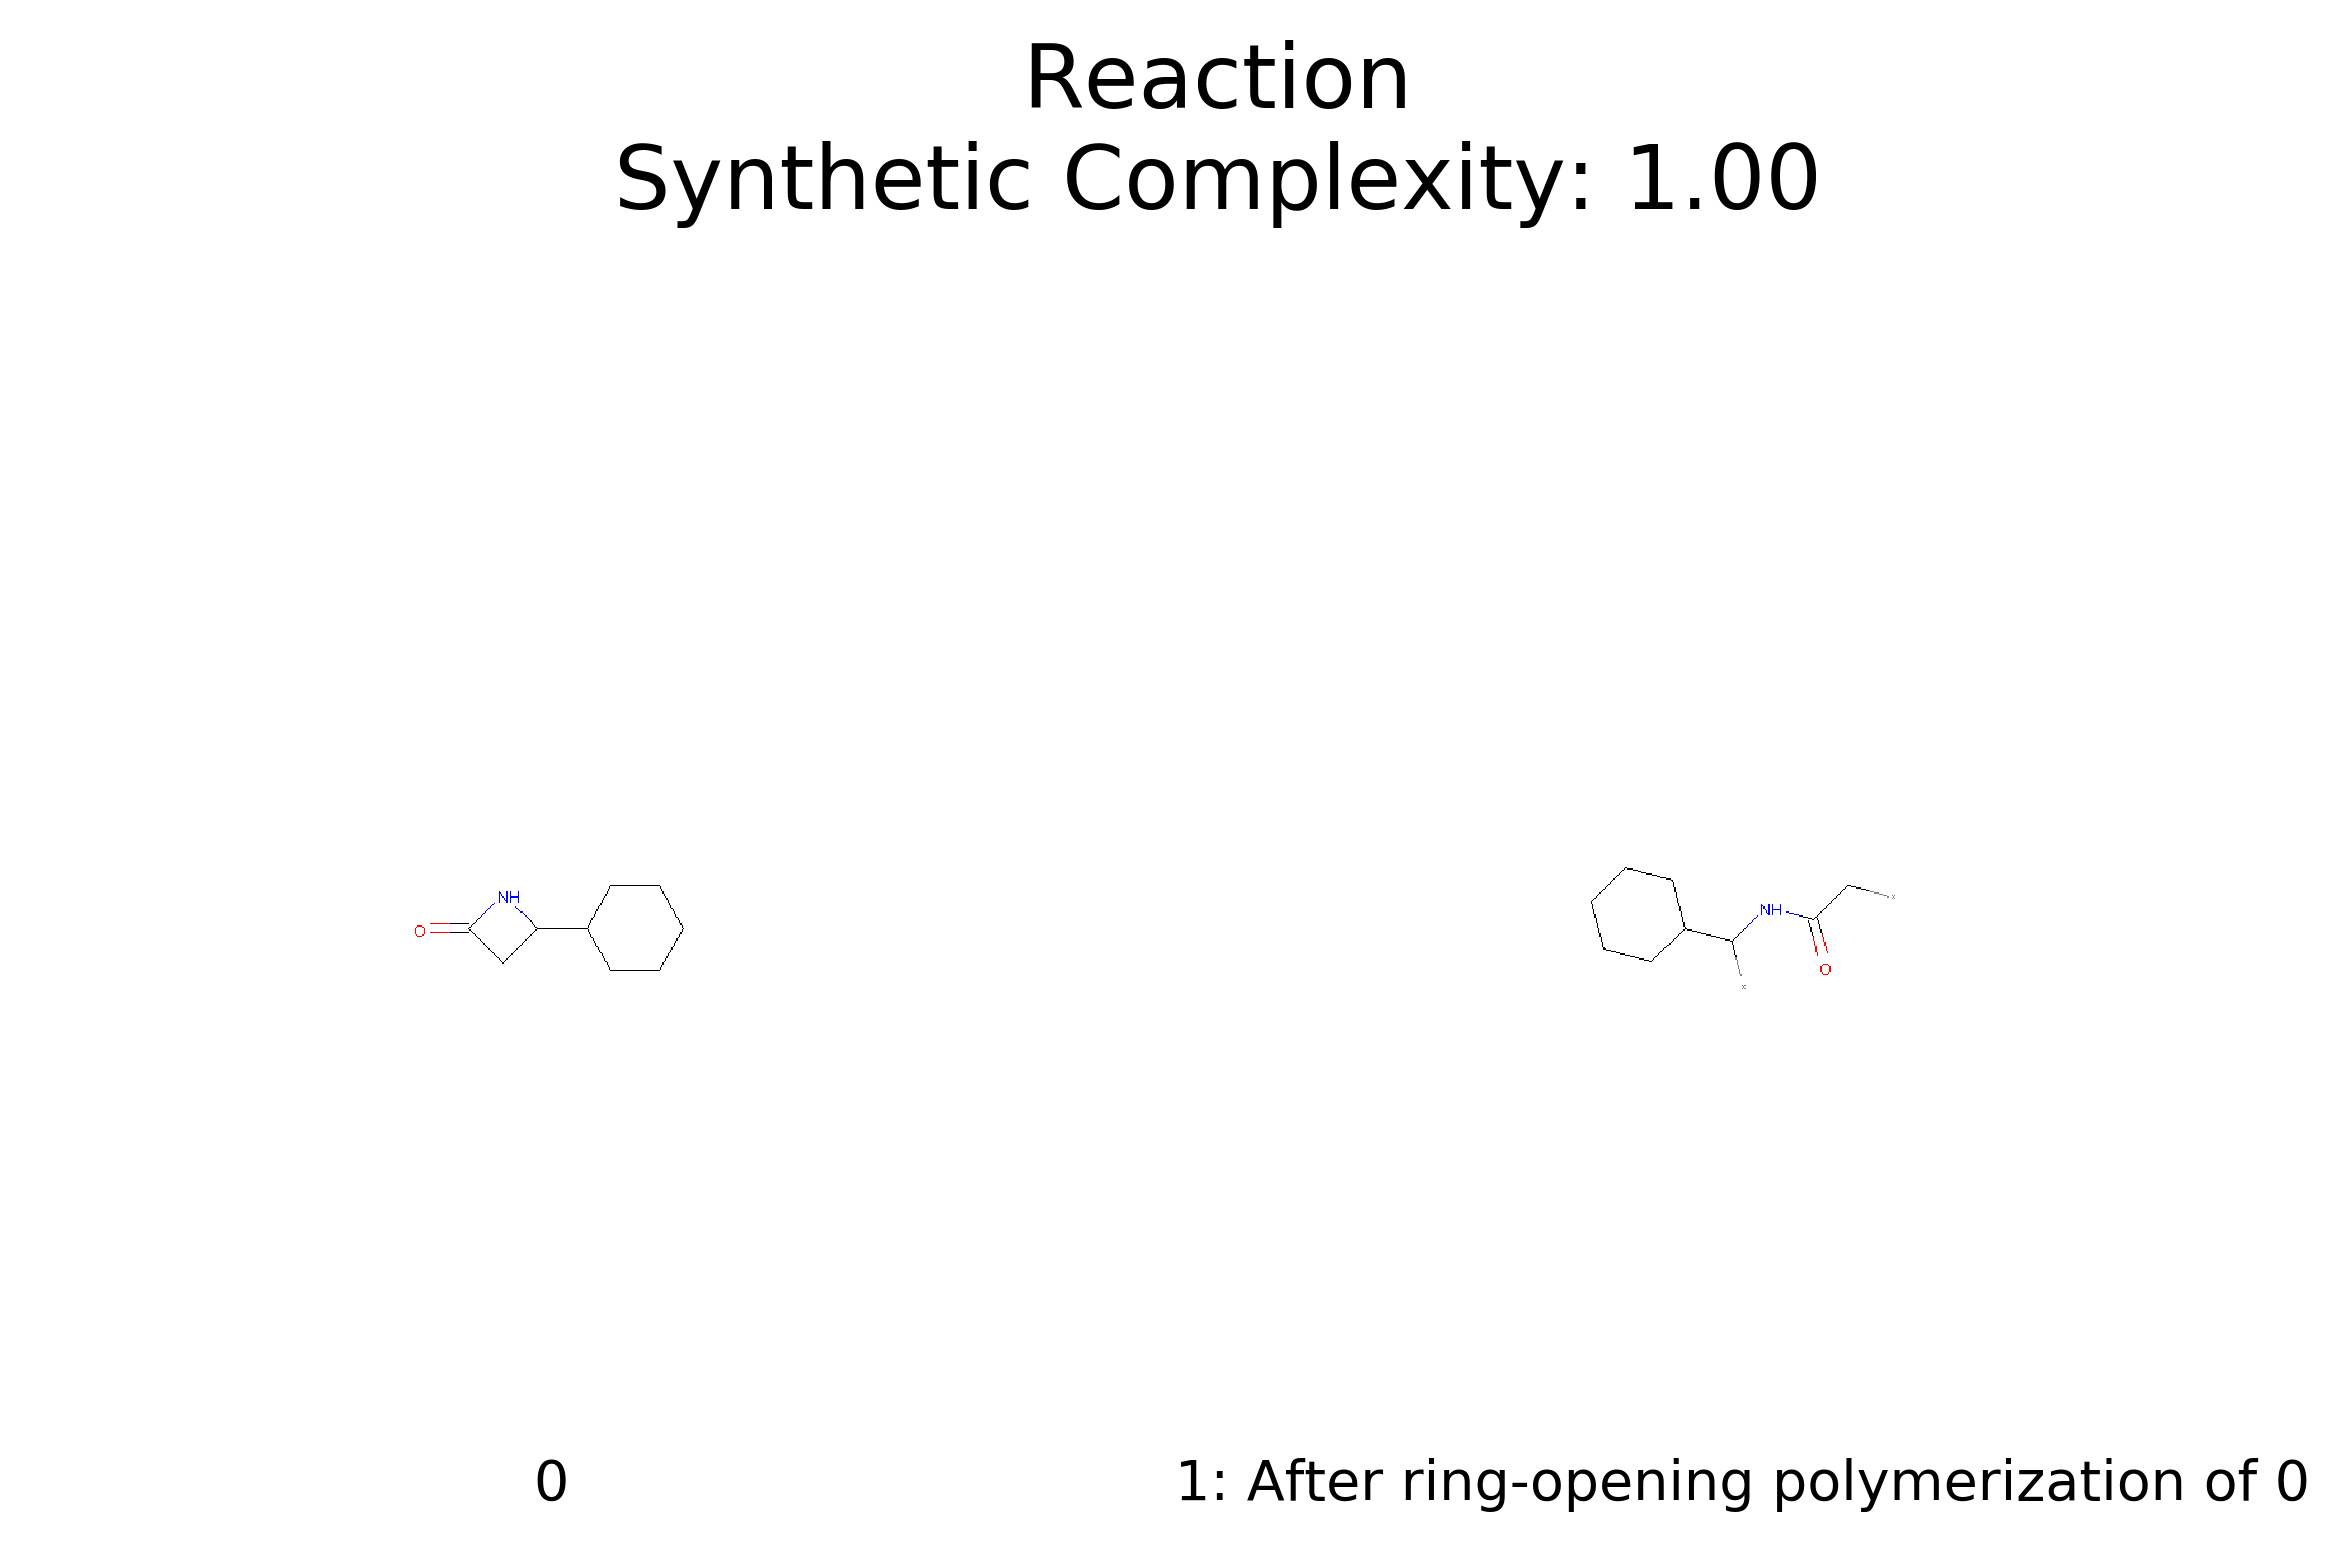

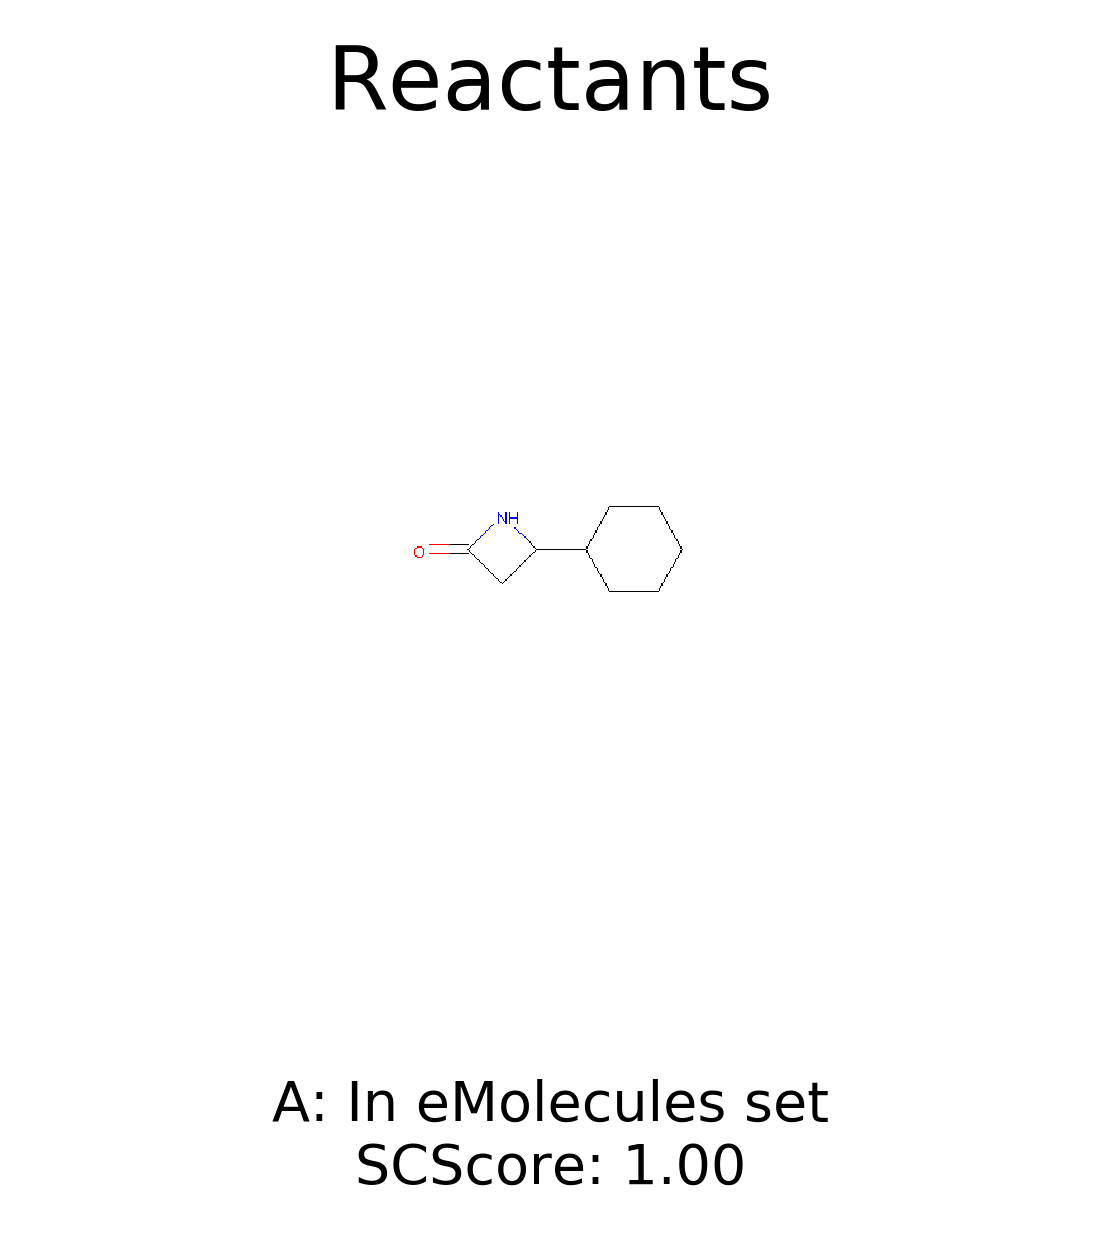

In [50]:
i=10
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

False


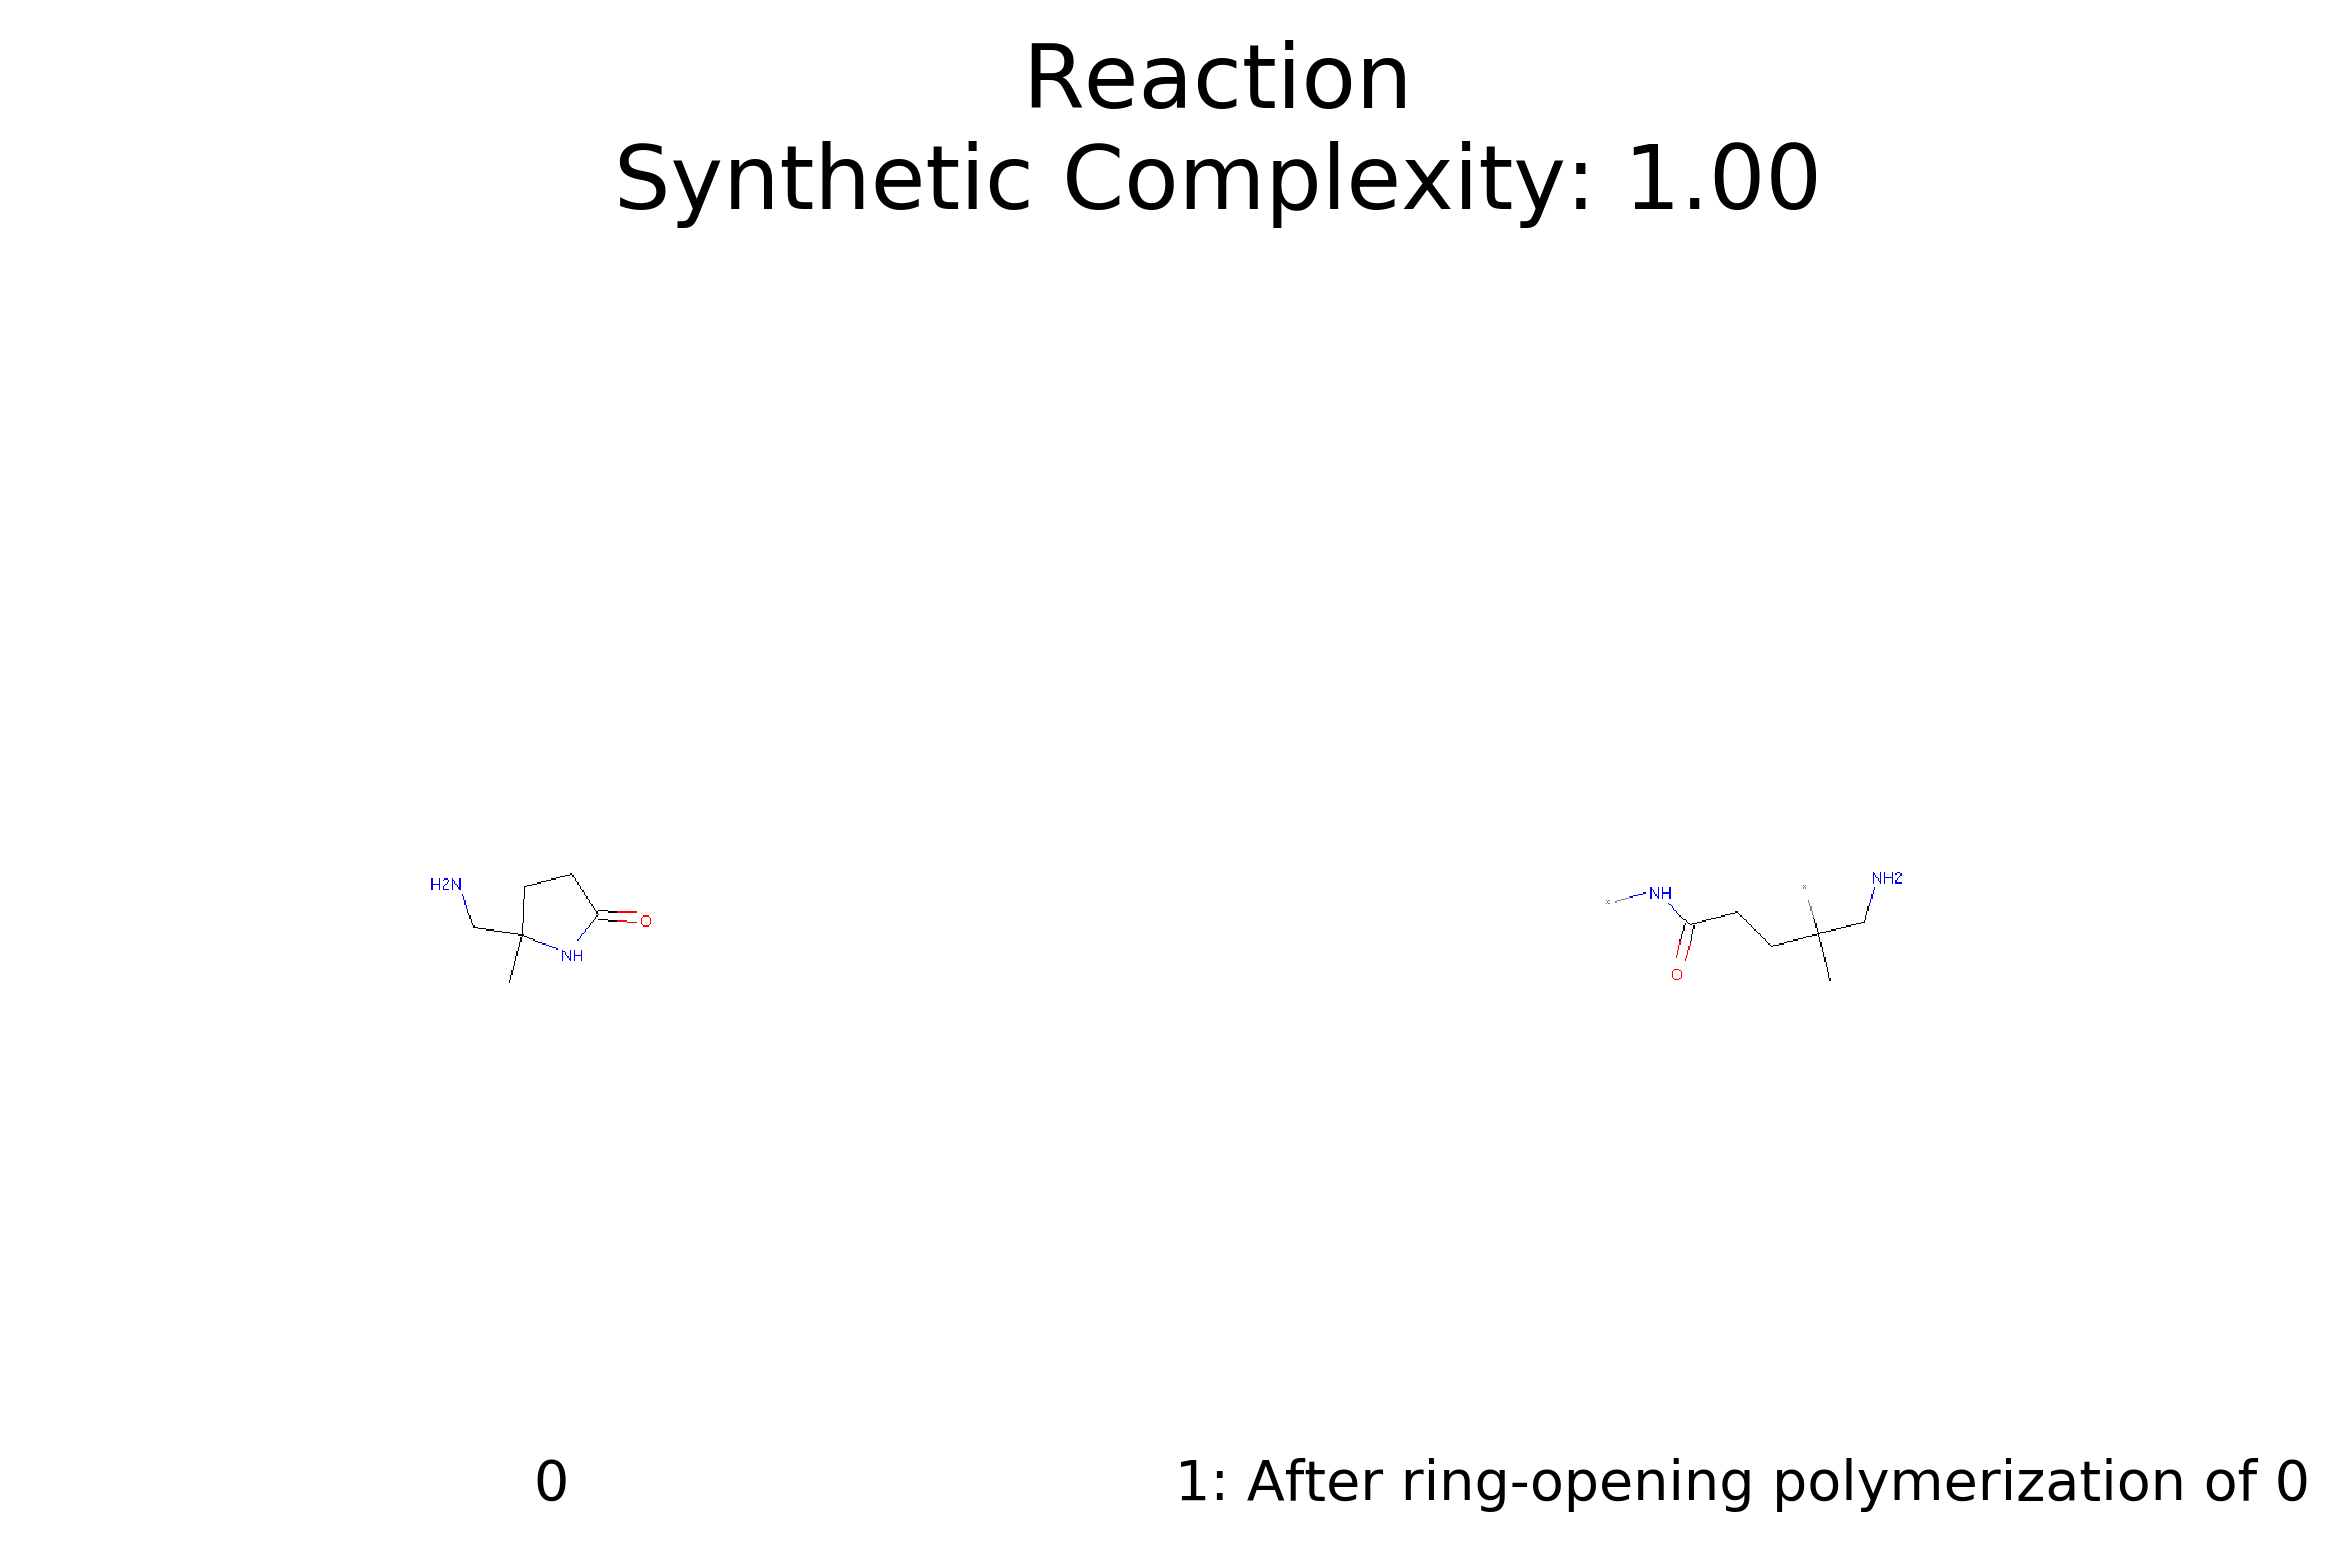

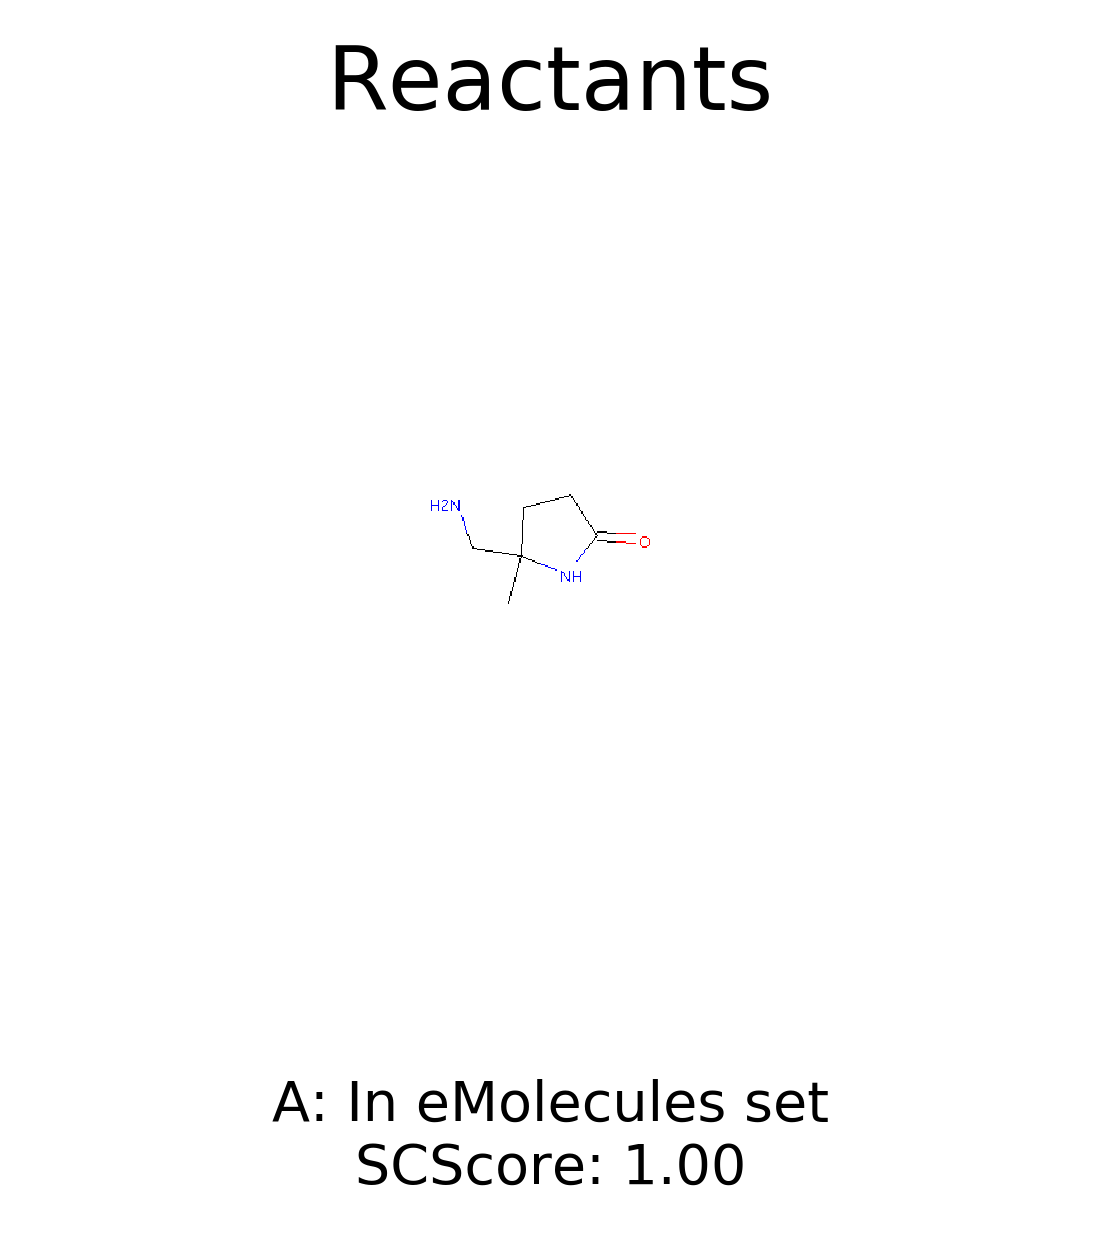

In [51]:
i=11
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

False


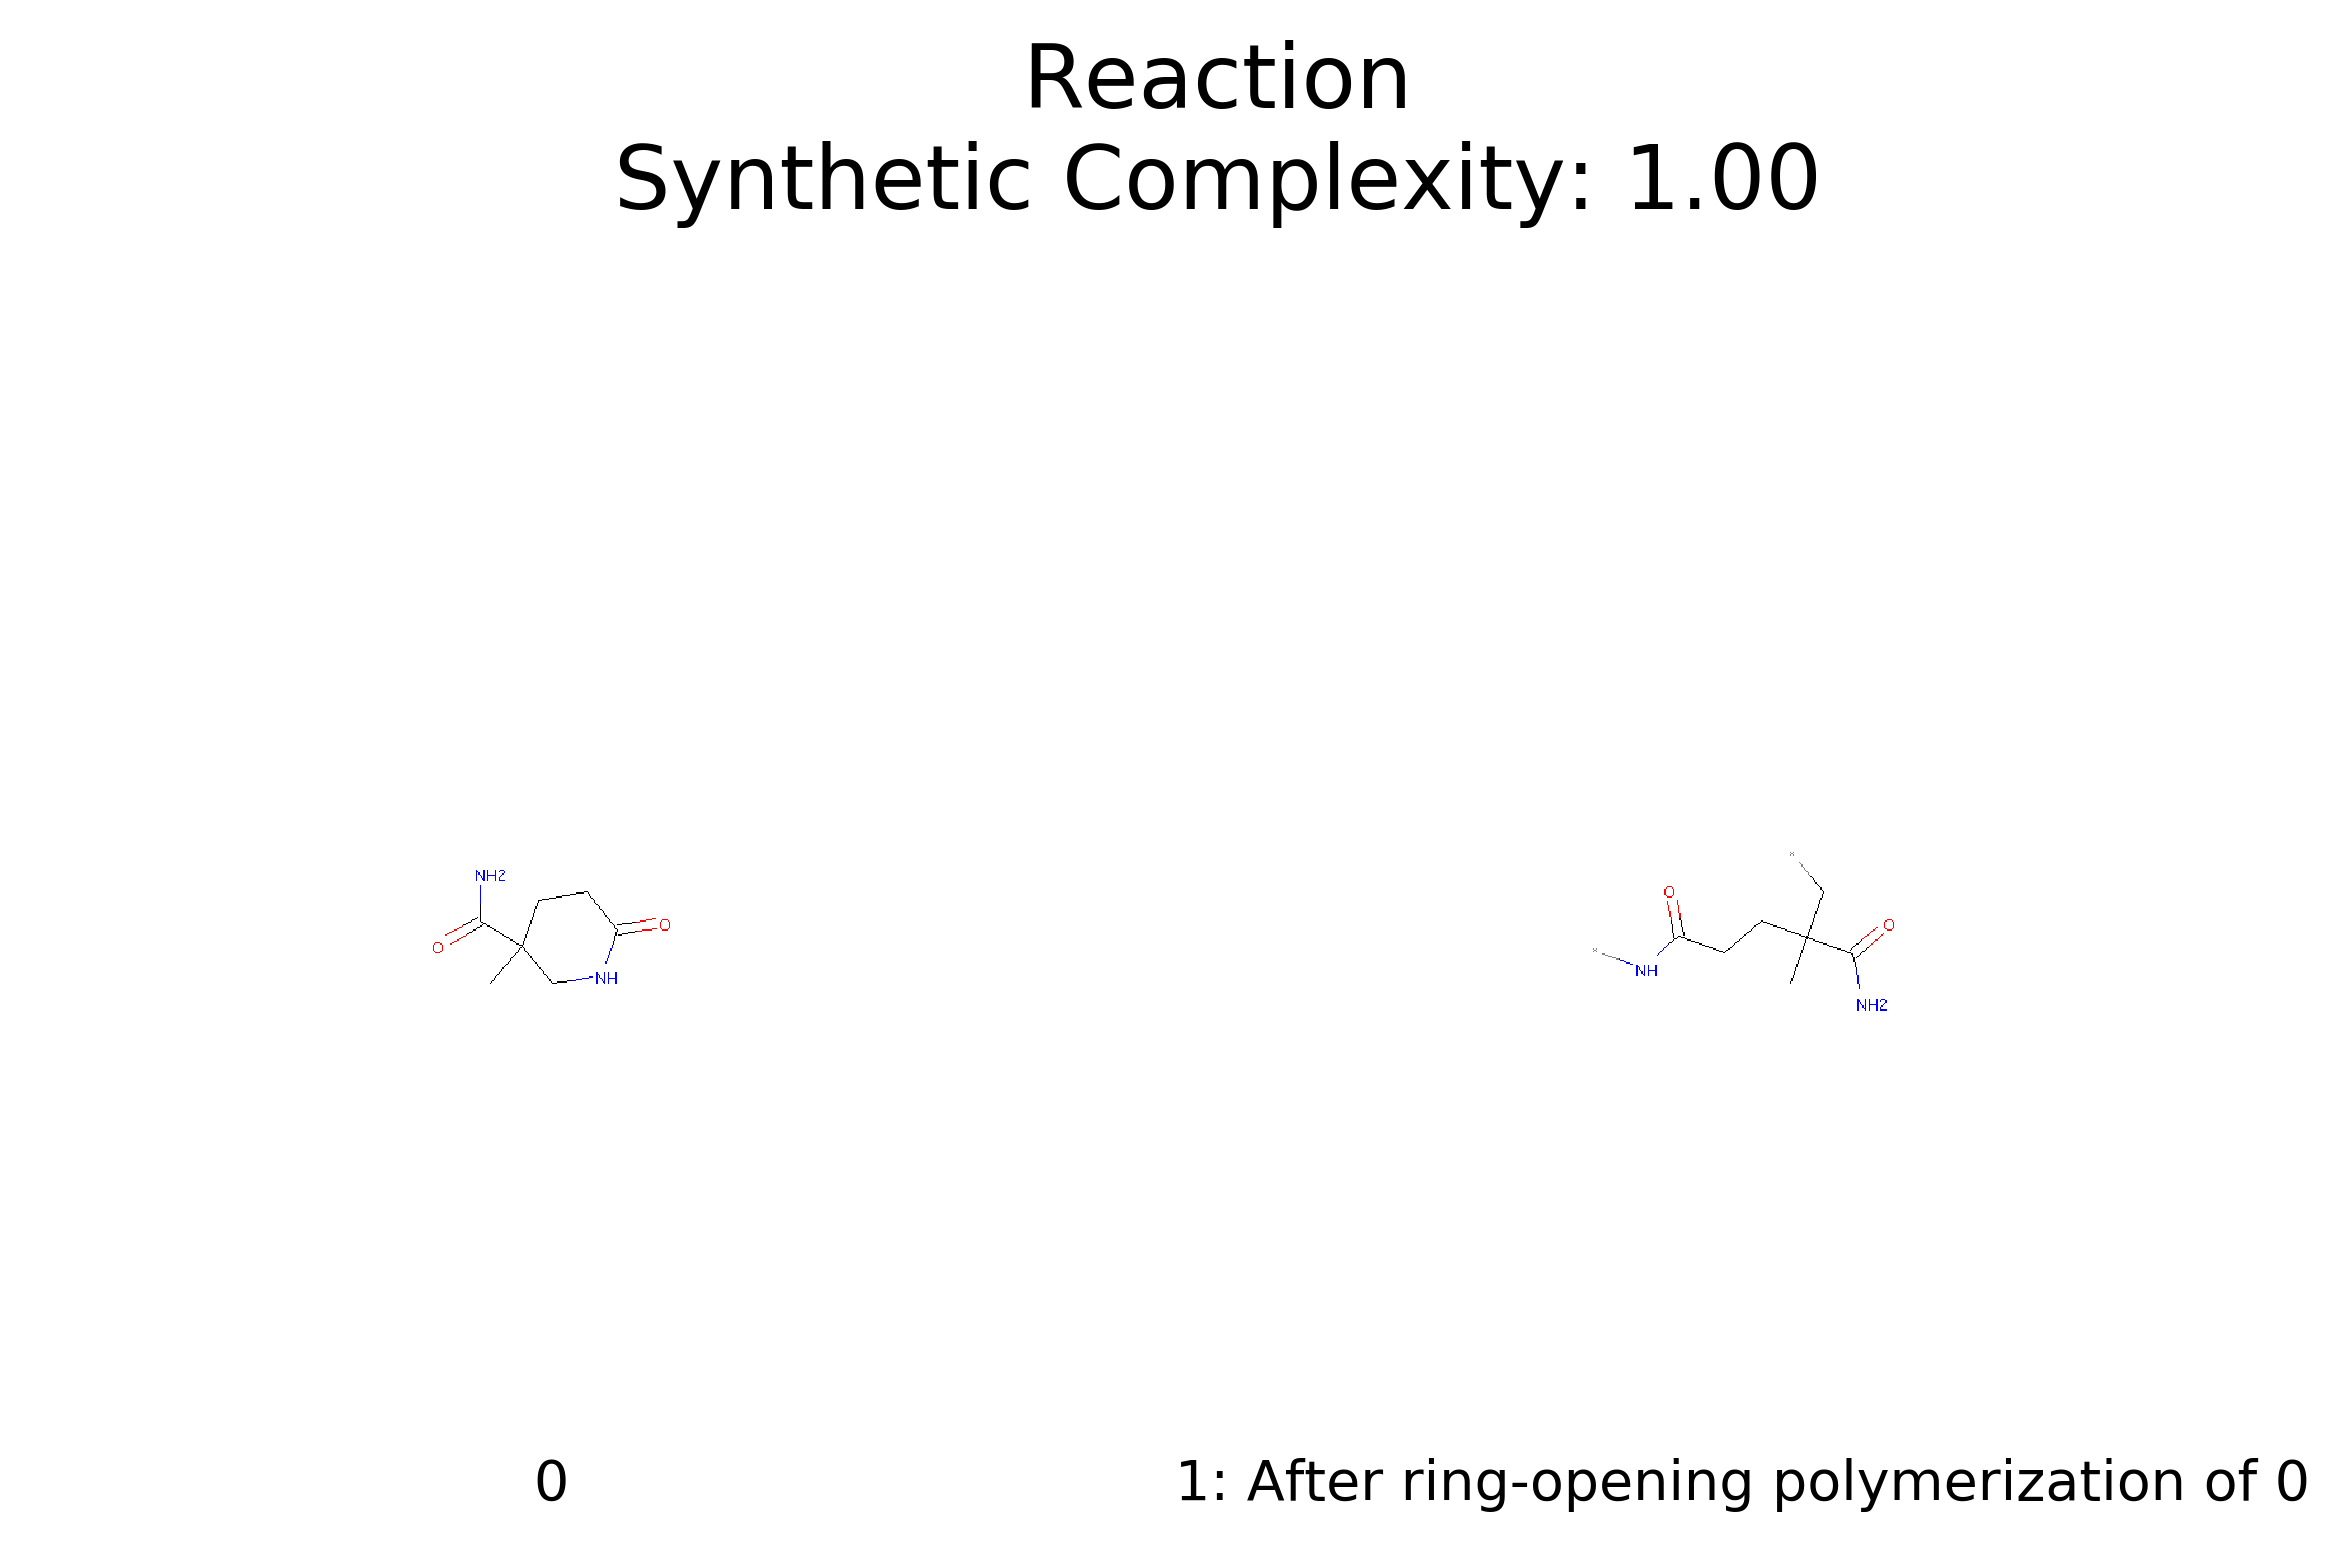

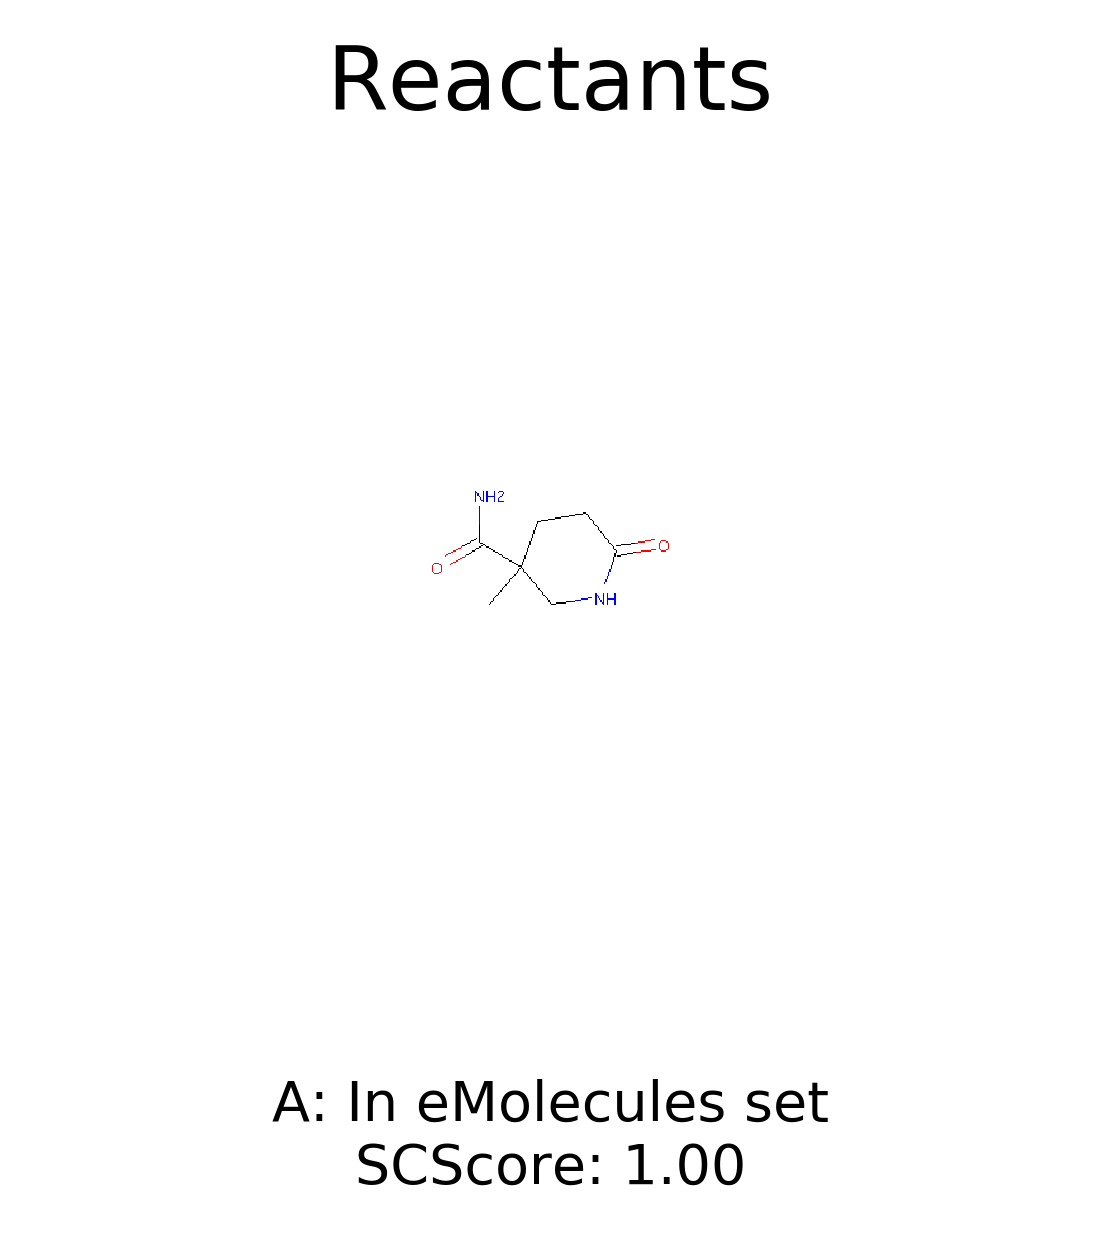

In [52]:
i=12
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

True


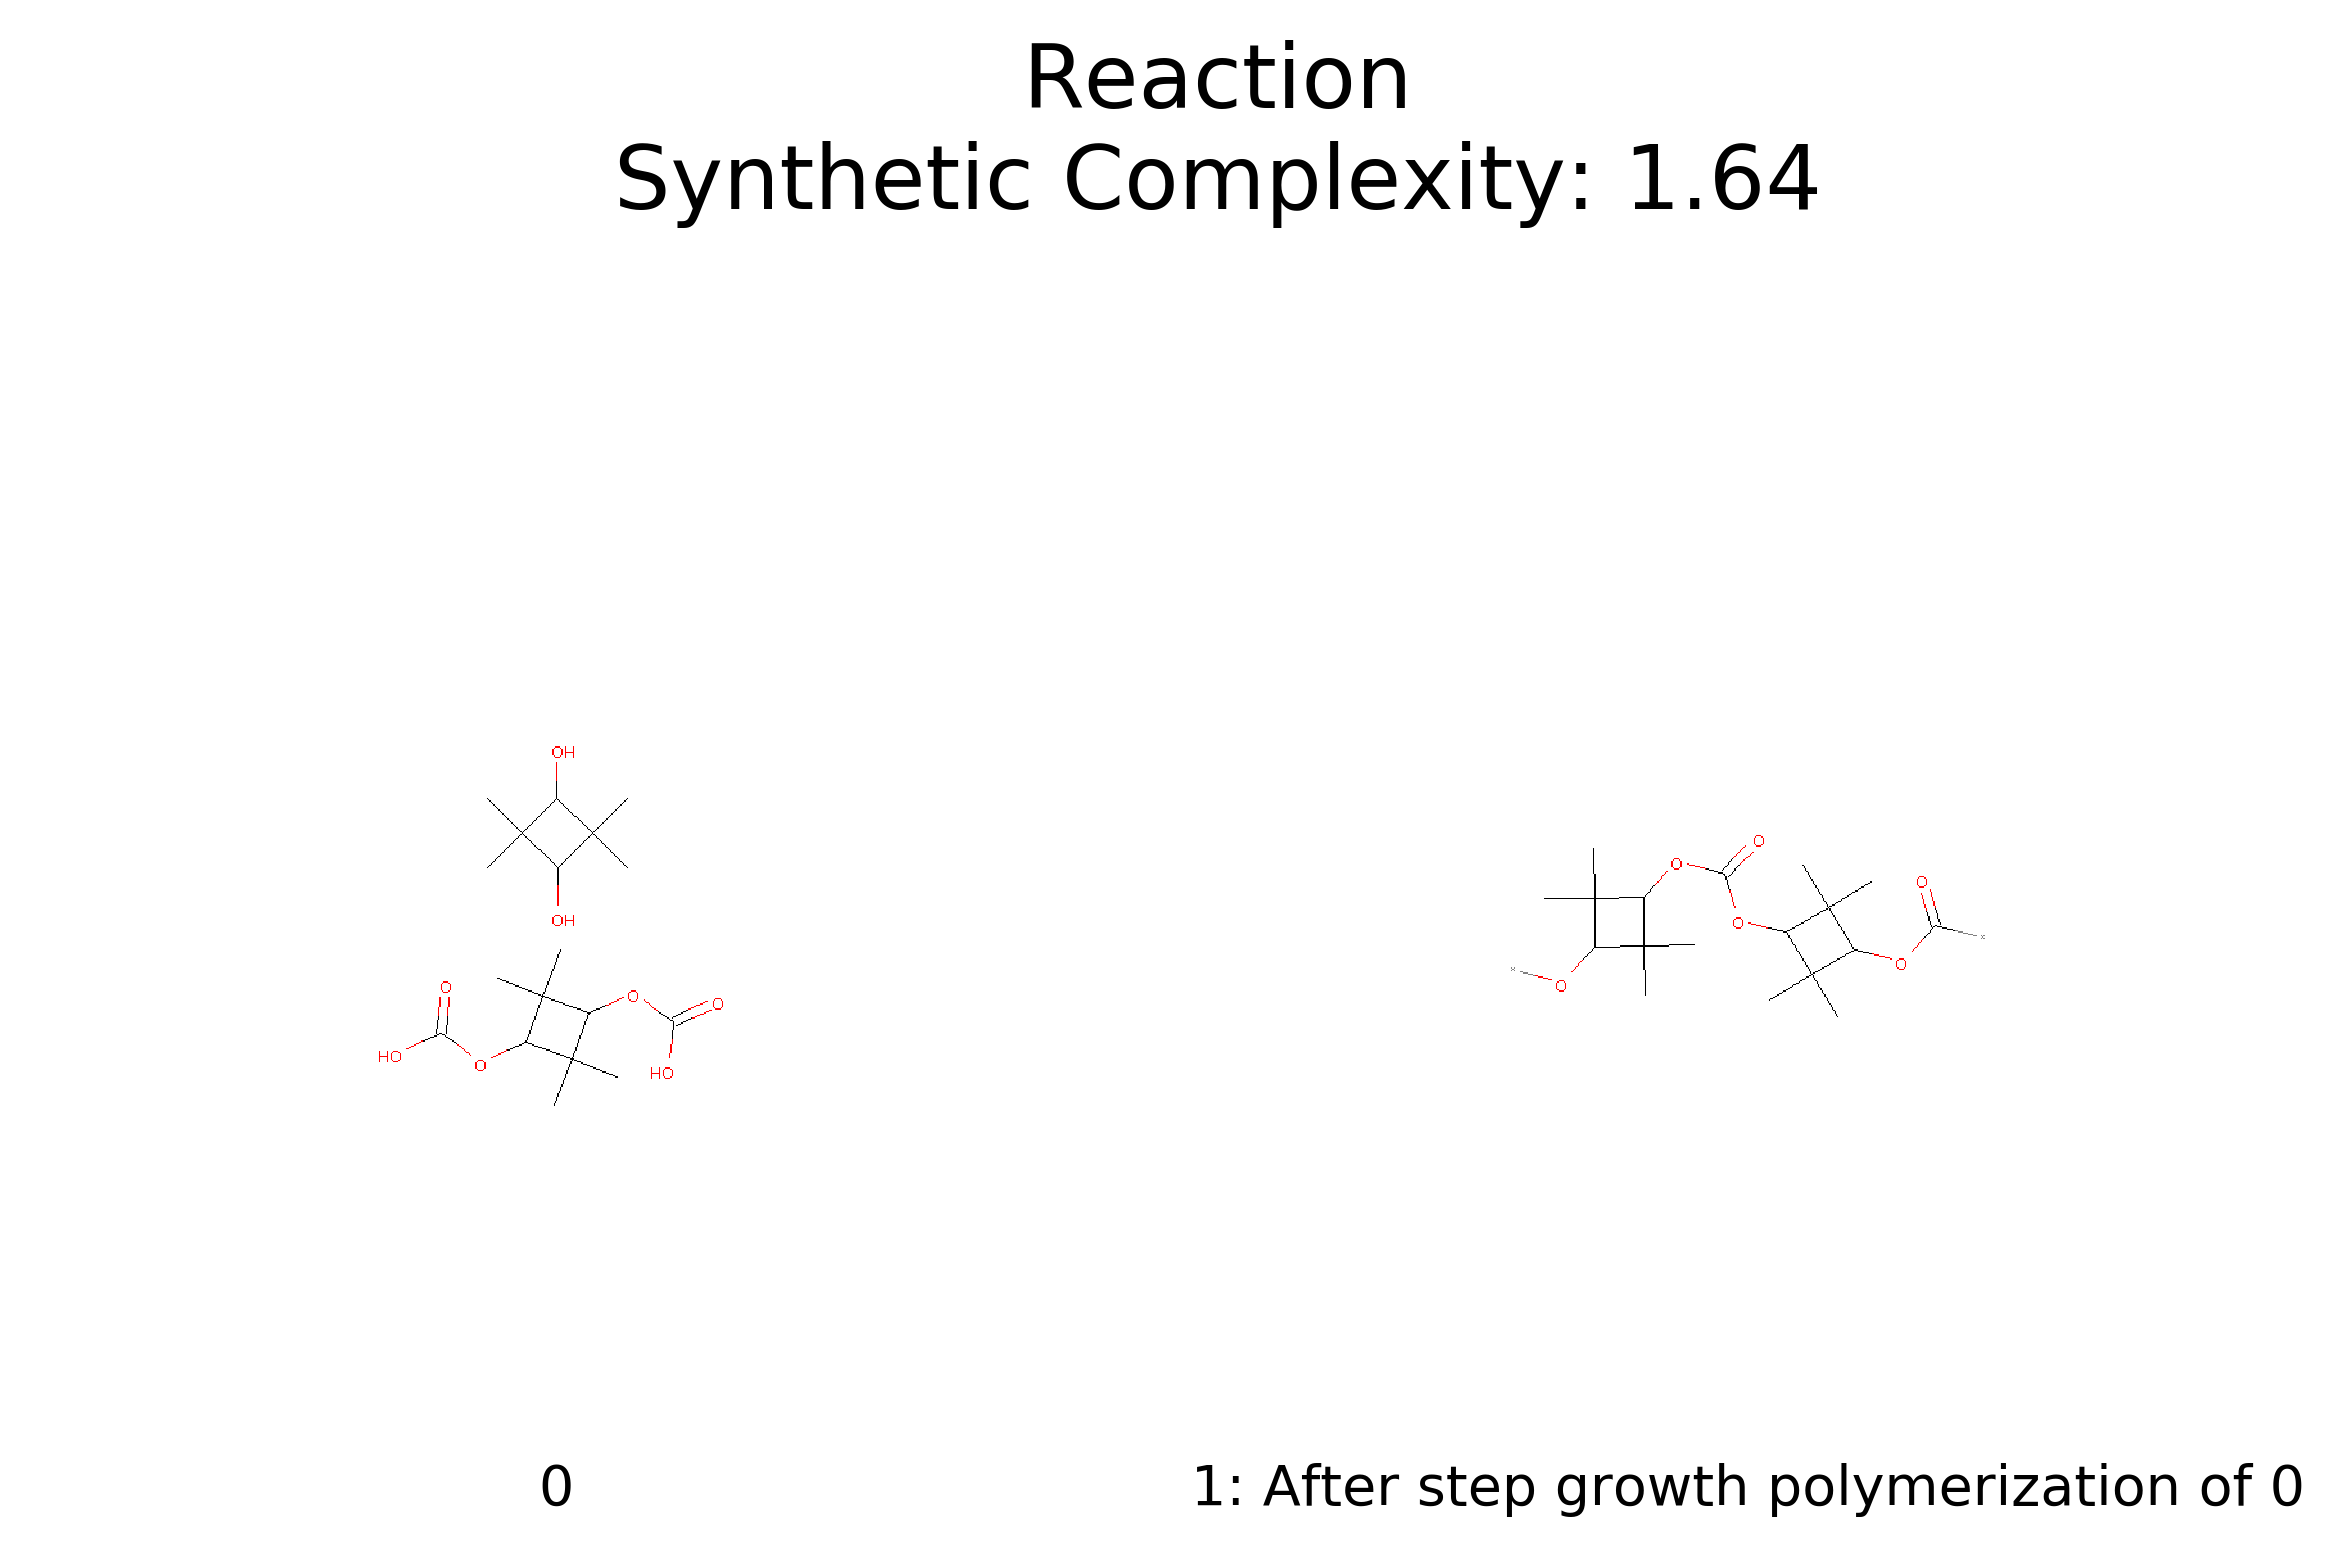

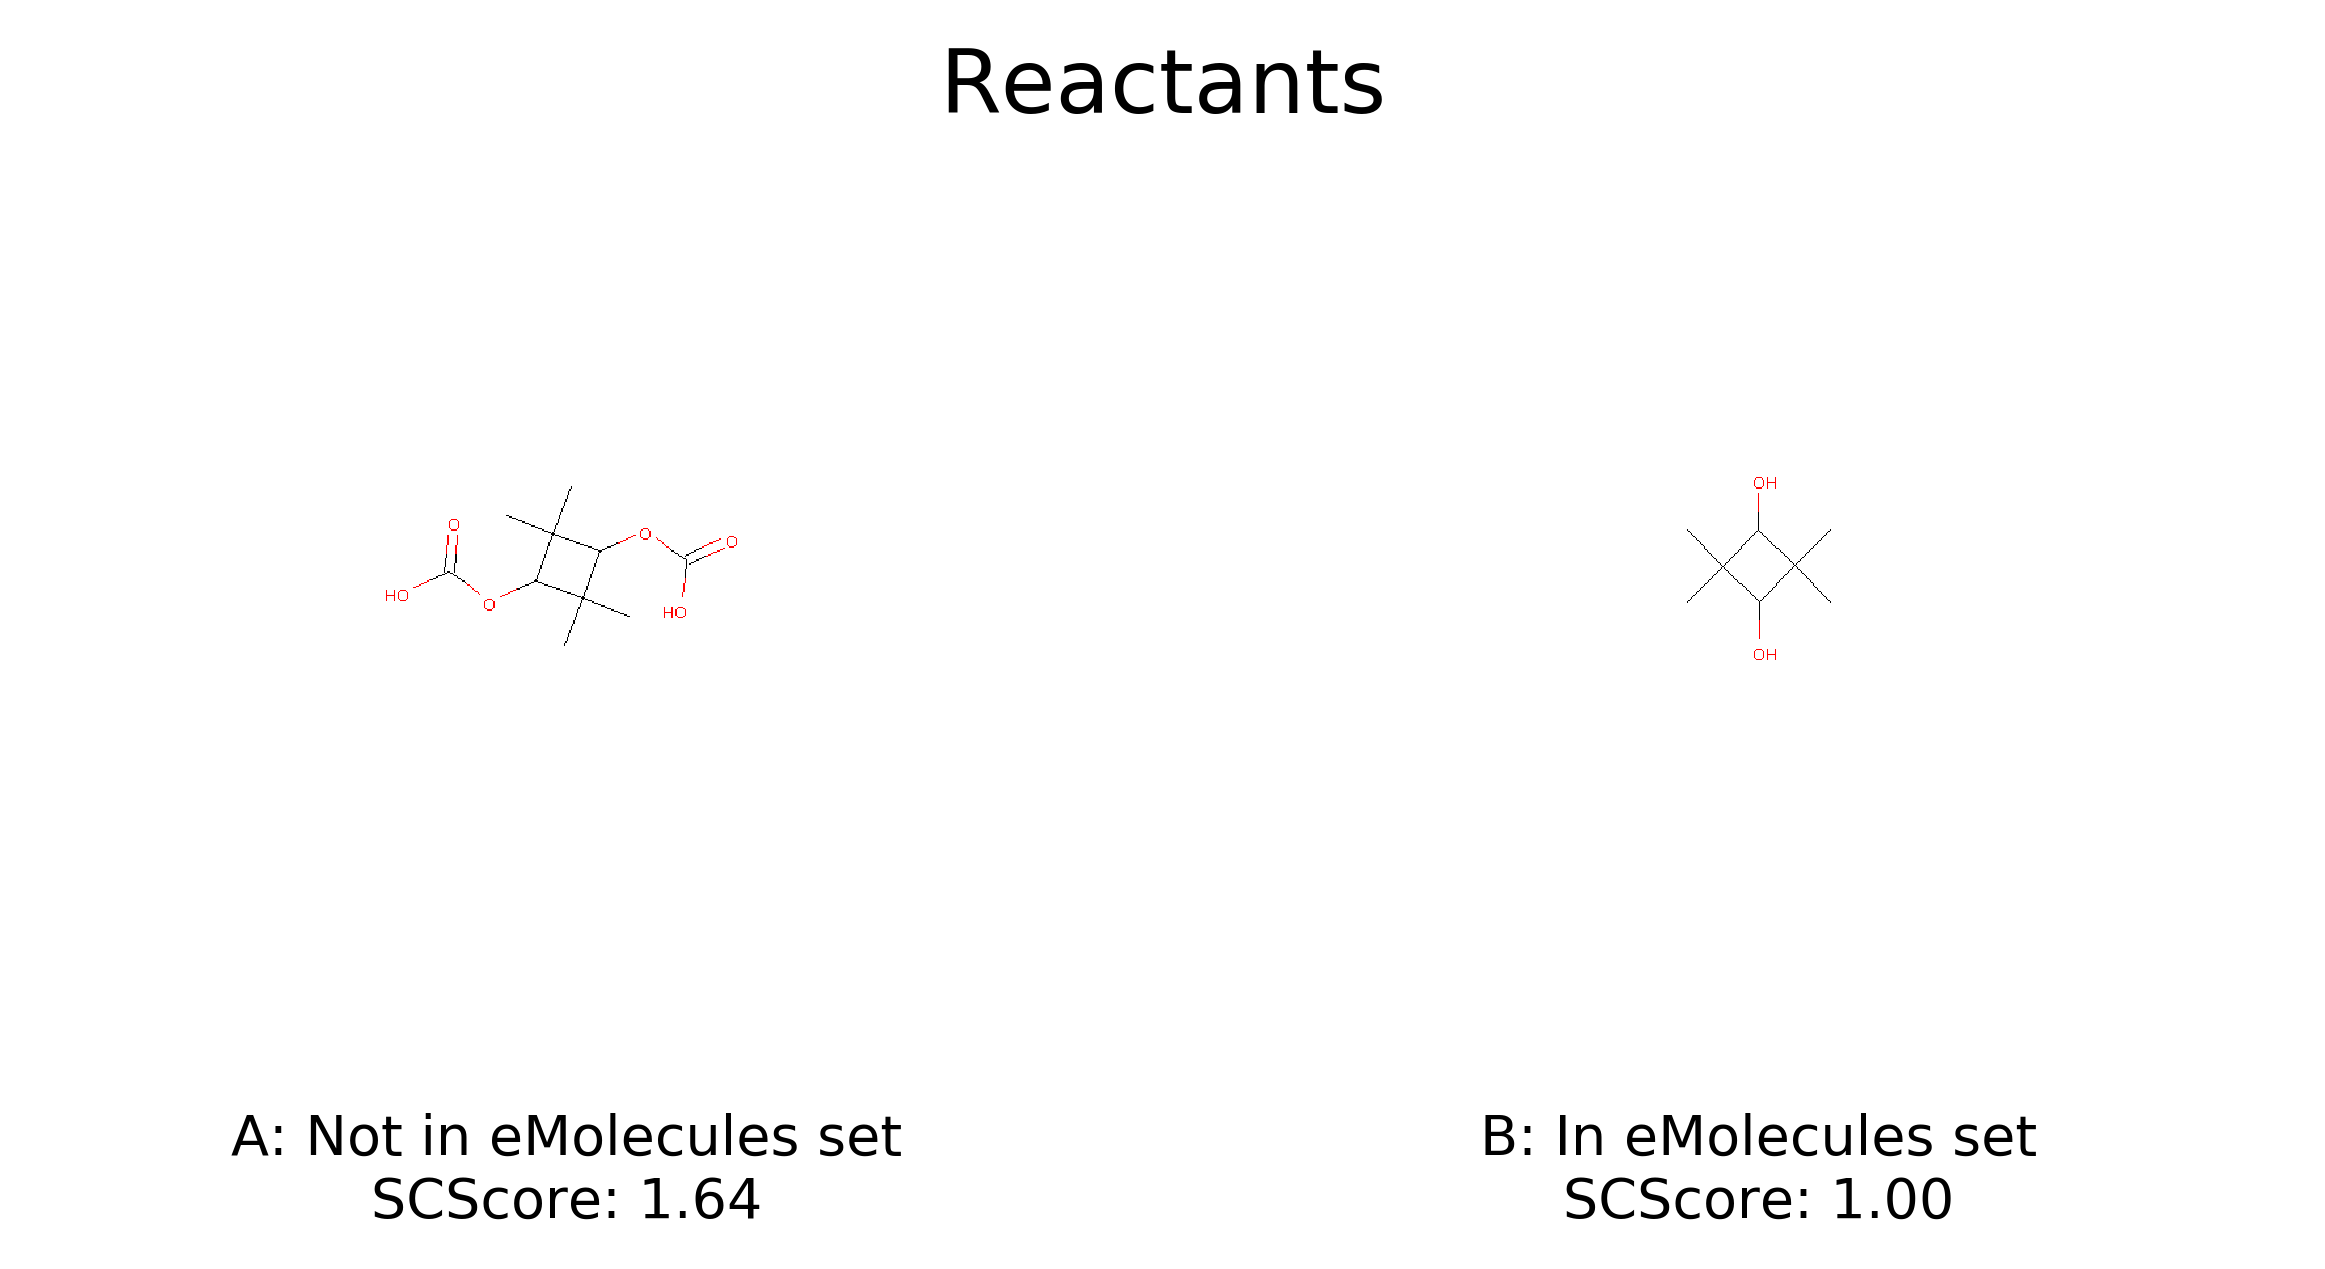

In [53]:
i=13
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

True


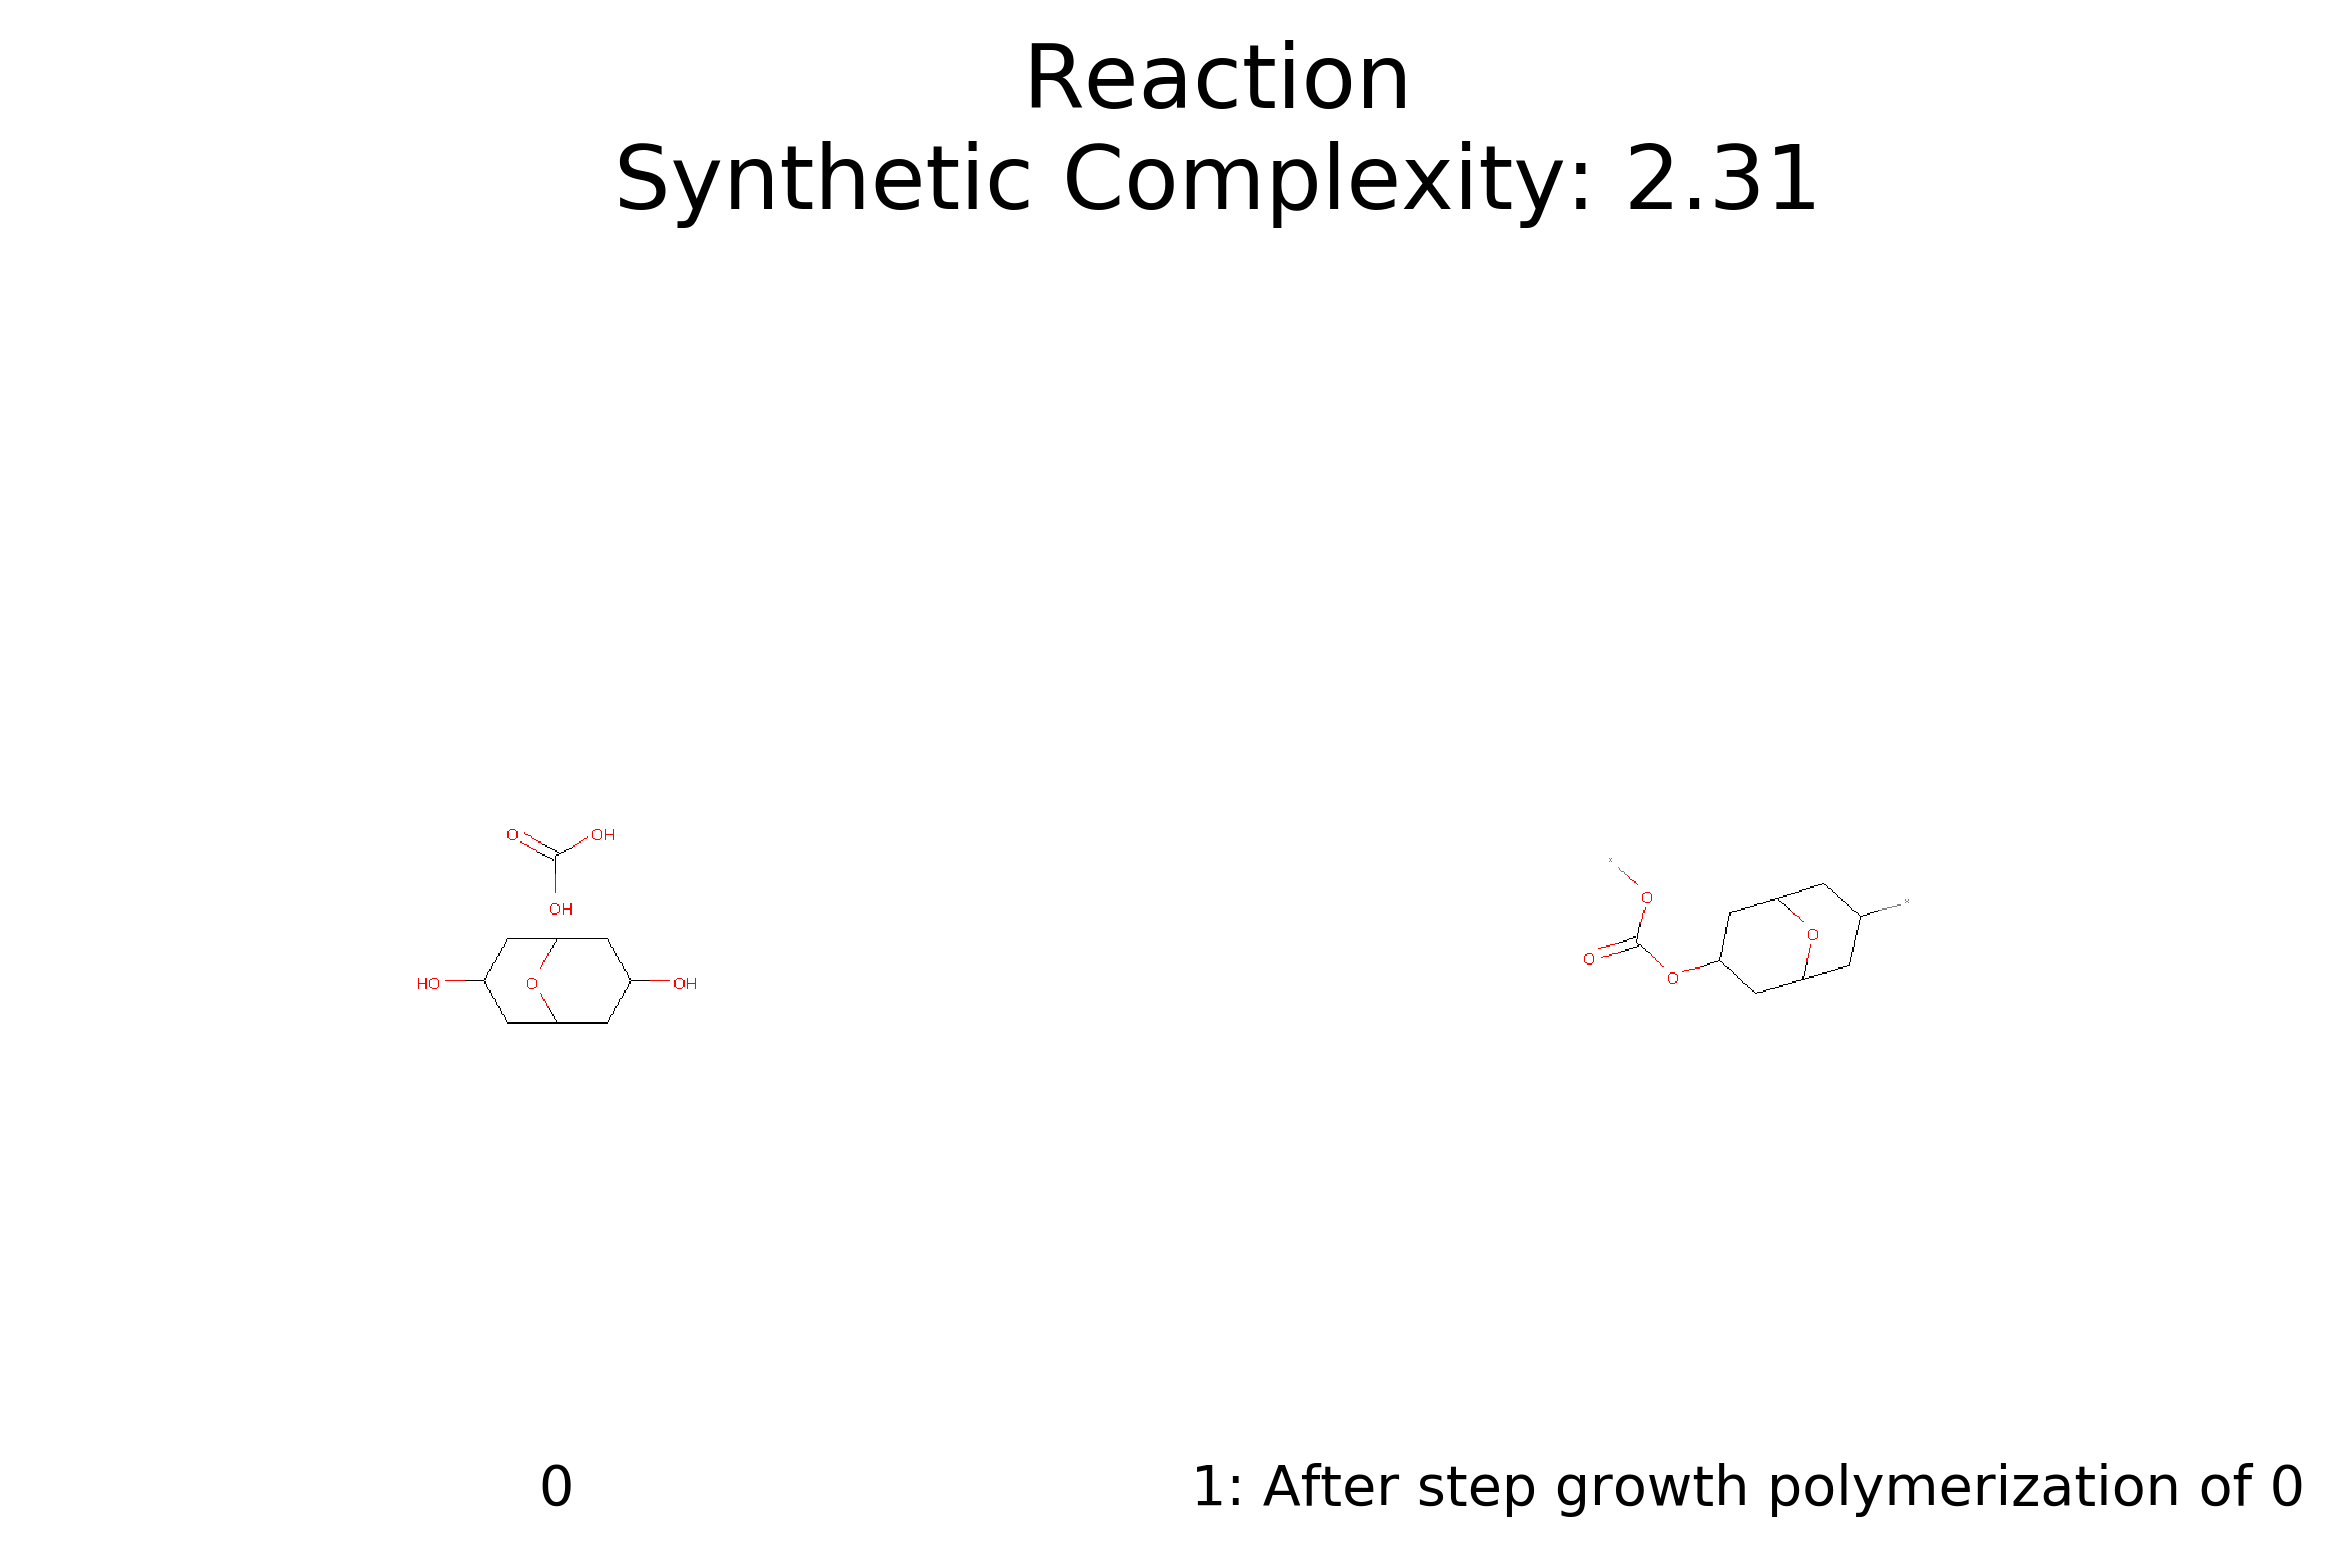

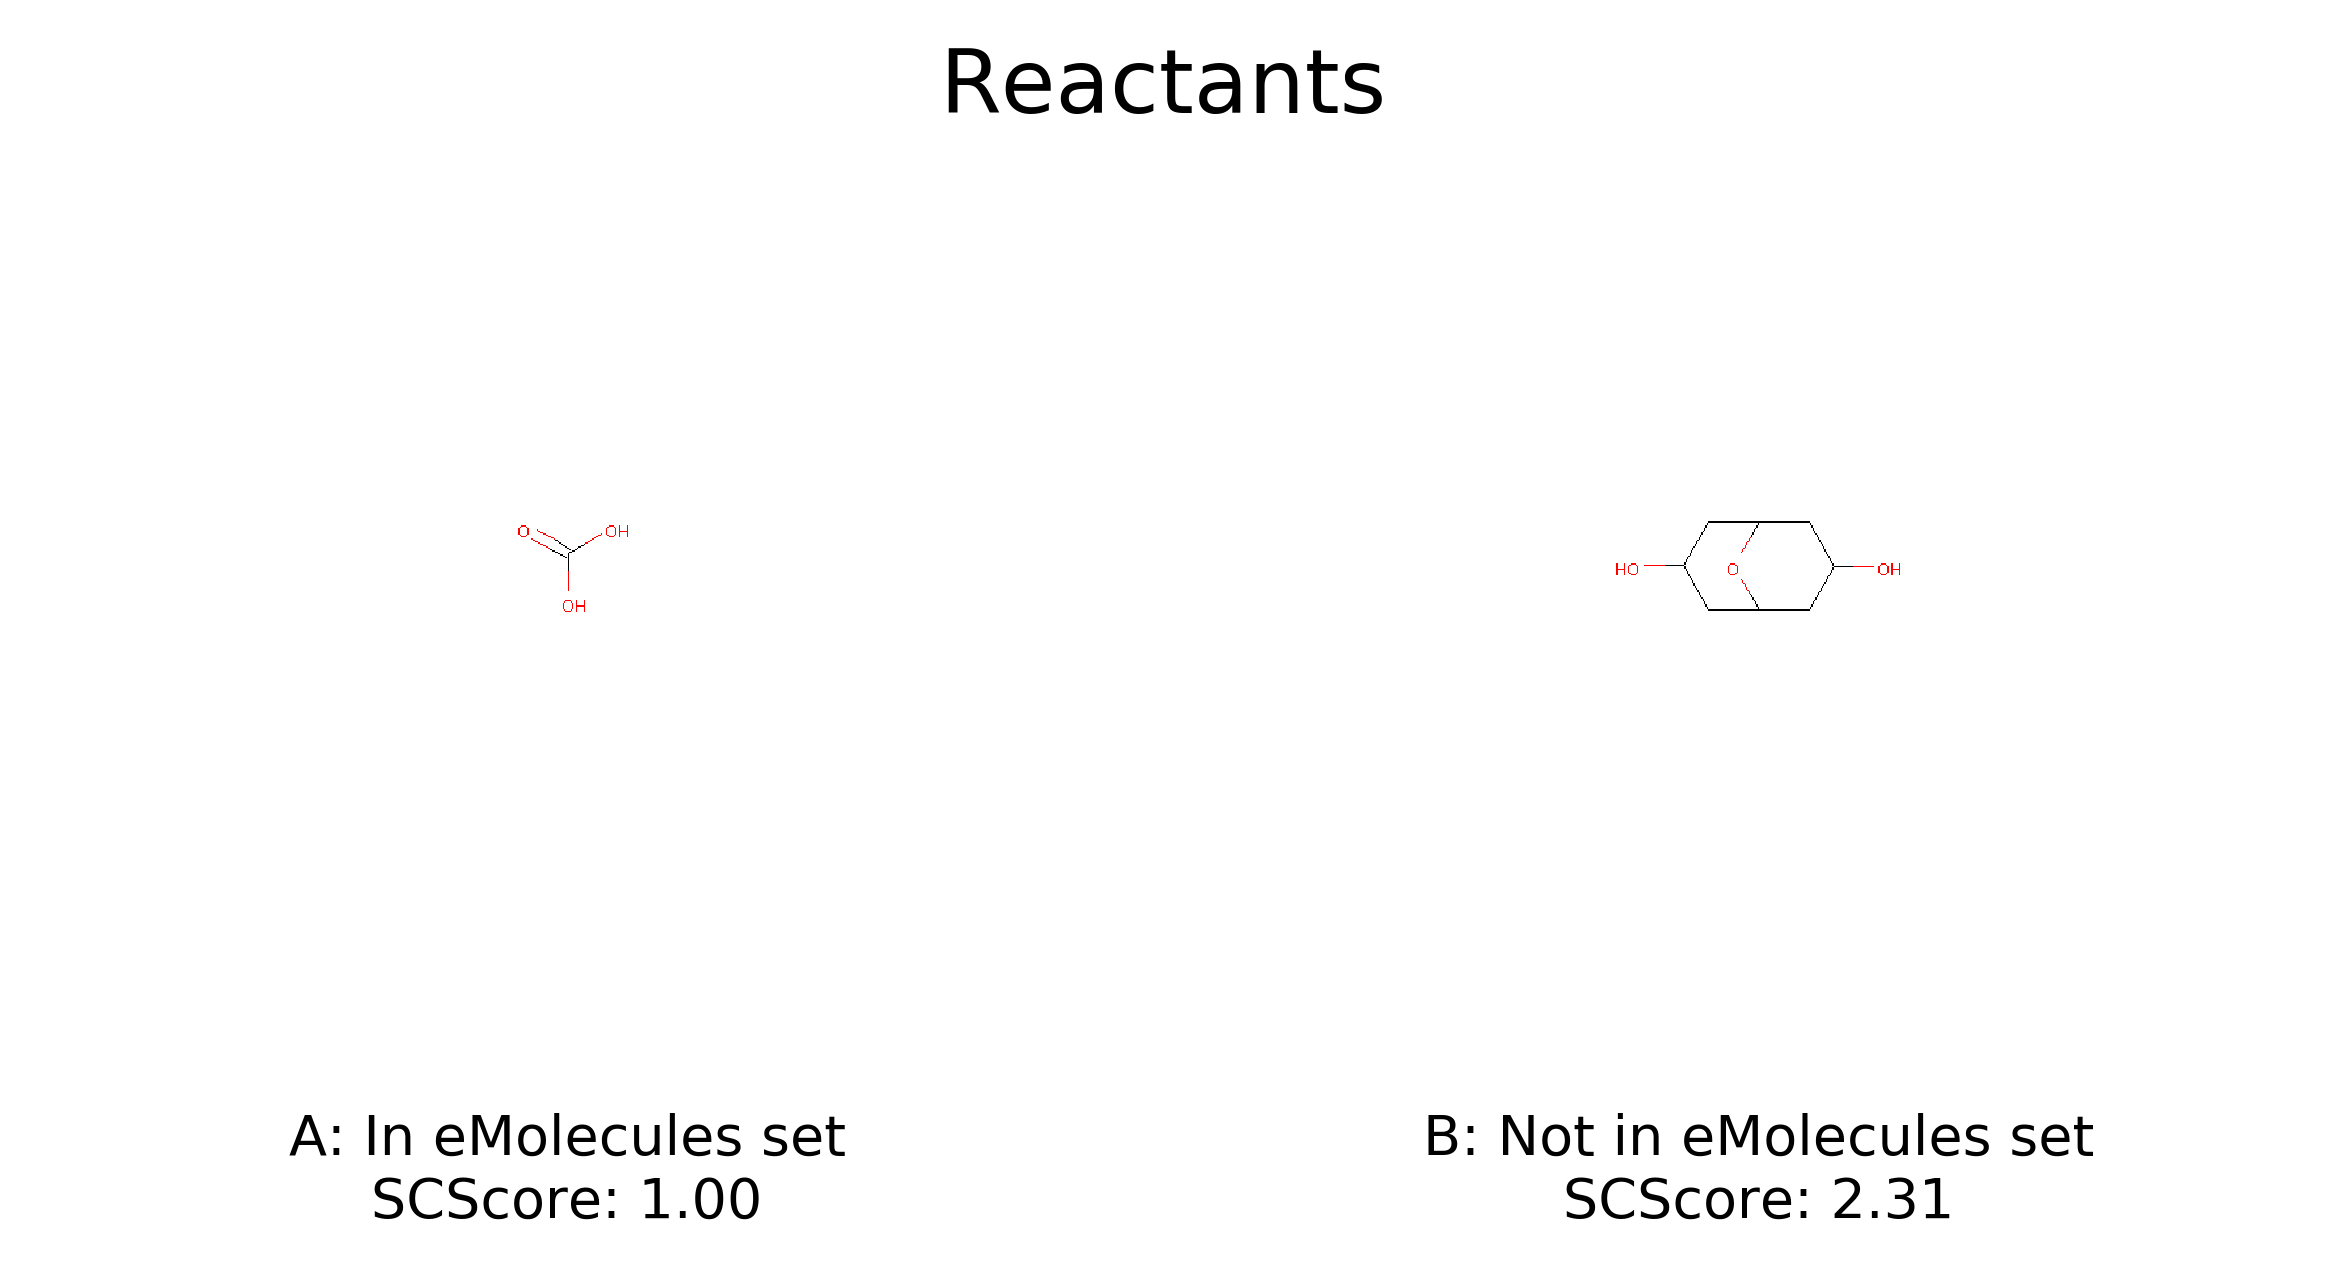

In [84]:
i=29
print( retro.search_polymer( rxns_srt[i].product_smiles, pol_set) )
rxns_srt[i].DrawStep()
rxns_srt[i].DrawCatalog()

In [ ]:
Chem.Saniti

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


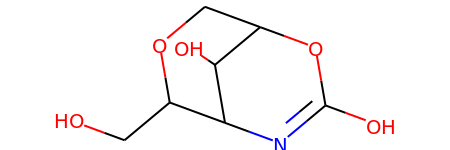

In [72]:
importlib.reload(retro)
retro.ro_depolymerize(rxns_srt[i].product_smiles,'ncie')[0]

In [ ]:
i=28
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=29
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=30
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=31
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=32
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=33
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=34
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=35
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=36
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=37
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=38
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=39
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
i=40
print( retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set) )
filtered_rs_ls_srt_no_dup[i].DrawStep()
filtered_rs_ls_srt_no_dup[i].DrawCatalog()

In [ ]:
for i in range(len(filtered_rs_ls_srt_no_dup)):
    if retro.search_polymer( filtered_rs_ls_srt_no_dup[i].product_smiles, pol_set):
        print(i, filtered_rs_ls_srt_no_dup[i].product_smiles)

In [ ]:
Chem.MolFromSmiles('[*]OC1C(C)(C)C(OC(=O)OC2C(C)(C)C(OC([*])=O)C2(C)C)C1(C)C')

# Test lookup w/ frp on G2G-relaxed polymers

In [ ]:
rxn_fn = retro.frp_depolymerize

In [ ]:
importlib.reload(retro)
ReactionStepList = []
rxn_fn = retro.frp_depolymerize
for x in smiles_ls:
    mol = Chem.MolFromSmiles(x)
    monomers = rxn_fn(mol)
    if monomers != None:
        for monomer in monomers:
            rs = retro.ReactionStep(monomer,mol,rxn_fn)
            ReactionStepList.append(rs)

In [ ]:
len(ReactionStepList)

In [ ]:
with open('/data/rgur/retrosynthesis/molecule_lookup/mol_set.pkl','rb') as f:
    mol_set = pickle.load(f)

In [ ]:
ReactionStepList = [retro.ReactionStep(x.reactant_mol,x.product_mol,rxn_fn) for x in ReactionStepList]
for x in ReactionStepList:
    x.SearchReactants(mol_set)
    x.SyntheticScore()

In [ ]:
filtered_rs_ls_srt_no_dup = sorted(ReactionStepList,key=lambda x: np.mean(x.synthetic_scores),reverse=False)

In [ ]:
i=0
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
i=1
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
i=2
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
i=3
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
i=4
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
i=5
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
i=6
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

In [ ]:
i=19
print(filtered_rs_ls_srt_no_dup[i].synthetic_scores)
filtered_rs_ls_srt_no_dup[i].DrawStep()

# Find spiro centers

In [ ]:
mol = Chem.MolFromSmiles('C1CC5(C1)CCC(C4CCC3(CC2CCC2CO3)C4)C5')
mol

In [ ]:
ru.mol_with_atom_index(mol)

In [ ]:
ri = mol.GetRingInfo()

In [ ]:
ri.AtomRings()

In [ ]:
ar_sets = [set(ring) for ring in ri.AtomRings()]
ar_sets

In [ ]:
n_spiro = 0
for i,ring in enumerate(ar_sets):
    for j,other_ring in enumerate(ar_sets):
        if i>j:
            if len(ring.intersection(other_ring)) == 1:
                n_spiro += 1

In [ ]:
n_spiro

In [ ]:
importlib.reload(ru)

In [ ]:
ru.n_spiro(mol) #should be 2

# Polyamide sg

In [ ]:
linkage = '*[NH]C(=O)*'

In [ ]:
Chem.MolFromSmarts(linkage)

In [ ]:
g1 = Chem.MolFromSmarts('C(=O)[OH]')
g1

In [ ]:
mol = Chem.MolFromSmiles('NCCC(=O)O')
ru.mol_with_atom_index(mol)

In [ ]:
mol.GetSubstructMatches(g1) 

In [ ]:
g2 = Chem.MolFromSmarts('[NH2]')
g2

In [ ]:
mol.GetSubstructMatches(g2)

In [ ]:
polymer = Chem.MolFromSmiles('[*]CCCCNC(=O)CCCCC(=O)N[*]')
polymer

In [ ]:
import itertools
lp = ru.LinearPol(polymer)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print('None')
    #return None
if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
    print('None')
    #return None
matches=pm.GetSubstructMatches(Chem.MolFromSmarts(linkage))
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
match_pairs

In [ ]:
match_pair = match_pairs[0]
match_pair

In [ ]:
linkage

In [ ]:
a_ir1,a_in,a_ic,a_io,a_ir2 = match_pair[0]
b_ir1,b_in,b_ic,b_io,b_ir2 = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(a_ic,a_in)
em.RemoveBond(b_ic,b_in)
o1 = em.AddAtom(Chem.AtomFromSmiles('O'))
o2 = em.AddAtom(Chem.AtomFromSmiles('O'))
em.AddBond(o1,a_ic,Chem.BondType.SINGLE)
em.AddBond(o2,b_ic,Chem.BondType.SINGLE)
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

# Test polyamide sg

In [ ]:
importlib.reload(retro)

In [ ]:
linkage

In [ ]:
retro.sg_depolymerize(polymer,Chem.MolFromSmarts(linkage),retro.sg_rxns[linkage][0])[0]

# sg polyurea

In [ ]:
linkage_smarts = '*[NH]C(=O)[NH]*'
polymer_linkage = Chem.MolFromSmarts(linkage_smarts)
polymer_linkage

In [ ]:
mol = Chem.MolFromSmiles('*NCNC(=O)Nc1cccc(NC(*)=O)c1')
mol

In [ ]:
g1,g2 = Chem.MolFromSmarts('[NH2]'),Chem.MolFromSmarts('N=C=O')
g2

In [ ]:
import itertools
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print(None)
    #return None
if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
    print(None)
    #return None
matches=pm.GetSubstructMatches(polymer_linkage)
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []
match_pairs

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
match_pair = match_pairs[0]
match_pair

In [ ]:
linkage_smarts

In [ ]:
a_ir1,a_inh,a_ic,a_io,a_in,a_ir = match_pair[0]
b_ir1,b_inh,b_ic,b_io,b_in,b_ir = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(a_inh,a_ic)
em.RemoveBond(b_inh,b_ic)
#switch bond
em.RemoveBond(a_in,a_ic)
em.AddBond(a_in,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_in,b_ic)
em.AddBond(b_in,b_ic,Chem.BondType.DOUBLE)
new_mol = em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(a_in,a_ic)
em.RemoveBond(b_in,b_ic)
#switch bond
em.RemoveBond(a_inh,a_ic)
em.AddBond(a_inh,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_inh,b_ic)
em.AddBond(b_inh,b_ic,Chem.BondType.DOUBLE)
new_mol = em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

# Test polyurea sg depolymerize on vanilla case

In [ ]:
linkage_smarts = '*[NH]C(=O)[NH]*'
polymer_linkage = Chem.MolFromSmarts(linkage_smarts)
mol = Chem.MolFromSmiles('*NCNC(=O)Nc1cccc(NC(*)=O)c1')
importlib.reload(retro)
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smarts][0])

In [ ]:
out[0]

In [ ]:
out[1]

# Make polyurea sg depolymerize on hard case

In [ ]:
mol = Chem.MolFromSmiles('[*]C(=O)NC1CC1NC(=O)N1CCN([*])CC1')
mol

In [ ]:
linkage_smarts = '[NH]C(=O)N'
polymer_linkage = Chem.MolFromSmarts(linkage_smarts)
polymer_linkage

In [ ]:
g1,g2 = Chem.MolFromSmarts('[NH]'),Chem.MolFromSmarts('N=C=O')

In [ ]:
import itertools
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print(None)
    #return None
# if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
#     print('None2')
    #return None
matches=pm.GetSubstructMatches(polymer_linkage)
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []
match_pairs

In [ ]:
match_pair = match_pairs[0]
linkage_smarts

In [ ]:
a_inh,a_ic,a_io,a_in = match_pair[0]
b_inh,b_ic,b_io,b_in = match_pair[1]
ru.mol_with_atom_index(pm)

In [ ]:
### make the first monomer set ###
em = Chem.EditableMol(pm)
em.RemoveBond(a_inh,a_ic)
em.RemoveBond(b_inh,b_ic)
#switch bond
em.RemoveBond(a_in,a_ic)
em.AddBond(a_in,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_in,b_ic)
em.AddBond(b_in,b_ic,Chem.BondType.DOUBLE)

new_mol1=em.GetMol()
try:
    Chem.SanitizeMol(new_mol1)
except:
    pass

### make the second monomer set ###
em = Chem.EditableMol(pm)
em.RemoveBond(a_in,a_ic)
em.RemoveBond(b_in,b_ic)
#switch bond
em.RemoveBond(a_inh,a_ic)
em.AddBond(a_inh,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_inh,b_ic)
em.AddBond(b_inh,b_ic,Chem.BondType.DOUBLE)
new_mol2 = em.GetMol()
try:
    Chem.SanitizeMol(new_mol2) 
except:
    pass  

In [ ]:
new_mol2

In [ ]:
### make the first monomer set ###
em = Chem.EditableMol(pm)
em.RemoveBond(a_inh,a_ic)
em.RemoveBond(b_inh,b_ic)
em.GetMol()

In [ ]:
### make the second monomer set ###
em = Chem.EditableMol(pm)
em.RemoveBond(a_in,a_ic)
em.RemoveBond(b_in,b_ic)
#switch bond
em.RemoveBond(a_inh,a_ic)
em.AddBond(a_inh,a_ic,Chem.BondType.DOUBLE)
#switch bond
em.RemoveBond(b_inh,b_ic)
em.AddBond(b_inh,b_ic,Chem.BondType.DOUBLE)
new_mol2 = em.GetMol()
try:
    Chem.SanitizeMol(new_mol2) 
except:
    pass  

# Test polyurea on hard case

In [ ]:
mol = Chem.MolFromSmiles('[*]C(=O)NC1CC1NC(=O)N1CCN([*])CC1')

In [ ]:
linkage_smarts = '[NH]C(=O)N'
polymer_linkage = Chem.MolFromSmarts(linkage_smarts)

In [ ]:
importlib.reload(retro)
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smarts][0])
out

In [ ]:
out[0]

# Make sg of C=O aromatic polyether

In [ ]:
mol = Chem.MolFromSmiles('[*]Oc1ccc(Oc2ccc(C(=O)c3ccc([*])cc3)cc2)cc1')
mol

In [ ]:
linkage_smiles= 'O=Cc1ccc(O)cc1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)
polymer_linkage

In [ ]:
mol.HasSubstructMatch(polymer_linkage)

In [ ]:
mol2 = Chem.MolFromSmiles('COC1CCC(C=O)CC1')
mol2

In [ ]:
mol2.HasSubstructMatch(polymer_linkage) #should be false

In [ ]:
g1 = Chem.MolFromSmiles('Cl')
g2 = Chem.MolFromSmiles('O[Na]')
g2

In [ ]:
b=g2.GetBonds()[0]

In [ ]:
b.GetBondType()

In [ ]:
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print('None')
    #return None
if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
    if edit_function != nh_nco_edit: #but there are exceptions
        print('None')
polymer_linkage.UpdatePropertyCache()
Chem.SanitizeMol(polymer_linkage)
matches=pm.GetSubstructMatches(polymer_linkage)
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []

In [ ]:
match_pairs

In [ ]:
match_pair = match_pairs[0]

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
linkage_smiles

In [ ]:
_,_,_,_,_,ai_c,ai_o,_,_ = match_pair[0]
_,_,_,_,_,bi_c,i_o,_,_ = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(ai_c,ai_o)
em.RemoveBond(bi_c,bi_o)
#add atoms
cl1=em.AddAtom(Chem.AtomFromSmiles('Cl'))
cl2=em.AddAtom(Chem.AtomFromSmiles('Cl'))
na1=em.AddAtom(Chem.AtomFromSmiles('[Na]'))
na2=em.AddAtom(Chem.AtomFromSmiles('[Na]'))
#add bonds
em.AddBond(ai_o,na1,Chem.BondType.SINGLE)
em.AddBond(bi_o,na2,Chem.BondType.SINGLE)
em.AddBond(ai_c,cl1,Chem.BondType.SINGLE)
em.AddBond(bi_c,cl2,Chem.BondType.SINGLE)
#get mol
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol
#frag_ids = Chem.GetMolFrags(new_mol)

# if len(frag_ids) == 2:
#     frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
#     if frag_mols[0].HasSubstructMatch(Chem.MolFromSmarts('[NH2]')):
#         nh2_ind = 0
#         cooh_ind = 1
#     else:
#         nh2_ind = 1
#         cooh_ind = 0
#     nh2_mol = frag_mols[nh2_ind]
#     cooh_mol = frag_mols[cooh_ind]
#     return [(new_mol, nh2_mol, cooh_mol)]
# else:
#     return []

# Test aromatic C=O polyether

In [ ]:
importlib.reload(retro)
linkage_smiles= 'O=Cc1ccc(O)cc1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)
polymer_linkage
mol = Chem.MolFromSmiles('[*]Oc1ccc(Oc2ccc(C(=O)c3ccc([*])cc3)cc2)cc1')
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smiles][0])

In [ ]:
out[0]

# Search for strange linkages

In [ ]:
linkage_smiles = '*c1ccc(*)cc1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)

In [ ]:
polymer_linkage

In [ ]:
polymer_linkage

In [ ]:
out = []
for x in smiles_ls:
    mol = Chem.MolFromSmiles(x)
    try:
        a=retro.depolymerize(mol,polymer_linkage,retro.sg_rxns['C1=NCCO1'][0])
        if a != None:
            out.append(x)
    except:
        pass


In [ ]:
len(out)

In [ ]:
Chem.MolFromSmiles(out[94])

In [ ]:
linkage_

# Make sg for C1=NccO1

In [ ]:
linkage_smiles = 'C1=NccO1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)
polymer_linkage

In [ ]:
mol = Chem.MolFromSmiles('*c4ccc(c3nc2cc1nc(*)oc1cc2o3)cc4')
mol

In [ ]:
mol.HasSubstructMatch(polymer_linkage)

In [ ]:
g1 = [Chem.MolFromSmarts('C(=O)[OH]')]
g1[0]

In [ ]:
g2 = [Chem.MolFromSmarts('[NH2]'),Chem.MolFromSmarts('[OH]')]

In [ ]:
import itertools
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print('None')
    #return None
    try: #sometimes g1 and g2 are given as lists. If so they will fail below.
        if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
            if edit_function != nh_nco_edit: #but there are exceptions
                print('None2')
                #return None
    except:
        if any([pm.HasSubstructMatch(x) for x in g1] + [pm.HasSubstructMatch(x) for x in g2]): #chain should not have same functional groups we want to react
            if edit_function != nh_nco_edit: #but there are exceptions
                print('None3')
                #return None      
matches=pm.GetSubstructMatches(polymer_linkage)
match_pairs = list(itertools.combinations(matches, 2))
new_mols = []

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
match_pair = match_pairs[0]
linkage_smiles

In [ ]:
a_ic,a_in,_,_,a_io = match_pair[0]
b_ic,b_in,_,_,b_io = match_pair[1]

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(a_ic,a_io)
em.RemoveBond(b_ic,b_io)
em.RemoveBond(a_ic,a_in)
em.RemoveBond(b_ic,b_in)

#remove and replace aromatic bonds
em.ReplaceAtom(a_ic,Chem.AtomFromSmiles('C'))
em.ReplaceAtom(b_ic,Chem.AtomFromSmiles('C'))

em.ReplaceAtom(a_in,Chem.AtomFromSmiles('N'))
em.ReplaceAtom(b_in,Chem.AtomFromSmiles('N'))

em.ReplaceAtom(a_io,Chem.AtomFromSmiles('O'))
em.ReplaceAtom(b_io,Chem.AtomFromSmiles('O'))

#add =O(OH) 
dblO1 = em.AddAtom(Chem.AtomFromSmiles('O'))
dblO2 = em.AddAtom(Chem.AtomFromSmiles('O'))
o1 = em.AddAtom(Chem.AtomFromSmiles('O'))
o2 = em.AddAtom(Chem.AtomFromSmiles('O'))
em.AddBond(a_ic,dblO1,Chem.BondType.DOUBLE)
em.AddBond(b_ic,dblO2,Chem.BondType.DOUBLE)
em.AddBond(a_ic,o1,Chem.BondType.SINGLE)
em.AddBond(b_ic,o2,Chem.BondType.SINGLE)

new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
ru.mol_with_atom_index(new_mol)

# Test sg for C1=NccO1

In [ ]:
importlib.reload(retro)
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smiles][0])

In [ ]:
out[0]

# Test C1=NCCO1

In [ ]:
linkage_smiles = 'C1=NCCO1'
polymer_linkage=Chem.MolFromSmiles(linkage_smiles)
polymer_linkage

In [ ]:
mol = Chem.MolFromSmiles('*c4ccc(C3=NC2CC1N=C(*)OC1CC2O3)cc4')
mol

In [ ]:
if type(mol) == str:
    mol = Chem.MolFromSmiles(mol)

lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()

In [ ]:
pm

In [ ]:
pm.GetSubstructMatches(polymer_linkage)

In [ ]:
importlib.reload(retro)
out=retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage_smiles][0])
out

In [ ]:
out[0]

# Test ring-opening: lactam

In [ ]:
importlib.reload(retro)
mol = Chem.MolFromSmiles('*CCCC(=O)N*')
mol


In [ ]:
lp = ru.LinearPol(mol)

In [ ]:
retro.ro_depolymerize2(mol)[0] #should work

In [ ]:
importlib.reload(retro)
mol1 = Chem.MolFromSmiles('*CC*')
retro.ro_depolymerize2(mol1)[0] #should fail

In [ ]:
mol2 = Chem.MolFromSmiles('*C(NC(=O)C1CCC(=O)N1)CCC(=O)N*')
mol2

In [ ]:
retro.ro_depolymerize2(mol2)[0] #should fail

In [ ]:
Chem.MolFromSmarts('[NR][CR](=O)')

In [ ]:
mol2.HasSubstructMatch( Chem.MolFromSmiles('N1C(=O)') )

In [ ]:
mol2.HasSubstructMatch( Chem.MolFromSmarts('[NHR][CR](=O)') )

In [ ]:
mol

In [ ]:
lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
pm

In [ ]:
Chem.GetSSSR(pm)

In [ ]:
pm.GetSubstructMatches( Chem.MolFromSmarts('[CR][NR][CR](=O)') )

In [ ]:
importlib.reload(retro)
importlib.reload(ru)
import time
start = time.time()
retro.ro_depolymerize3(mol,'lactam')[0] #should work
print(time.time() - start)

In [ ]:
importlib.reload(retro)
importlib.reload(ru)
start = time.time()
retro.ro_depolymerize2(mol)[0] #should work
print(time.time() - start)

In [ ]:
importlib.reload(retro)
importlib.reload(ru)
import time
start = time.time()
retro.ro_depolymerize3(Chem.MolFromSmiles('[*]CC[*]'),'lactam') #should work
print(time.time() - start)

In [ ]:
importlib.reload(retro)
importlib.reload(ru)
import time
start = time.time()
retro.ro_depolymerize2(Chem.MolFromSmiles('[*]CC[*]')) #should work
print(time.time() - start)

In [ ]:
mol2

In [ ]:
retro.ro_depolymerize3(mol2,'lactam') #should Fail

In [ ]:
mol3 = Chem.MolFromSmiles('*C(NC(=O)C)CCC(=O)N*')
mol3

In [ ]:
retro.ro_depolymerize3(mol3,'lactam')[0] #should pass

# Test lactone

In [ ]:
mol = Chem.MolFromSmiles('[*]CCCC(=O)O[*]')
mol

In [ ]:
importlib.reload(retro)
mol = Chem.MolFromSmiles('[*]CCCC(=O)O[*]')
retro.ro_depolymerize(mol,'lactone')[0] #should work

In [ ]:
mol2 = Chem.MolFromSmiles('[*]CC(O)CC(=O)O[*]')
mol2

In [ ]:
retro.ro_depolymerize(mol2,'lactone')[0] #should fail

In [ ]:
Chem.MolToSmiles(retro.ro_depolymerize(mol,'lactone')[0])

In [ ]:
mol3 = Chem.MolFromSmiles('[*]CC(C1CCC(=O)O1)CC(=O)O[*]')
mol3

In [ ]:
Chem.MolToSmiles(retro.ro_depolymerize(mol3,'lactone')[0]) #should fail

In [ ]:
mol4=Chem.MolFromSmiles('[*]CCOCCCC(=O)O[*]')
mol4

In [ ]:
importlib.reload(retro)
mol4=Chem.MolFromSmiles('[*]CCOCCCC(=O)O[*]')
retro.ro_depolymerize(mol4,'lactone')[0] #should fail

# Test cyclic ether

In [ ]:
mol = Chem.MolFromSmiles('*CCO*')
retro.ro_depolymerize(mol,'cyclic_ether')[0] #should work

In [ ]:
mol2 = Chem.MolFromSmiles('*COCOCO*')
mol2

In [ ]:
retro.ro_depolymerize(mol2,'cyclic_ether')[0] #should work

In [ ]:
mol3 = Chem.MolFromSmiles('*COC(O)OCO*')
mol3

In [ ]:
retro.ro_depolymerize(mol3,'cyclic_ether')[0] #should fail

# Test imine

In [ ]:
mol = Chem.MolFromSmiles('C1NC1')
mol

In [ ]:
Chem.MolFromSmarts('[#6]1-[#7](*)-[#6]-1')

In [ ]:
Chem.MolFromSmarts('[#6]1(*)-[#7H]-[#6]-1')

In [ ]:
Chem.MolToSmarts(mol)

In [ ]:
mol = Chem.MolFromSmiles('*CCN(*)C')
mol

In [ ]:
importlib.reload(retro)
retro.ro_depolymerize(mol,'imine')[0] #should work 

In [ ]:
mol2 = Chem.MolFromSmiles('*C(C)CN(*)C')
mol2

In [ ]:
importlib.reload(retro)
retro.ro_depolymerize(mol2,'imine')[0] #should fail 

In [ ]:
mol3 = Chem.MolFromSmiles('*C(C)C(C)N*')
mol3

In [ ]:
retro.ro_depolymerize(mol3,'imine')[0] #should fail 

# Make ncie

In [ ]:
mol = Chem.MolFromSmiles('*CCN(*)C(=O)CC')
mol

In [ ]:
pm = ru.LinearPol(mol).PeriodicMol()
pm

In [ ]:
mol = Chem.MolFromSmiles('N1=C(CC)OCC1')
mol

In [ ]:
rxn = Chem.AllChem.ReactionFromSmarts('[CR:1][NR:2]([C:4]=[O:5])[CR:3]>>[CR:1][NR:2]=[CR:4][OR:5][CR:3]')

In [ ]:
Chem.GetSSSR(pm)
ps=rxn.RunReactants((pm,))
ps

In [ ]:
ps[0][0]

In [ ]:
ps[1][0]

In [ ]:
mol = Chem.MolFromSmiles('*CCCCN(*)C(=O)CC')
mol

In [ ]:
pm = ru.LinearPol(mol).PeriodicMol()
Chem.GetSSSR(pm)
ps=rxn.RunReactants((pm,))
ps

In [ ]:
ps[0][0]

In [ ]:
mol=Chem.MolFromSmiles('*CCCCN1CCN(*)C1=O')
mol

In [ ]:
pm = ru.LinearPol(mol).PeriodicMol()
Chem.GetSSSR(pm)
ps=rxn.RunReactants((pm,))
ps

In [ ]:
pm

In [ ]:
ps[2][0]

In [ ]:
mol3 = Chem.MolFromSmiles('*N(C=O)CC(=O)*')
mol3

In [ ]:
pm = ru.LinearPol(mol3).PeriodicMol()
pm

In [ ]:
Chem.GetSSSR(pm)
ps=rxn.RunReactants((pm,))
ps

In [ ]:
ps[0][0]

# Test ncie

In [ ]:
mol3 = Chem.MolFromSmiles('*N(C=O)CC(=O)*')
mol3

In [ ]:
importlib.reload(retro)
retro.ro_depolymerize(mol3,'ncie')[0]

# Test cyclic_sulfide

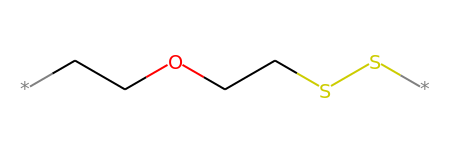

In [3]:
mol = Chem.MolFromSmiles('*CCOCCSS*')
mol

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


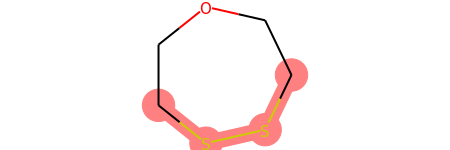

In [4]:
importlib.reload(retro)
retro.ro_depolymerize(mol,'cyclic_sulfide')[0]

# Test drawing features of rdkit

In [ ]:
mol1 = Chem.MolFromSmiles('CC')
mol2 = Chem.MolFromSmiles('C1OC1')

In [ ]:
mol2

In [ ]:
b=Chem.Draw.MolToImage(mol1)
c=Chem.Draw.MolToImage(mol2)

In [ ]:
a=Chem.Draw.MolsToGridImage([mol1,mol2],molsPerRow=2,subImgSize=(400, 400))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize=(8,8))
ax0=fig.add_axes([0,0,.5,1])
ax1=fig.add_axes([.5,0,.5,1])
all_ax = [ax0,ax1]
ax0.imshow(b)
ax1.imshow(c)
ax1.set_xlabel('label1\nlabel2')
#clean each axis
for ax in all_ax:
    for s in ax.spines.keys():
        ax.spines[s].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])    
fig.show()

# Test my implementation of ru.MolsToGridImage

In [ ]:
importlib.reload(ru)
ru.MolsToGridImage([mol1,mol2])

In [ ]:
importlib.reload(ru)
mol3 = Chem.MolFromSmiles('COC')
mol4 = Chem.MolFromSmiles('CCCO')
mol5 = Chem.MolFromSmiles('CNC')
labels = ['m1\nm1','m2\nm2','m3\nm3','m4\nm4','m5\nm5']
ru.MolsToGridImage([mol1,mol2,mol3,mol4,mol5],labels=labels)

In [ ]:
importlib.reload(ru)
mol3 = Chem.MolFromSmiles('COC')
mol4 = Chem.MolFromSmiles('CCCO')
mol5 = Chem.MolFromSmiles('CNC')
labels = ['m1\nm1\nm1','m2\nm2\nm2','m3\nm3\nm3','m4\nm4\nm4','m5\nm5\nm5']
ru.MolsToGridImage([mol1,mol2,mol3,mol4,mol5],labels=labels,ImgSize=(6,9))

In [ ]:
import numpy as np

In [ ]:
int(np.ceil(4.5))

In [ ]:
np.linspace(0,1,3)[:-1]

In [ ]:
np.linspace(0,1,4)[:-1]

In [ ]:
plt.subplots(nrows=2, ncols=3)[1].shape

In [ ]:
np.product([3,2,1])

In [ ]:
str(ReactionStepList[0].rxn_fn) is str(retro.sg_depolymerize)

In [ ]:
str(ReactionStepList[0].rxn_fn).split(' ')[1]

In [ ]:
str(retro.sg_depolymerize)

In [ ]:
str(retro.sg_depolymerize)

In [ ]:
retro.sg_depolymerize

In [ ]:
ReactionStepList[0].rxn_fn

# Make bind_frag

In [ ]:
p1 = Chem.MolFromSmiles('*CC*')
p2 = Chem.MolFromSmiles('*C(*)OC*')

In [ ]:
ru.mol_with_atom_index(p1.mol)

In [ ]:
ru.mol_with_atom_index(p2.mol)

In [ ]:
p1_tail = 3
p1_connector = 2
p2_head = 0
p2_connector = 1

In [ ]:
combo_mol = Chem.rdmolops.CombineMols(p1.mol,p2.mol)
combo_mol

In [ ]:
em = Chem.EditableMol(combo_mol)
em.AddBond(p1_connector, p2_connector + p1.mol.GetNumAtoms(),Chem.BondType.SINGLE)
em.RemoveAtom(p1_tail)
em.RemoveAtom(p2_head + p1.mol.GetNumAtoms() - 1)
new_mol = em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [ ]:
a = p1.mol.GetAtoms()[0]
a.GetIdx()

In [ ]:
def bind_frags(p1,p1_tail,p2,p2_head,p1_connector=None,p2_connector=None):
    '''
    Bind p1 and p2 together at connection points p1_tail and p2_head
    '''
    if p1_connector is None:
        out = p1.mol.GetAtoms()[p1_tail].GetNeighbors()
        if len(out) == 1:
            p1_connector = out[0].GetIdx()
        else:
            raise(ValueError, 'Too many or too few atoms bound to p1_tail')
    if p2_connector is None:
        out = p2.mol.GetAtoms()[p2_head].GetNeighbors()
        if len(out) == 1:
            p2_connector = out[0].GetIdx()
        else:
            raise(ValueError, 'Too many or too few atoms bound to p2_head')    
    
    combo_mol = Chem.rdmolops.CombineMols(p1.mol,p2.mol)
    em = Chem.EditableMol(combo_mol)
    em.AddBond(p1_connector, p2_connector + p1.mol.GetNumAtoms(),Chem.BondType.SINGLE)
    em.RemoveAtom(p1_tail)
    em.RemoveAtom(p2_head + p1.mol.GetNumAtoms() - 1)
    new_mol = em.GetMol()
    try:
        Chem.SanitizeMol(new_mol)
        return new_mol
    except:
        return None

In [ ]:
importlib.reload(ru)
ru.bind_frags(p1,p1_tail,p2,p2_head)

In [ ]:
ru.bind_frags(p1,p1_tail,p2,p2_head,p1_connector,p2_connector)

# Test multiply smiles

In [ ]:
importlib.reload(ru)
p2 = ru.LinearPol(Chem.MolFromSmiles('*CCO*'))

In [ ]:
p2.mol

In [ ]:
m=p2.multiplySmiles(2)

In [ ]:
m.mol

# Make six-membered spiro rings

In [ ]:
mol = Chem.MolFromSmiles('*c4ccc(OCCOc3ccc(C2OCC1(COC(*)OC1)CO2)cc3)cc4')
mol


In [ ]:
polymer_linkage = Chem.MolFromSmiles('*1OCC2(CO1)CO*OC2')
polymer_linkage

In [ ]:
Chem.MolToSmarts(polymer_linkage)

In [ ]:
linkage = '*1-[#8]-[#6]-[#6]2(-[#6]-[#8]-1)-[#6]-[#8]-*-[#8]-[#6]-2'

In [ ]:
polymer_linkage = Chem.MolFromSmarts(linkage)
polymer_linkage

In [ ]:
mol.HasSubstructMatch(polymer_linkage)

In [ ]:
g1 = Chem.MolFromSmarts('[OH]')
g2 = Chem.MolFromSmarts('*=O')

In [ ]:
lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
if pm is None: #periodization failed
    print('None1')
try: #sometimes g1 and g2 are given as lists. If so they will fail below.
    if pm.HasSubstructMatch(g1) or pm.HasSubstructMatch(g2): #chain should not have same functional groups we want to react
        if edit_function != nh_nco_edit: #but there are exceptions
            print('None2')
    g1 = [g1] #do this so symmetry check will have an iterable
    g2 = [g2] #do this so symmetry check will have an iterable
except:
    if any([pm.HasSubstructMatch(x) for x in g1] + [pm.HasSubstructMatch(x) for x in g2]): #chain should not have same functional groups we want to react
        if edit_function != nh_nco_edit: #but there are exceptions
            print('None3')        
matches=pm.GetSubstructMatches(polymer_linkage)

In [ ]:
list(matches)

In [ ]:
match_pairs = list(matches)

In [ ]:
match_pair = match_pairs[0]
match_pair

In [ ]:
ru.mol_with_atom_index(pm)

In [ ]:
linkage

In [ ]:
a_ilw, a_ilto, _, _, _, a_ilbo, _, a_irbo, a_irw, a_irto, _ = match_pair

In [ ]:
em = Chem.EditableMol(pm)
em.RemoveBond(a_ilw,a_ilto)
em.RemoveBond(a_ilw,a_ilbo)
em.RemoveBond(a_irw,a_irto)
em.RemoveBond(a_irw,a_irbo)
o1 = em.AddAtom(Chem.AtomFromSmiles('O'))
o2 = em.AddAtom(Chem.AtomFromSmiles('O'))
em.AddBond(a_ilw,o1,Chem.BondType.DOUBLE)
em.AddBond(a_irw,o2,Chem.BondType.DOUBLE)
new_mol = em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [ ]:
retro.is_symmetric2(new_mol,g1)

# Test Make six-membered spiro rings

In [ ]:
importlib.reload(retro)
retro.sg_depolymerize(mol,polymer_linkage,retro.sg_rxns[linkage][0])[0]

# Test ox_depolymerize

In [ ]:
mol = Chem.MolFromSmiles('*c1sc(*)c2OCCOc12')

In [ ]:
ru.mol_with_atom_index(mol)

In [ ]:
lp = ru.LinearPol(mol)

In [ ]:
pi_bonds = set([b.GetIdx() for b in mol.GetBonds() if b.GetBondTypeAsDouble() > 1])
pi_bonds

In [ ]:
c1_bonds = [b.GetIdx() for b in lp.mol.GetAtoms()[max(lp.connector_inds)].GetBonds()] #bonds of connector 1
c2_bonds = [b.GetIdx() for b in lp.mol.GetAtoms()[min(lp.connector_inds)].GetBonds()] #bonds of connector 2
c1_bonds, c2_bonds

In [ ]:
if not any([b in pi_bonds for b in c1_bonds]) or not any([b in pi_bonds for b in c2_bonds]): #if connectors don't have pi bonds return None
    print(None)

In [ ]:
ri = mol.GetRingInfo()

In [ ]:
ri.BondRings()

In [ ]:
c1_ring = [ring for ring in ri.BondRings() if len(set(ring).intersection(c1_bonds)) > 0][0]
c1_ring

In [ ]:
c2_ring = [ring for ring in ri.BondRings() if len(set(ring).intersection(c2_bonds)) > 0][0]
c2_ring

In [ ]:
if len(c1_ring) == 0 or len(c2_ring) == 0: #if connectors are not in rings then return None
    print(None)

In [ ]:
if set(c1_ring).union(c2_ring) != pi_bonds: #if any pi-bonds exist outside of connector rings return None
    print(None)

In [ ]:
new_mol = lp.delStarMol() #make would-be monomer
new_mol

In [ ]:
if retro.is_symmetric2(new_mol,group=lp.delStarMolInds):
    print([new_mol])

In [ ]:
importlib.reload(retro)

# Try rxn SMARTS

In [ ]:
rxn = Chem.AllChem.ReactionFromSmarts('*[C:1][NH2:2].[OH:3][C:4](=[O:5])*>>[C:1][N:2][C:4](=[O:5])')
rxn

In [ ]:
reverse_rxn = Chem.AllChem.ReactionFromSmarts('[CR:1][NRH:2][CR:4](=[O:5])>>[C:1][N:2]*[O:3][C:4](=[O:5])',)
reverse_rxn

In [ ]:
mol = Chem.MolFromSmiles('[*]CCCCNC(=O)CCCCC(=O)N[*]')
mol

In [ ]:
pm = ru.LinearPol(mol).PeriodicMol()
Chem.GetSSSR(pm)
pm

In [ ]:
retro.sg_depolymerize(mol,Chem.MolFromSmarts('*[NH][#6](=O)*'),retro.sg_rxns['*[NH][#6](=O)*'][0])[0]

In [ ]:
reactants = reverse_rxn.RunReactants((pm,))
reactants

In [ ]:
reactants[0][0]

In [ ]:
reactants[1][0]

In [ ]:
s1 = reactants[0][0]
s1

In [ ]:
em = Chem.EditableMol(s1)
for ind,i in enumerate(s1.GetAtoms()):
    if i.GetSymbol() == '*':
        em.RemoveAtom(ind)
m = em.GetMol()
Chem.SanitizeMol(m)

In [ ]:
m

In [ ]:
reverse_rxn_no_ring = Chem.AllChem.ReactionFromSmarts('[C:1][NH:2][C:4](=[O:5])>>[C:1][N:2].[O:3][C:4](=[O:5])',)
reactants = reverse_rxn_no_ring.RunReactants((m,))
reactants

In [ ]:
s2=reactants[0][0]
s2

In [ ]:
reactants[0][1]

In [ ]:
retro.sg_depolymerize(mol,Chem.MolFromSmarts('*[NH][#6](=O)*'),retro.sg_rxns['*[NH][#6](=O)*'][0])[0]

In [ ]:
reactants = reverse_rxn.RunReactants((reactants[0][1],))
reactants

In [ ]:
reactants[0][0]

In [ ]:
reactants[0][1]

In [ ]:
pm = ru.LinearPol(mol).PeriodicMol()
pm

In [ ]:
reactants = reverse_rxn.RunReactants((pm,))
reactants

In [ ]:
reactants[0][0]

In [ ]:
mol

In [ ]:
reactants[0][1]

In [ ]:
reactants[1][0]

In [ ]:
reactants[1][1]

In [ ]:
ring_open_rxn = Chem.AllChem.ReactionFromSmarts('[O;R:1][C;R:2][C;R:3]>>[O:1][C:2]*[C:3]')

In [ ]:
r2 = Chem.AllChem.ReactionFromSmarts('[O:1]1[C:2][C:3][O:4][C:5][C:6]1>>[C:3][O:4][C:5][C:6][O:1][C:2]')

In [ ]:
r1 = Chem.MolFromSmiles('C1COCCO1')
r1

In [ ]:
prods = ring_open_rxn.RunReactants((r1,))
prods

In [ ]:
prods[0][0]

In [ ]:
prods = r2.RunReactants((r1,))
prods

In [ ]:
prods[0][0]

# Test Beta Mol

In [ ]:
mol = Chem.MolFromSmiles('*CCN(*)C(=O)CC')
mol

In [ ]:
importlib.reload(ru)
lp = ru.LinearPol(mol)
bm = lp.BetaMol()

In [ ]:
bm.mol

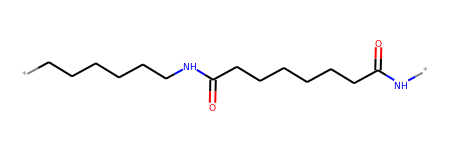

In [2]:
mol=Chem.MolFromSmiles('[*]CCCCCCNC(=O)CCCCCCC(=O)N[*]')
mol

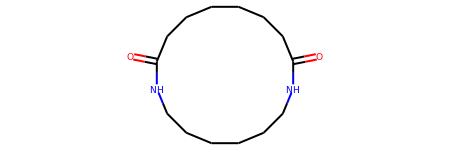

In [3]:
ru.LinearPol(mol).PeriodicMol()